#Anchor Box Calculation



In [ ]:
import matplotlib.pyplot as plt

class main:
  def __init__(self,no):
    self.num_clusters = no

   
args = main(9)

'''
Created on Feb 20, 2017
@author: jumabek
'''
from os import listdir
from os.path import isfile, join
import argparse
#import cv2
import numpy as np
import sys
import os
import shutil
import random 
import math

width_in_cfg_file = 1248.
height_in_cfg_file = 1248.

def IOU(X,centroids):
    similarities = []
    k = len(centroids)
    for centroid in centroids:
        c_x,c_y,c_z = centroid
        x,y,z = X
        inner_vol = min(x,c_x)*min(y,c_y)*min(z,c_z)
        similarity = inner_vol/((x*y*z+c_x*c_y*c_z)-inner_vol)
        similarities.append(similarity) # will become (k,) shape
    return np.array(similarities) 

def avg_IOU(X,centroids):
    n,d = X.shape
    sum = 0.
    for i in range(X.shape[0]):
        #note IOU() will return array which contains IoU for each centroid and X[i] // slightly ineffective, but I am too lazy
        sum+= max(IOU(X[i],centroids)) 
    return sum/n

def write_anchors_to_file(centroids,X,anchor_file):
    f = open(anchor_file,'w')
    
    anchors = centroids.copy()
    print(anchors.shape)

    for i in range(anchors.shape[0]):
        anchors[i][0]*=width_in_cfg_file
        anchors[i][1]*=height_in_cfg_file
        anchors[i][2]*= 5
         

    widths = anchors[:,0]+ anchors[:,1]
    sorted_indices = np.argsort(widths)

    print('Anchors = ', anchors[sorted_indices])
        
    for i in sorted_indices[:-1]:
        f.write('%0.5f,%0.5f,%0.5f, '%(anchors[i,0],anchors[i,1],anchors[i,2]))

    #there should not be comma after last anchor, that's why
    f.write('%0.5f,%0.5f,%0.5f\n'%(anchors[sorted_indices[-1:],0],anchors[sorted_indices[-1:],1],anchors[sorted_indices[-1:],2]))
    
    f.write('%f\n'%(avg_IOU(X,centroids)))
    plt.scatter(centroids.shape[0], avg_IOU(X,centroids))

def kmeans(X,centroids,eps,anchor_file):
    
    N = X.shape[0]
    iterations = 0
    k,dim = centroids.shape
    print("k,dim =",k,dim)
    prev_assignments = np.ones(N)*(-1)    
    iter = 0
    old_D = np.zeros((N,k))

    while True:
        D = [] 
        iter+=1           
        for i in range(N):
            d = 1 - IOU(X[i],centroids)
            D.append(d)
        D = np.array(D) # D.shape = (N,k)
        
        print("iter {}: dists = {}".format(iter,np.sum(np.abs(old_D-D))))
            
        #assign samples to centroids 
        assignments = np.argmin(D,axis=1)
        
        if (assignments == prev_assignments).all() :
            print("Centroids = ",centroids)
            write_anchors_to_file(centroids,X,anchor_file)
            return

        #calculate new centroids
        centroid_sums=np.zeros((k,dim),np.float)
        for i in range(N):
            centroid_sums[assignments[i]]+=X[i]        
        for j in range(k):            
            centroids[j] = centroid_sums[j]/(np.sum(assignments==j))
        
        prev_assignments = assignments.copy()     
        old_D = D.copy()  

    

annotation_dims = []

size = np.zeros((1,1,3))
file_path = '/gdrive/My Drive/data/'
for scene  in nusc.scene :
  sample_token = scene['first_sample_token']
  sample = nusc.get('sample',sample_token)
  sensor = 'LIDAR_TOP'
  lidar_top_data = nusc.get('sample_data', sample['data'][sensor])
  ego_pose = nusc.get('ego_pose', lidar_top_data['ego_pose_token'])
  for annotation in sample['anns']:
    annotation = nusc.get('sample_annotation',annotation)
    x,y,z = annotation['size']
    x = float(x) / 140.
    y = float(y) / 140.
    z = float(z) / 5.
    annotation_dims.append(tuple(map(float,(x,y,z))))
#print(annotation_dims)  
annotation_dims = np.array(annotation_dims)

eps = 0.005

if args.num_clusters == 0:
    for num_clusters in range(1,11): #we make 1 through 10 clusters 
        anchor_file = 'anchors%d.txt'%(num_clusters)

        indices = [ random.randrange(annotation_dims.shape[0]) for i in range(num_clusters)]
        centroids = annotation_dims[indices]
        kmeans(annotation_dims,centroids,eps,anchor_file)
        print('centroids.shape', centroids.shape)
else:
    anchor_file = 'anchors%d.txt'%(args.num_clusters)
    indices = [ random.randrange(annotation_dims.shape[0]) for i in range(args.num_clusters)]
    centroids = annotation_dims[indices]
    kmeans(annotation_dims,centroids,eps,anchor_file)
    print('centroids.shape', centroids.shape)



NameError: ignored

In [ ]:
from collections import Counter 

annotation_dims = []
cat = []
size = np.zeros((1,1,3))
file_path = '/gdrive/My Drive/data/'
for scene  in nusc.scene :
  sample_token = scene['first_sample_token']
  sample = nusc.get('sample',sample_token)
  sensor = 'LIDAR_TOP'
  lidar_top_data = nusc.get('sample_data', sample['data'][sensor])
  ego_pose = nusc.get('ego_pose', lidar_top_data['ego_pose_token'])
  for annotation in sample['anns']:
    annotation = nusc.get('sample_annotation',annotation)
    print(annotation['size'],annotation['category_name'])
    x,y,z = annotation['size']
    cat.append(annotation['category_name'])
    #x = float(x) / 140.
    #y = float(y) / 140.
    #z = float(z) / 5.
    annotation_dims.append(tuple(map(float,(x,y,z))))
print(annotation_dims)
d = Counter(cat)   
print(d)
print(annotation_dims[1])
print(max(x[0] for x in annotation_dims))
print(max(x[1] for x in annotation_dims))
print(max(x[2] for x in annotation_dims))
#print(sum(annotation_dims[:,1]))
#print(sum(annotation_dims[:,2]))

NameError: ignored

In [ ]:
!pip3 install terminaltables
!pip install nuscenes-devkit
!pip install turfpy
!pip install wandb

You should consider upgrading via the '/home/ubuntu/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ubuntu/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ubuntu/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ubuntu/anaconda3/bin/python -m pip install --upgrade pip' command.


#Start off

In [1]:
%matplotlib inline
from nuscenes.nuscenes import NuScenes 

nusc = NuScenes(version='v1.0-trainval', dataroot='data', verbose=True)

Loading NuScenes tables for version v1.0-trainval...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 36.688 seconds.
Reverse indexing ...
Done reverse indexing in 9.3 seconds.


In [2]:
#import wandb
#wandb.init()

In [3]:

from __future__ import division

from terminaltables import AsciiTable

import os
import sys
import time
import datetime
import argparse

import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torch.autograd import Variable
import torch.optim as optim

#Utils

In [4]:
#Angle Decoder

def angle_decoder(r):
  teta1 = torch.asin(2*r[0] - 1)
  teta2 = torch.acos(2*r[1] - 1)
  teta = 0
  if 2*r[0] - 1 >= 0 and 2*r[1] - 1 >= 0:
    teta = (teta1+teta2)/2
  elif 2*r[0] - 1 >= 0 and 2*r[1] - 1 < 0:
    teta = (math.pi-teta1+teta2)/2
  elif 2*r[0] - 1 < 0 and 2*r[1] - 1 <= 0:
    teta = (math.pi - teta1+2*math.pi -teta2)/2
  elif 2*r[0] - 1 < 0 and 2*r[1] - 1 > 0:
    teta = (2*math.pi + teta1+2*math.pi - teta2)/2
  return teta

In [5]:
#Utils

from __future__ import division
import math
import time
import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from shapely.geometry import Polygon


def to_cpu(tensor):
    return tensor.detach().cpu()

def rotate_around_point(point, radians, origin=(0, 0)):
  """Rotate a point around a given point.
  
  I call this the "low performance" version since it's recalculating
  the same values more than once [cos(radians), sin(radians), x-ox, y-oy).
  It's more readable than the next function, though.
  """
  x, y = point
  ox, oy = origin

  qx = ox + math.cos(radians) * (x - ox) + math.sin(radians) * (y - oy)
  qy = oy + -math.sin(radians) * (x - ox) + math.cos(radians) * (y - oy)

  return qx.item(), qy.item()

def load_classes(path):
    """
    Loads class labels at 'path'
    """
    fp = open(path, "r")
    names = fp.read().split("\n")[:-1]
    return names


def weights_init_normal(m):
    classname = m.__class__.__name__
    if classname.find("Conv") != -1:
        torch.nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find("BatchNorm2d") != -1:
        torch.nn.init.normal_(m.weight.data, 1.0, 0.02)
        torch.nn.init.constant_(m.bias.data, 0.0)


def rescale_boxes(boxes, current_dim, original_shape):
    """ Rescales bounding boxes to the original shape """
    orig_h, orig_w = original_shape
    # The amount of padding that was added
    pad_x = max(orig_h - orig_w, 0) * (current_dim / max(original_shape))
    pad_y = max(orig_w - orig_h, 0) * (current_dim / max(original_shape))
    # Image height and width after padding is removed
    unpad_h = current_dim - pad_y
    unpad_w = current_dim - pad_x
    # Rescale bounding boxes to dimension of original image
    boxes[:, 0] = ((boxes[:, 0] - pad_x // 2) / unpad_w) * orig_w
    boxes[:, 1] = ((boxes[:, 1] - pad_y // 2) / unpad_h) * orig_h
    boxes[:, 2] = ((boxes[:, 2] - pad_x // 2) / unpad_w) * orig_w
    boxes[:, 3] = ((boxes[:, 3] - pad_y // 2) / unpad_h) * orig_h
    return boxes


def xywh2xyxy(x):
    y = x.new(x.shape)
    y[..., 0] = x[..., 0] - x[..., 3] / 2
    y[..., 1] = x[..., 1] - x[..., 4] / 2
    y[..., 2] = x[..., 2] - x[..., 5] / 2
    y[..., 3] = x[..., 0] + x[..., 3] / 2
    y[..., 4] = x[..., 1] + x[..., 4] / 2
    y[..., 5] = x[..., 2] + x[..., 5] / 2
    return y


def ap_per_class(tp, conf, pred_cls, target_cls):
    """ Compute the average precision, given the recall and precision curves.
    Source: https://github.com/rafaelpadilla/Object-Detection-Metrics.
    # Arguments
        tp:    True positives (list).
        conf:  Objectness value from 0-1 (list).
        pred_cls: Predicted object classes (list).
        target_cls: True object classes (list).
    # Returns
        The average precision as computed in py-faster-rcnn.
    """

    # Sort by objectness
    i = np.argsort(-conf)
    tp, conf, pred_cls = tp[i], conf[i], pred_cls[i]

    # Find unique classes
    unique_classes = np.unique(target_cls)

    # Create Precision-Recall curve and compute AP for each class
    ap, p, r = [], [], []
    for c in tqdm.tqdm(unique_classes, desc="Computing AP"):
        i = pred_cls == c
        n_gt = (target_cls == c).sum()  # Number of ground truth objects
        n_p = i.sum()  # Number of predicted objects

        if n_p == 0 and n_gt == 0:
            continue
        elif n_p == 0 or n_gt == 0:
            ap.append(0)
            r.append(0)
            p.append(0)
        else:
            # Accumulate FPs and TPs
            fpc = (1 - tp[i]).cumsum()
            tpc = (tp[i]).cumsum()

            # Recall
            recall_curve = tpc / (n_gt + 1e-16)
            r.append(recall_curve[-1])

            # Precision
            precision_curve = tpc / (tpc + fpc)
            p.append(precision_curve[-1])

            # AP from recall-precision curve
            ap.append(compute_ap(recall_curve, precision_curve))

    # Compute F1 score (harmonic mean of precision and recall)
    p, r, ap = np.array(p), np.array(r), np.array(ap)
    f1 = 2 * p * r / (p + r + 1e-16)

    return p, r, ap, f1, unique_classes.astype("int32")


def compute_ap(recall, precision):
    """ Compute the average precision, given the recall and precision curves.
    Code originally from https://github.com/rbgirshick/py-faster-rcnn.

    # Arguments
        recall:    The recall curve (list).
        precision: The precision curve (list).
    # Returns
        The average precision as computed in py-faster-rcnn.
    """
    # correct AP calculation
    # first append sentinel values at the end
    mrec = np.concatenate(([0.0], recall, [1.0]))
    mpre = np.concatenate(([0.0], precision, [0.0]))

    # compute the precision envelope
    for i in range(mpre.size - 1, 0, -1):
        mpre[i - 1] = np.maximum(mpre[i - 1], mpre[i])

    # to calculate area under PR curve, look for points
    # where X axis (recall) changes value
    i = np.where(mrec[1:] != mrec[:-1])[0]

    # and sum (\Delta recall) * prec
    ap = np.sum((mrec[i + 1] - mrec[i]) * mpre[i + 1])
    return ap


def get_batch_statistics(outputs, targets, iou_threshold):
    """ Compute true positives, predicted scores and predicted labels per sample """
    batch_metrics = []
    for sample_i in range(len(outputs)):

        if outputs[sample_i] is None:
            continue

        output = outputs[sample_i]
        pred_boxes = output[:, :8]
        pred_scores = output[:, 8]
        pred_labels = output[:, -1]

        true_positives = np.zeros(pred_boxes.shape[0])

        annotations = targets[targets[:, 0] == sample_i][:, 1:]
        target_labels = annotations[:, 0] if len(annotations) else []
        if len(annotations):
            detected_boxes = []
            target_boxes = annotations[:, 1:]

            for pred_i, (pred_box, pred_label) in enumerate(zip(pred_boxes, pred_labels)):

                # If targets are found break
                if len(detected_boxes) == len(annotations):
                    break

                # Ignore if label is not one of the target labels
                if pred_label not in target_labels:
                    continue

                iou, box_index = bbox_iou(pred_box.unsqueeze(0), target_boxes).max(0)
                if iou >= iou_threshold and box_index not in detected_boxes:
                    true_positives[pred_i] = 1
                    detected_boxes += [box_index]
        batch_metrics.append([true_positives, pred_scores, pred_labels])
    return batch_metrics


def bbox_wh_iou(wh1, wh2):
    wh2 = wh2.t()
    w1, l1, h1 = wh1[0], wh1[1] ,wh1[2]
    w2, l2, h2 = wh2[0], wh2[1] ,wh1[2]
    inter_area = torch.min(w1, w2) * torch.min(l1, l2) * torch.min(h1, h2)
    union_area = (w1 * l1 * h1 + 1e-16) + (w2 * l2 * h2) - inter_area
    return inter_area / union_area



def bbox_iou(box1, box2):
    """
    Returns the IoU of two bounding boxes
    """
    iou_scores = []
    # Transform from center and width to exact coordinates
    b1_x1, b1_x3 = box1[:,0] - box1[:,3] / 2, box1[:,0] + box1[:,3] / 2
    b1_y1, b1_y3 = box1[:,1] - box1[:,4] / 2, box1[:,1] + box1[:,4] / 2
    b1_x2, b1_x4 = b1_x3, b1_x1
    b1_y2, b1_y4 = b1_y1, b1_y3
    #b1_z1, b1_z3 = box1[2] - box1[5] / 2, box1[2] + box1[5] / 2
    b2_x1, b2_x3 = box2[:,0] - box2[:,3] / 2, box2[:,0] + box2[:,3] / 2
    b2_x2, b2_x4 = b2_x3, b2_x1
    b2_y1, b2_y3 = box2[:,1] - box2[:,4] / 2, box2[:,1] + box2[:,4] / 2
    b2_y2, b2_y4 = b2_y1, b2_y3
    #b2_z1, b2_z3 = box2[2] - box2[5] / 2, box2[2] + box2[5] / 2

    rotation1 = [angle_decoder(r[6:8]) for r in box1]
    rotation2 = [angle_decoder(r[6:8]) for r in box2]
    


    if box1.shape == box2.shape:
      for x11,x12,x13,x14,y11,y12,y13,y14,x21,x22,x23,x24,y21,y22,y23,y24,r1,r2, b1,b2 in zip(b1_x1,b1_x2,b1_x3,b1_x4, b1_y1,b1_y2,b1_y3,b1_y4, b2_x1,b2_x2,b2_x3,b2_x4, b2_y1,b2_y2,b2_y3,b2_y4, rotation1,rotation2, box1,box2):
        p1 = Polygon([rotate_around_point((x11, y11), r1, (b1[0], b1[1])),
             rotate_around_point((x12, y12), r1, (b1[0], b1[1])),
             rotate_around_point((x13, y13), r1, (b1[0], b1[1])),
             rotate_around_point((x14, y14), r1, (b1[0], b1[1]))])
        p2 = Polygon([rotate_around_point((x21, y21), r2, (b2[0], b2[1])),
             rotate_around_point((x22, y22), r2, (b2[0], b2[1])),
             rotate_around_point((x23, y23), r2, (b2[0], b2[1])),
             rotate_around_point((x24, y24), r2, (b2[0], b2[1]))])
        p3 = p1.intersection(p2)
        inter_area = p3.area
        b1_area = p1.area
        b2_area = p2.area

        iou = inter_area / (b1_area + b2_area - inter_area + 1e-16)
        iou_scores.append(iou)

        return torch.Tensor(iou_scores).to(device)
    else:
      x11,x12,x13,x14, y11,y12,y13,y14 = b1_x1[0],b1_x2[0],b1_x3[0],b1_x4[0], b1_y1[0],b1_y2[0],b1_y3[0],b1_y4[0]
      r1, b1 = rotation1[0], box1[0]
      for x21,x22,x23,x24,y21,y22,y23,y24,r2 ,b2 in zip(b2_x1,b2_x2,b2_x3,b2_x4, b2_y1,b2_y2,b2_y3,b2_y4, rotation2, box2):
        p1 = Polygon([rotate_around_point((x11, y11), r1, (b1[0], b1[1])),
             rotate_around_point((x12, y12), r1, (b1[0], b1[1])),
             rotate_around_point((x13, y13), r1, (b1[0], b1[1])),
             rotate_around_point((x14, y14), r1, (b1[0], b1[1]))])
        p2 = Polygon([rotate_around_point((x21, y21), r2, (b2[0], b2[1])),
             rotate_around_point((x22, y22), r2, (b2[0], b2[1])),
             rotate_around_point((x23, y23), r2, (b2[0], b2[1])),
             rotate_around_point((x24, y24), r2, (b2[0], b2[1]))])
        p3 = p1.intersection(p2)
        inter_area = p3.area
        b1_area = p1.area
        b2_area = p2.area

        iou = inter_area / (b1_area + b2_area - inter_area + 1e-16)
        iou_scores.append(iou)

        return torch.Tensor(iou_scores).to(device)

def non_max_suppression(prediction, conf_thres=0.5, nms_thres=0.5):
    """
    Removes detections with lower object confidence score than 'conf_thres' and performs
    Non-Maximum Suppression to further filter detections.
    Returns detections with shape:
        (x1, y1, x2, y2, object_conf, class_score, class_pred)
    """

    # From (center x, center y, width, height) to (x1, y1, x2, y2)
    #prediction[..., :6] = xywh2xyxy(prediction[..., :6])
    output = [None for _ in range(len(prediction))]
    for image_i, image_pred in enumerate(prediction):
        # Filter out confidence scores below threshold
        image_pred = image_pred[image_pred[:, 8] >= conf_thres]
        # If none are remaining => process next image
        if not image_pred.size(0):
            continue
        # Object confidence times class confidence
        score = image_pred[:, 8] * image_pred[:, 9:].max(1)[0]
        # Sort by it
        image_pred = image_pred[(-score).argsort()]
        class_confs, class_preds = image_pred[:, 9:].max(1, keepdim=True)
        detections = torch.cat((image_pred[:, :9], class_confs.float(), class_preds.float()), 1)
        # Perform non-maximum suppression
        keep_boxes = []
        while detections.size(0):
            large_overlap = bbox_iou(detections[0, :8].unsqueeze(0), detections[:, :8]) > nms_thres
            label_match = detections[0, -1] == detections[:, -1]
            label_match = label_match.cuda()
            # Indices of boxes with lower confidence scores, large IOUs and matching labels
            invalid = large_overlap & label_match
            weights = detections[invalid, 8:9]
            # Merge overlapping bboxes by order of confidence
            detections[0, :8] = (weights * detections[invalid, :8]).sum(0) / weights.sum()
            keep_boxes += [detections[0]]
            detections = detections[~invalid]
        if keep_boxes:
            output[image_i] = torch.stack(keep_boxes)

    return output


def build_targets(pred_boxes, pred_cls, target, anchors, ignore_thres):
    ByteTensor = torch.cuda.ByteTensor if pred_boxes.is_cuda else torch.ByteTensor
    FloatTensor = torch.cuda.FloatTensor if pred_boxes.is_cuda else torch.FloatTensor

    nB = pred_boxes.size(0)
    nA = pred_boxes.size(1)
    nC = pred_cls.size(-1)
    nG = pred_boxes.size(2)
    
    obj_mask = ByteTensor(nB, nA, nG, nG).fill_(0)
    noobj_mask = ByteTensor(nB, nA, nG, nG).fill_(1)
    class_mask = FloatTensor(nB, nA, nG, nG).fill_(0)
    iou_scores = FloatTensor(nB, nA, nG, nG).fill_(0)
    tx = FloatTensor(nB, nA, nG, nG).fill_(0)
    ty = FloatTensor(nB, nA, nG, nG).fill_(0)
    tz = FloatTensor(nB, nA, nG, nG).fill_(0)
    tw = FloatTensor(nB, nA, nG, nG).fill_(0)
    tl = FloatTensor(nB, nA, nG, nG).fill_(0)
    th = FloatTensor(nB, nA, nG, nG).fill_(0)
    tr1 = FloatTensor(nB, nA, nG, nG).fill_(0)
    tr2 = FloatTensor(nB, nA, nG, nG).fill_(0)
    tcls = FloatTensor(nB, nA, nG, nG, nC).fill_(0)
    
    target_boxes = target[:, 2:10]
    target_boxes[:, :2] = target_boxes[:, :2] * nG
    target_boxes[:, 3:5] = target_boxes[:, 3:5] * nG
    target_boxes[:, 5] = target_boxes[:, 5] * 5

    gxy = target_boxes[:, :2]
    gwlh = target_boxes[:, 3:6]

    ious = torch.stack([bbox_wh_iou(anchor, gwlh) for anchor in anchors]) #here
    try:
      best_ious, best_n = ious.max(0)
      #print("ious shape :",ious.shape)
      #print("ious :", ious)
      #print("Best_ious shape :", best_ious.shape)
      #print("Best_ious :", best_ious)
      #print("Best_n shape :", best_n.shape)
      #print("Best_n :", best_n)


    except:
      best_ious, best_n = torch.LongTensor(0), torch.LongTensor(0)
      #tconf = obj_mask.float()
      #return iou_scores, class_mask, obj_mask, noobj_mask, tx, ty, tz, tw, tl, th, tr1, tr2, tcls, tconf
      pass

    b, target_labels = target[:, :2].long().t()
    
    gx, gy = gxy.t()
    gw, gl, gh = gwlh.t()
    gi, gj = gxy.long().t()
    
    # Set masks
    obj_mask[b, best_n, gj, gi] = 1
    noobj_mask[b, best_n, gj, gi] = 0

    # Set noobj mask to zero where iou exceeds ignore threshold
    for i, anchor_ious in enumerate(ious.t()):
        noobj_mask[b[i], anchor_ious > ignore_thres, gj[i], gi[i]] = 0

    # Coordinates
    tx[b, best_n, gj, gi] = gx - gx.floor()
    ty[b, best_n, gj, gi] = gy - gy.floor()
    tz[b, best_n, gj, gi] = target_boxes[:,2]
    # Width and height
    tw[b, best_n, gj, gi] = torch.log(gw / anchors[best_n][:, 0] + 1e-16)
    tl[b, best_n, gj, gi] = torch.log(gl / anchors[best_n][:, 1] + 1e-16)
    th[b, best_n, gj, gi] = torch.log(gh / anchors[best_n][:, 2] + 1e-16)
    
    tr1[b, best_n, gj, gi] = target_boxes[:,6]
    tr2[b, best_n, gj, gi] = target_boxes[:,7]
    # One-hot encoding of label
    tcls[b, best_n, gj, gi, target_labels] = 1
    # Compute label correctness and iou at best anchor
    class_mask[b, best_n, gj, gi] = (pred_cls[b, best_n, gj, gi].argmax(-1) == target_labels).float()
    iou_scores[b, best_n, gj, gi] = bbox_iou(pred_boxes[b, best_n, gj, gi], target_boxes)
    tconf = obj_mask.float()
    target_boxes[:, :2] = target_boxes[:, :2] / nG
    target_boxes[:, 3:5] = target_boxes[:, 3:5] / nG
    target_boxes[:, 5] = target_boxes[:, 5] / 5
    return iou_scores, class_mask, obj_mask, noobj_mask, tx, ty, tz, tw, tl, th, tr1, tr2, tcls, tconf


In [6]:
#Parse_config

def parse_model_config(path):
    """Parses the yolo-v3 layer configuration file and returns module definitions"""
    file = open(path, 'r')
    lines = file.read().split('\n')
    lines = [x for x in lines if x and not x.startswith('#')]
    lines = [x.rstrip().lstrip() for x in lines] # get rid of fringe whitespaces
    module_defs = []
    for line in lines:
        if line.startswith('['): # This marks the start of a new block
            module_defs.append({})
            module_defs[-1]['type'] = line[1:-1].rstrip()
            if module_defs[-1]['type'] == 'convolutional':
                module_defs[-1]['batch_normalize'] = 0
        else:
            key, value = line.split("=")
            value = value.strip()
            module_defs[-1][key.rstrip()] = value.strip()

    return module_defs

def parse_data_config(path):
    """Parses the data configuration file"""
    options = dict()
    options['gpus'] = '0,1,2,3'
    options['num_workers'] = '10'
    with open(path, 'r') as fp:
        lines = fp.readlines()
    for line in lines:
        line = line.strip()
        if line == '' or line.startswith('#'):
            continue
        key, value = line.split('=')
        options[key.strip()] = value.strip()
    return options


In [7]:
#Draw
def draw(targets):
  fig = plt.figure(figsize=(8,8))
  ax = fig.add_subplot(111)
  for target in targets:
    rotation = angle_decoder(target[6:8])
    length = target[3]
    width = target[4]
    x_temp, y_temp = rotate_around_point((target[0],-target[1]), -(rotation), origin=(target[0]-width/2, -target[1] - length/2))
    x_offset, y_offset = x_temp - target[0], y_temp + target[1]
    rectas = patches.Rectangle(xy=((target[0]-width/2) - x_offset, (-target[1] - length/2) - y_offset) ,width=width, height=length, angle = (rotation)*180/math.pi, linewidth=1, color='blue', fill=False)
    ax.add_patch(rectas)
    ax.scatter(target[0], -target[1], color = 'red', s=10)
  ax.scatter(0.5, -0.5)
  plt.xlim(0, 1)
  plt.ylim(-1,0)
  plt.show()

In [8]:
#Sampler
import torch

class ResumableRandomSampler(torch.utils.data.Sampler):
    r"""Samples elements randomly. If without replacement, then sample from a shuffled dataset.
    If with replacement, then user can specify :attr:`num_samples` to draw.
    Arguments:
        data_source (Dataset): dataset to sample from
        replacement (bool): samples are drawn on-demand with replacement if ``True``, default=``False``
        num_samples (int): number of samples to draw, default=`len(dataset)`. This argument
            is supposed to be specified only when `replacement` is ``True``.
        generator (Generator): Generator used in sampling.
    """
    #data_source: Sized
    #replacement: bool

    def __init__(self, data_source):
        self.data_source = data_source
        self.generator = torch.Generator()
        self.generator.manual_seed(47)
        
        self.perm_index = 0
        self.perm = torch.randperm(self.num_samples, generator=self.generator)
        
    @property
    def num_samples(self) -> int:
        return len(self.data_source)

    def __iter__(self):
        if self.perm_index >= len(self.perm):
            self.perm_index = 0
            self.perm = torch.randperm(self.num_samples, generator=self.generator)
            
        while self.perm_index < len(self.perm):
            self.perm_index += 1
            yield self.perm[self.perm_index-1]

    def __len__(self):
        return self.num_samples
    
    def get_state(self):
        return {"perm": self.perm, "perm_index": self.perm_index, "generator_state": self.generator.get_state()}
    
    def set_state(self, state):
        self.perm = state["perm"]
        self.perm_index = state["perm_index"]
        self.generator.set_state(state["generator_state"])

In [9]:
#Dataset

import glob
import random
import os
import sys
import numpy as np
from PIL import Image
import torch
import torch.nn.functional as F
from pyquaternion import Quaternion
import math
import json


from torch.utils.data import Dataset
import torchvision.transforms as transforms


def pad_to_square(img, pad_value):
    c, h, w = img.shape
    dim_diff = np.abs(h - w)
    # (upper / left) padding and (lower / right) padding
    pad1, pad2 = dim_diff // 2, dim_diff - dim_diff // 2
    # Determine padding
    pad = (0, 0, pad1, pad2) if h <= w else (pad1, pad2, 0, 0)
    # Add padding
    img = F.pad(img, pad, "constant", value=pad_value)

    return img, pad


def resize(image, size):
    image = F.interpolate(image.unsqueeze(0), size=size, mode="nearest").squeeze(0)
    return image


def random_resize(images, min_size=288, max_size=448):
    new_size = random.sample(list(range(min_size, max_size + 1, 32)), 1)[0]
    images = F.interpolate(images, size=new_size, mode="nearest")
    return images


class ImageFolder(Dataset):
    def __init__(self, folder_path, img_size=1248):
        self.files = sorted(glob.glob("%s/*.*" % folder_path))
        self.img_size = img_size

    def __getitem__(self, index):
        img_path = self.files[index % len(self.files)]
        # Extract image as PyTorch tensor
        img = transforms.ToTensor()(Image.open(img_path))
        # Pad to square resolution
        img, _ = pad_to_square(img, 0)
        # Resize
        img = resize(img, self.img_size)

        return img_path, img

    def __len__(self):
        return len(self.files)


class ListDataset(Dataset):
    def __init__(self, sample_mapping, img_size=1248, augment=True, multiscale=False, normalized_labels=False, max_height=5, max_length=70, max_width=70):
       
        self.img_size = img_size
        self.max_objects = 100
        self.augment = augment
        self.multiscale = multiscale
        self.normalized_labels = normalized_labels
        self.min_size = self.img_size - 3 * 32
        self.max_size = self.img_size + 3 * 32
        self.batch_count = 0
        self.sample_mapping = sample_mapping
        self.file_path = 'data/'
        

        #get categories
        self.categories = []
        with open('data/v1.0-trainval/category.json') as f:
          data = json.load(f)
        for d in data:
          self.categories.append(d['name'])
        self.num_category = len(self.categories)
        
        #important items for tweking
        self.max_height = max_height
        self.max_width = max_width
        self.max_length = max_length

    def quaternion_yaw(self, q: Quaternion) -> float:
      """
      Calculate the yaw angle from a quaternion.
      See https://en.wikipedia.org/wiki/Conversion_between_quaternions_and_Euler_angles.
      :param q: Quaternion of interest.
      :return: Yaw angle in radians.
      """

      a = 2.0 * (q[0] * q[3] + q[1] * q[2])
      b = 1.0 - 2.0 * (q[2] ** 2 + q[3] ** 2)

      return np.arctan2(a, b)

    def rotate_around_point_lowperf(self, point, radians, origin=(0, 0)):
      """Rotate a point around a given point.
      
      I call this the "low performance" version since it's recalculating
      the same values more than once [cos(radians), sin(radians), x-ox, y-oy).
      It's more readable than the next function, though.
      """
      x, y = point
      ox, oy = origin

      qx = ox + math.cos(radians) * (x - ox) + math.sin(radians) * (y - oy)
      qy = oy + -math.sin(radians) * (x - ox) + math.cos(radians) * (y - oy)

      return qx, qy

    def convert_to_top_corner(self, point):
      """Convert the position with respect to the top left corner"""
      point[0] = self.max_length + point[0]
      point[1] = self.max_width - point[1]
      return point

    def check_cameraregion(self,coordinates,cameras,sample,verbose = False):
      """To check if the coordinate of the object lies in blacked out camera region
       and if so return flag as 0"""
      if verbose:
        print("Start of Checking for the point :",coordinates)
      angle = 0
      flag = False
      for camera in cameras:
        flag = False
        sample_data = nusc.get('sample_data',sample['data'][camera])
        sensor = nusc.get('calibrated_sensor',sample_data['calibrated_sensor_token'])
        if camera == 'CAM_BACK':
          angle = 55/180 * math.pi
        else :
          angle = 35/180 * math.pi
        if verbose:
          print("Sensor before rotation:", sensor['translation'][0:2])
        x, y = self.rotate_around_point_lowperf(sensor['translation'][0:2], -math.pi/2)
        if verbose:
          print("Sensor after rotation:", x,y)
        rotation = self.quaternion_yaw(sensor['rotation']) +math.pi
        vl = coordinates[1] - y - math.tan(rotation+angle) * (coordinates[0]-x)
        vr = coordinates[1] - y - math.tan(rotation-angle) * (coordinates[0]-x)
        if verbose:
          print(camera,"Angles :",(rotation+angle)*180/math.pi,(rotation-angle)*180/math.pi)
        if (rotation + angle >= math.pi/2 and rotation + angle <= math.pi*3/2):
          if vl >= 0:
            flag = True
        else:
          if vl <= 0:
            flag = True
        if flag:
          if (rotation - angle >= math.pi/2 and rotation - angle <= math.pi*3/2):
            if vr <= 0:
              flag = True
              break
            else:
              flag = False
          else:
            if vr >= 0:
              flag = True
              break
            else:
              flag = False
      return flag

    def __getitem__(self, index):

        token = self.sample_mapping[index]
        my_sample = nusc.get('sample',token)
        
        # ---------
        #  Image
        # ---------

        front = ['CAM_FRONT_LEFT','CAM_FRONT','CAM_FRONT_RIGHT']
        back = ['CAM_BACK_RIGHT','CAM_BACK','CAM_BACK_LEFT']

        camera = []
        blackout_cameras = []

        #Augmentation using camera blackout
        if self.augment:
          if np.random.random() < 0.3:
            camera = front + back
            numbers = [1,2,3,4,5]
            number = random.choice(numbers)
            blackout_cameras = random.sample(camera,number)

        #Camera image stitching and applying blackout from the selected cameras
        for f,b in zip(front,back):
          sensorf = nusc.get('sample_data',my_sample['data'][f])
          sensorb = nusc.get('sample_data',my_sample['data'][b])

          if f == 'CAM_FRONT_LEFT' and b == 'CAM_BACK_RIGHT':
            image_dataf = transforms.ToTensor()(Image.open(self.file_path + sensorf['filename']).convert('RGB'))
            if 'CAM_FRONT_LEFT' in blackout_cameras:
              image_dataf = torch.zeros(image_dataf.shape)
            image_datab = transforms.ToTensor()(Image.open(self.file_path + sensorb['filename']).convert('RGB'))
            if 'CAM_BACK_RIGHT' in blackout_cameras:
              image_datab = torch.zeros(image_dataf.shape)
          else:
            data = transforms.ToTensor()(Image.open(self.file_path + sensorf['filename']).convert('RGB'))
            if f in blackout_cameras:
              data = torch.zeros(data.shape)
            image_dataf = torch.cat((image_dataf,data),2)
            data = transforms.ToTensor()(Image.open(self.file_path + sensorb['filename']).convert('RGB'))
            if b in blackout_cameras:
              data = torch.zeros(data.shape)
            image_datab = torch.cat((image_datab,data),2)
        #fliping the bottem image for more consistency
        image_datab = torch.flip(image_datab, [-1])
        #concatinating the top and bottem image
        image_data = torch.cat((image_dataf,image_datab),1)
        #resizeing the image to square
        image_data, _ = pad_to_square(image_data,0)

        
        # ---------
        #  Label
        # ---------

        l_factor, w_factor, h_factor = (self.max_length, self.max_width, self.max_height) if self.normalized_labels else (1, 1, 1)
        targets = None


        annos_list = my_sample['anns']
        converted_anotations = []
        #ego pose
        sensor = 'LIDAR_TOP'
        lidar_top_data = nusc.get('sample_data', my_sample['data'][sensor])
        ego_pose = nusc.get('ego_pose', lidar_top_data['ego_pose_token'])
        ego_yaw = self.quaternion_yaw(ego_pose['rotation']) - math.pi/2

        boxes = []
        t=[]
        original_ego_yaw = ego_yaw + math.pi/2 #converting back to original value

        for annos in annos_list:
          annotation = nusc.get('sample_annotation', annos)
          vis = nusc.get('visibility',annotation['visibility_token'])
          vis = vis['level'][1:].split("-")
          if int(vis[1]) <= 60 :
            continue
          #print(vis)
          box = []

          #xyz
          flag = False
          cordinates = [annotation['translation'][i] - ego_pose['translation'][i] for i in range(3)]
          cordinates[0], cordinates[1] = self.rotate_around_point_lowperf(cordinates[:2], ego_yaw, origin=(0, 0))
          if self.augment :
            flag = self.check_cameraregion(cordinates,blackout_cameras,my_sample)
          cordinates = self.convert_to_top_corner(cordinates)
          if cordinates[0] > 2*self.max_width or cordinates[0] < 0 or cordinates[1] > 2*self.max_length or cordinates[1] < 0 or flag:# or (self.augment and self.check_cameraregion() == 0):
            continue

          #whl
          size = annotation['size']

          #angle r1, r2
            #converting to relative angle (0-360)
          rotation_yaw = self.quaternion_yaw(annotation['rotation']) - original_ego_yaw
          if rotation_yaw < 0:
            rotation_yaw += math.pi*2
          r1 = (1 + math.sin(rotation_yaw))/2
          r2 = (1 + math.cos(rotation_yaw))/2

          #category
          category_index = self.categories.index(annotation['category_name'])

          #Appending to Box
          box.append(category_index)
          for i,j in zip(cordinates, [self.max_width*2, self.max_length*2, self.max_height]):
            box.append(i/j)
          for i,j in zip(size, [self.max_width*2, self.max_length*2, self.max_height]):
            box.append(i/j)
          box.append(r1)
          box.append(r2)

          #Appending to Boxes
          boxes.append(box)
          t.append(annos)

        boxes = torch.Tensor(boxes)

        targets = torch.zeros((len(boxes), 10))
        if len(boxes)> 0:
          targets[:, 1:] = boxes

        # Apply augmentations
        #if self.augment:
        #  image_data, targets = horisontal_flip(image_data, targets, Verbose = True)
        #    if np.random.random() < 0.5:
        return image_data, targets

    def collate_fn(self, batch):
        imgs, targets = list(zip(*batch))
        # Remove empty placeholder targets
        targets = [boxes for boxes in targets if boxes is not None]
        # Add sample index to targets
        for i, boxes in enumerate(targets):
            targets[i][:, 0] = i
        targets = torch.cat(targets, 0)
        """
        # Selects new image size every tenth batch
        if self.multiscale and self.batch_count % 10 == 0:
            self.img_size = random.choice(range(self.min_size, self.max_size + 1, 32))
        """
        # Resize images to input shape
        imgs = torch.stack([resize(img, self.img_size) for img in imgs])
        self.batch_count += 1
        
        return imgs, targets

    def __len__(self):
        return len(self.sample_mapping)


In [10]:
#import matplotlib.pyplot as plt
#i = ListDataset(train_samples)
#img, targets = i.__getitem__(2)
#plt.imshow(  img.permute(1, 2, 0)  )
#print(targets)

In [11]:
#img, targets = i.__getitem__(1)
#plt.imshow(  img.permute(1, 2, 0)  )

#MODEL.py

In [12]:
#MODEL

from __future__ import division

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np


import matplotlib.pyplot as plt
import matplotlib.patches as patches


def create_modules(module_defs):
    """
    Constructs module list of layer blocks from module configuration in module_defs
    """
    hyperparams = module_defs.pop(0)
    output_filters = [int(hyperparams["channels"])]
    module_list = nn.ModuleList()
    for module_i, module_def in enumerate(module_defs):
        modules = nn.Sequential()

        if module_def["type"] == "convolutional":
            bn = int(module_def["batch_normalize"])
            filters = int(module_def["filters"])
            kernel_size = int(module_def["size"])
            pad = (kernel_size - 1) // 2
            modules.add_module(
                f"conv_{module_i}",
                nn.Conv2d(
                    in_channels=output_filters[-1],
                    out_channels=filters,
                    kernel_size=kernel_size,
                    stride=int(module_def["stride"]),
                    padding=pad,
                    bias=not bn,
                ),
            )
            if bn:
                modules.add_module(f"batch_norm_{module_i}", nn.BatchNorm2d(filters, momentum=0.9, eps=1e-5))
            if module_def["activation"] == "leaky":
                modules.add_module(f"leaky_{module_i}", nn.LeakyReLU(0.1))

        elif module_def["type"] == "maxpool":
            kernel_size = int(module_def["size"])
            stride = int(module_def["stride"])
            if kernel_size == 2 and stride == 1:
                modules.add_module(f"_debug_padding_{module_i}", nn.ZeroPad2d((0, 1, 0, 1)))
            maxpool = nn.MaxPool2d(kernel_size=kernel_size, stride=stride, padding=int((kernel_size - 1) // 2))
            modules.add_module(f"maxpool_{module_i}", maxpool)

        elif module_def["type"] == "upsample":
            upsample = Upsample(scale_factor=int(module_def["stride"]), mode="nearest")
            modules.add_module(f"upsample_{module_i}", upsample)

        elif module_def["type"] == "route":
            layers = [int(x) for x in module_def["layers"].split(",")]
            filters = sum([output_filters[1:][i] for i in layers])
            modules.add_module(f"route_{module_i}", EmptyLayer())

        elif module_def["type"] == "shortcut":
            filters = output_filters[1:][int(module_def["from"])]
            modules.add_module(f"shortcut_{module_i}", EmptyLayer())

        elif module_def["type"] == "yolo":
            anchor_idxs = [int(x) for x in module_def["mask"].split(",")]
            # Extract anchors
            anchors = [float(x) for x in module_def["anchors"].split(",")]
            anchors = [(anchors[i], anchors[i + 1], anchors[i + 2]) for i in range(0, len(anchors), 3)]
            anchors = [anchors[i] for i in anchor_idxs]
            num_classes = int(module_def["classes"])
            img_size = int(hyperparams["height"])
            # Define detection layer
            yolo_layer = YOLOLayer(anchors, num_classes, img_size)
            modules.add_module(f"yolo_{module_i}", yolo_layer)
        # Register module list and number of output filters
        module_list.append(modules)
        output_filters.append(filters)

    return hyperparams, module_list


class Upsample(nn.Module):
    """ nn.Upsample is deprecated """

    def __init__(self, scale_factor, mode="nearest"):
        super(Upsample, self).__init__()
        self.scale_factor = scale_factor
        self.mode = mode

    def forward(self, x):
        x = F.interpolate(x, scale_factor=self.scale_factor, mode=self.mode)
        return x


class EmptyLayer(nn.Module):
    """Placeholder for 'route' and 'shortcut' layers"""

    def __init__(self):
        super(EmptyLayer, self).__init__()


class YOLOLayer(nn.Module):
    """Detection layer"""

    def __init__(self, anchors, num_classes, img_dim=1248):
        super(YOLOLayer, self).__init__()
        self.anchors = anchors
        self.num_anchors = len(anchors)
        self.num_classes = num_classes
        self.ignore_thres = 0.5
        self.mse_loss = nn.MSELoss()
        self.bce_loss = nn.BCELoss()
        self.obj_scale = 1
        self.noobj_scale = 100
        self.metrics = {}
        self.img_dim = img_dim
        self.grid_size = 0  # grid size

    def compute_grid_offsets(self, grid_size, cuda=True):
        self.grid_size = grid_size
        g = self.grid_size
        FloatTensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor
        self.stride = self.img_dim / self.grid_size
        # Calculate offsets for each grid
        self.grid_x = torch.arange(g).repeat(g, 1).view([1, 1, g, g]).type(FloatTensor)
        self.grid_y = torch.arange(g).repeat(g, 1).t().view([1, 1, g, g]).type(FloatTensor)
        self.scaled_anchors = FloatTensor([(a_w / self.stride, a_l / self.stride, a_h ) for a_w, a_l, a_h in self.anchors])
        self.anchor_w = self.scaled_anchors[:, 0:1].view((1, self.num_anchors, 1, 1))
        self.anchor_l = self.scaled_anchors[:, 1:2].view((1, self.num_anchors, 1, 1))
        self.anchor_h = self.scaled_anchors[:, 2:3].view((1, self.num_anchors, 1, 1))

    def forward(self, x, targets=None, img_dim=None):

        # Tensors for cuda support
        FloatTensor = torch.cuda.FloatTensor if x.is_cuda else torch.FloatTensor
        LongTensor = torch.cuda.LongTensor if x.is_cuda else torch.LongTensor
        ByteTensor = torch.cuda.ByteTensor if x.is_cuda else torch.ByteTensor

        self.img_dim = img_dim
        num_samples = x.size(0)
        grid_size = x.size(2)
        prediction = (
            x.view(num_samples, self.num_anchors, self.num_classes + 9, grid_size, grid_size)
            .permute(0, 1, 3, 4, 2)
            .contiguous()
        )

        # Get outputs
        x = torch.sigmoid(prediction[..., 0])  # Center x
        y = torch.sigmoid(prediction[..., 1])  # Center y
        z = torch.sigmoid(prediction[..., 2])  # Center z
        l = prediction[..., 3]  # Length
        w = prediction[..., 4]  # Width
        h = prediction[..., 5]  # Height
        r1 = torch.sigmoid(prediction[..., 6])  # Rotation r1
        r2 = torch.sigmoid(prediction[..., 7])  # Rotation r2
        pred_conf = torch.sigmoid(prediction[..., 8])  # Conf
        pred_cls = torch.sigmoid(prediction[..., 9:])  # Cls pred.
        
        # If grid size does not match current we compute new offsets
        if grid_size != self.grid_size:
            self.compute_grid_offsets(grid_size, cuda=x.is_cuda)
        # Add offset and scale with anchors
        pred_boxes = FloatTensor(prediction[..., :8].shape)
        pred_boxes[..., 0] = x.data + self.grid_x
        pred_boxes[..., 1] = y.data + self.grid_y
        pred_boxes[..., 2] = z.data
        pred_boxes[..., 3] = torch.exp(w.data) * self.anchor_w
        pred_boxes[..., 4] = torch.exp(l.data) * self.anchor_l
        pred_boxes[..., 5] = torch.exp(h.data) * self.anchor_h
        pred_boxes[..., 6] = r1.data
        pred_boxes[..., 7] = r2.data

        replacement = pred_boxes.view(num_samples, -1, 8)
        replacement[...,:2] = replacement[...,:2] * self.stride
        replacement[...,2] = replacement[...,2] * 5
        replacement[...,3:5] = replacement[...,3:5] * self.stride
        replacement[...,5] = replacement[...,5]
        replacement[...,6] = replacement[...,6]
        replacement[...,7] = replacement[...,7]


        output = torch.cat(
            (
                replacement,
                pred_conf.view(num_samples, -1, 1),
                pred_cls.view(num_samples, -1, self.num_classes),
            ),
            -1,
        )

        if targets is None:
            return output, 0
        else:
            iou_scores, class_mask, obj_mask, noobj_mask, tx, ty, tz, tw, tl, th, tr1, tr2, tcls, tconf = build_targets(
                pred_boxes=pred_boxes,
                pred_cls=pred_cls,
                target=targets,
                anchors=self.scaled_anchors,
                ignore_thres=self.ignore_thres,
            )
            # Loss : Mask outputs to ignore non-existing objects (except with conf. loss)
            loss_x = self.mse_loss(x[obj_mask], tx[obj_mask])
            loss_y = self.mse_loss(y[obj_mask], ty[obj_mask])
            loss_z = self.mse_loss(z[obj_mask], tz[obj_mask])
            loss_w = self.mse_loss(w[obj_mask], tw[obj_mask])
            loss_l = self.mse_loss(l[obj_mask], tl[obj_mask])
            loss_h = self.mse_loss(h[obj_mask], th[obj_mask])
            loss_r1 = self.mse_loss(r1[obj_mask], tr1[obj_mask])
            loss_r2 = self.mse_loss(r2[obj_mask], tr2[obj_mask])
            loss_conf_obj = self.bce_loss(pred_conf[obj_mask], tconf[obj_mask])
            loss_conf_noobj = self.bce_loss(pred_conf[noobj_mask], tconf[noobj_mask])
            loss_conf = self.obj_scale * loss_conf_obj + self.noobj_scale * loss_conf_noobj
            loss_cls = self.bce_loss(pred_cls[obj_mask], tcls[obj_mask])
            total_loss = loss_x + loss_y + loss_z + loss_w + loss_l + loss_h + loss_r1 + loss_r2 + loss_conf + loss_cls

            # Metrics
            cls_acc = 100 * class_mask[obj_mask].mean()
            conf_obj = pred_conf[obj_mask].mean()
            conf_noobj = pred_conf[noobj_mask].mean()
            conf50 = (pred_conf > 0.5).float()
            iou50 = (iou_scores > 0.5).float()
            iou75 = (iou_scores > 0.75).float()
            detected_mask = conf50 * class_mask * tconf
            precision = torch.sum(iou50 * detected_mask) / (conf50.sum() + 1e-16)
            recall50 = torch.sum(iou50 * detected_mask) / (obj_mask.sum() + 1e-16)
            recall75 = torch.sum(iou75 * detected_mask) / (obj_mask.sum() + 1e-16)

            self.metrics = {
                "loss": to_cpu(total_loss).item(),
                "x": to_cpu(loss_x).item(),
                "y": to_cpu(loss_y).item(),
                "z": to_cpu(loss_z).item(),
                "w": to_cpu(loss_w).item(),
                "l": to_cpu(loss_l).item(),
                "h": to_cpu(loss_h).item(),
                "r1": to_cpu(loss_r1).item(),
                "r2": to_cpu(loss_r2).item(),
                "conf": to_cpu(loss_conf).item(),
                "cls": to_cpu(loss_cls).item(),
                "cls_acc": to_cpu(cls_acc).item(),
                "recall50": to_cpu(recall50).item(),
                "recall75": to_cpu(recall75).item(),
                "precision": to_cpu(precision).item(),
                "conf_obj": to_cpu(conf_obj).item(),
                "conf_noobj": to_cpu(conf_noobj).item(),
                "grid_size": grid_size,
            }

            return output, total_loss


class Darknet(nn.Module):
    """YOLOv3 object detection model"""

    def __init__(self, config_path, img_size=1248):
        super(Darknet, self).__init__()
        self.module_defs = parse_model_config(config_path)
        self.hyperparams, self.module_list = create_modules(self.module_defs)
        self.yolo_layers = [layer[0] for layer in self.module_list if hasattr(layer[0], "metrics")]
        self.img_size = img_size
        self.seen = 0
        self.header_info = np.array([0, 0, 0, self.seen, 0], dtype=np.int32)

    def forward(self, x, targets=None):
        img_dim = x.shape[2]
        loss = 0
        layer_outputs, yolo_outputs = [], []
        for i, (module_def, module) in enumerate(zip(self.module_defs, self.module_list)):
            if module_def["type"] in ["convolutional", "upsample", "maxpool"]:
                x = module(x)
            elif module_def["type"] == "route":
                x = torch.cat([layer_outputs[int(layer_i)] for layer_i in module_def["layers"].split(",")], 1)
            elif module_def["type"] == "shortcut":
                layer_i = int(module_def["from"])
                x = layer_outputs[-1] + layer_outputs[layer_i]
            elif module_def["type"] == "yolo":
                x, layer_loss = module[0](x, targets, img_dim)
                loss += layer_loss
                yolo_outputs.append(x)
            layer_outputs.append(x)
        yolo_outputs = to_cpu(torch.cat(yolo_outputs, 1))
        return yolo_outputs if targets is None else (loss, yolo_outputs)

    def load_darknet_weights(self, weights_path):
        """Parses and loads the weights stored in 'weights_path'"""

        # Open the weights file
        with open(weights_path, "rb") as f:
            header = np.fromfile(f, dtype=np.int32, count=5)  # First five are header values
            self.header_info = header  # Needed to write header when saving weights
            self.seen = header[3]  # number of images seen during training
            weights = np.fromfile(f, dtype=np.float32)  # The rest are weights

        # Establish cutoff for loading backbone weights
        cutoff = None
        if "darknet53.conv.74" in weights_path:
            cutoff = 75

        ptr = 0
        for i, (module_def, module) in enumerate(zip(self.module_defs, self.module_list)):
            if i == cutoff:
                break
            if module_def["type"] == "convolutional":
                conv_layer = module[0]
                if module_def["batch_normalize"]:
                    # Load BN bias, weights, running mean and running variance
                    bn_layer = module[1]
                    num_b = bn_layer.bias.numel()  # Number of biases
                    # Bias
                    bn_b = torch.from_numpy(weights[ptr : ptr + num_b]).view_as(bn_layer.bias)
                    bn_layer.bias.data.copy_(bn_b)
                    ptr += num_b
                    # Weight
                    bn_w = torch.from_numpy(weights[ptr : ptr + num_b]).view_as(bn_layer.weight)
                    bn_layer.weight.data.copy_(bn_w)
                    ptr += num_b
                    # Running Mean
                    bn_rm = torch.from_numpy(weights[ptr : ptr + num_b]).view_as(bn_layer.running_mean)
                    bn_layer.running_mean.data.copy_(bn_rm)
                    ptr += num_b
                    # Running Var
                    bn_rv = torch.from_numpy(weights[ptr : ptr + num_b]).view_as(bn_layer.running_var)
                    bn_layer.running_var.data.copy_(bn_rv)
                    ptr += num_b
                else:
                    # Load conv. bias
                    num_b = conv_layer.bias.numel()
                    conv_b = torch.from_numpy(weights[ptr : ptr + num_b]).view_as(conv_layer.bias)
                    conv_layer.bias.data.copy_(conv_b)
                    ptr += num_b
                # Load conv. weights
                num_w = conv_layer.weight.numel()
                conv_w = torch.from_numpy(weights[ptr : ptr + num_w]).view_as(conv_layer.weight)
                conv_layer.weight.data.copy_(conv_w)
                ptr += num_w

    def save_darknet_weights(self, path, cutoff=-1):
        """
            @:param path    - path of the new weights file
            @:param cutoff  - save layers between 0 and cutoff (cutoff = -1 -> all are saved)
        """
        fp = open(path, "wb")
        self.header_info[3] = self.seen
        self.header_info.tofile(fp)

        # Iterate through layers
        for i, (module_def, module) in enumerate(zip(self.module_defs[:cutoff], self.module_list[:cutoff])):
            if module_def["type"] == "convolutional":
                conv_layer = module[0]
                # If batch norm, load bn first
                if module_def["batch_normalize"]:
                    bn_layer = module[1]
                    bn_layer.bias.data.cpu().numpy().tofile(fp)
                    bn_layer.weight.data.cpu().numpy().tofile(fp)
                    bn_layer.running_mean.data.cpu().numpy().tofile(fp)
                    bn_layer.running_var.data.cpu().numpy().tofile(fp)
                # Load conv bias
                else:
                    conv_layer.bias.data.cpu().numpy().tofile(fp)
                # Load conv weights
                conv_layer.weight.data.cpu().numpy().tofile(fp)

        fp.close()


#Evaluation

In [13]:
from __future__ import division


import os
import sys
import time
import datetime
import argparse
import tqdm

import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torch.autograd import Variable
import torch.optim as optim


def evaluate(model, data_samples, iou_thres, conf_thres, nms_thres, img_size, batch_size):
    model.eval()

    # Get dataloader
    dataset = ListDataset(data_samples, img_size=img_size, augment=False, multiscale=False)
    dataloader = torch.utils.data.DataLoader(
        dataset, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=dataset.collate_fn
    )

    Tensor = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor

    labels = []
    sample_metrics = []  # List of tuples (TP, confs, pred)
    for batch_i, (imgs, targets) in enumerate(tqdm.tqdm(dataloader, desc="Detecting objects")):

        # Extract labels
        labels += targets[:, 1].tolist()
        # Rescale target
        targets[:, 2:8] = xywh2xyxy(targets[:, 2:8])
        targets[:, 2:8] *= img_size

        imgs = Variable(imgs.type(Tensor), requires_grad=False)

        with torch.no_grad():
            outputs = model(imgs)
            outputs = non_max_suppression(outputs, conf_thres=conf_thres, nms_thres=nms_thres)

        sample_metrics += get_batch_statistics(outputs, targets, iou_threshold=iou_thres)
        #print(sample_metrics)
        del imgs,targets,outputs
        torch.cuda.empty_cache()
    # Concatenate sample statistics
    if not sample_metrics :
      precision, recall, AP, f1, ap_class = np.asarray([0]),np.asarray([0]),np.asarray([0]),np.asarray([0]),[]
    else :
      true_positives, pred_scores, pred_labels = [np.concatenate(x, 0) for x in list(zip(*sample_metrics))]
      precision, recall, AP, f1, ap_class = ap_per_class(true_positives, pred_scores, pred_labels, labels)

    return precision, recall, AP, f1, ap_class

#Train

In [14]:
class parameters:
  def __init__(self, pretrained_weights = "weights/darknet53.conv.74", epochs = 100, batch_size = 8, step_size = 4, model_def = "config/yolov3custom.cfg", n_cpu = 8, img_size = 416, checkpoint_interval = 1, evaluation_interval = 5, compute_map = False, multiscale_training = True):
    self.epochs = epochs #number of epochs
    self.batch_size = batch_size #size of each image batch
    self.gradient_accumulations =step_size    #number of gradient accums before step
    self.model_def = model_def #path to model definition file
    #self.data_config = data_config #path to data config file`
    self.pretrained_weights = pretrained_weights #if specified starts from checkpoint model
    self.n_cpu = n_cpu #number of cpu threads to use during batch generation
    self.img_size = img_size #size of each image dimension
    self.checkpoint_interval = checkpoint_interval #interval between saving model weights
    self.evaluation_interval = evaluation_interval #interval evaluations on validation set
    self.compute_map = compute_map #if True computes mAP every tenth batch
    self.multiscale_training = multiscale_training #allow for multi-scale training


In [15]:
opt = parameters(epochs = 3, pretrained_weights = "checkpoints/aws-2.pth",img_size = 1248,batch_size = 2,evaluation_interval = 10,checkpoint_interval=50,step_size=8)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [16]:
model = Darknet(opt.model_def).to(device)
model.apply(weights_init_normal) #applying initial weights to the model. Since it is using module apply recursively goes through each layer and initializes the specified weights weights_init_normal is a function in utils
# If specified we start from checkpoint
if opt.pretrained_weights:
  if opt.pretrained_weights.endswith(".pth"):
    model.load_state_dict(torch.load(opt.pretrained_weights))
    print("Model LOADING Finished !!!")
  else:
    model.load_darknet_weights(opt.pretrained_weights) 

Model LOADING Finished !!!


In [17]:
from sklearn.model_selection import train_test_split

sample_mapping = []
file_path = 'data/'
for scene  in nusc.scene :
  sample_token = scene['first_sample_token']
  sample = nusc.get('sample',sample_token)
  while not sample['next'] =='':
    new_token = sample['token']
    sample_mapping.append(new_token)
    sample = nusc.get('sample',sample['next'])

train_samples, test_samples = train_test_split(sample_mapping, test_size=0.2, random_state=42)
print(len(train_samples),len(test_samples))

26639 6660


In [18]:
dataset = ListDataset(train_samples,  augment=True, multiscale=opt.multiscale_training)
dataloader = torch.utils.data.DataLoader(
    dataset,
    shuffle = True,
    batch_size=opt.batch_size,
    num_workers=0,
    pin_memory=True,
    collate_fn=dataset.collate_fn,
)
class_names = dataset.categories

In [19]:
optimizer = torch.optim.Adam(model.parameters(),lr =0.0008)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:207: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /pytorch/aten/src/ATen/native/IndexingUtils.h:25.)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:208: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /pytorch/aten/src/ATen/native/IndexingUtils.h:25.)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:209: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /pytorch/aten/src/ATen/native/IndexingUtils.h:25.)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:210: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /pytorch/aten/src/A

Step : 114126  --  0 Batch 10.561675 Targets =  24 Ratio = 0.4400697946548462 Threshold (0.2): 5
Step : 114126  --  1 Batch 9.710715 Targets =  17 Ratio = 0.5712185466990751 Threshold (0.2): 4
Step : 114126  --  2 Batch 7.741085 Targets =  14 Ratio = 0.5529346466064453 Threshold (0.2): 5
Step : 114126  --  3 Batch 11.542696 Targets =  18 Ratio = 0.6412608888414171 Threshold (0.2): 2
Step : 114126  --  4 Batch 8.496458 Targets =  18 Ratio = 0.47202544742160374 Threshold (0.2): 4
Step : 114126  --  5 Batch 11.295373 Targets =  24 Ratio = 0.47064054012298584 Threshold (0.2): 4
Step : 114126  --  6 Batch 12.410059 Targets =  34 Ratio = 0.36500173456528606 Threshold (0.2): 3
Step : 114126  --  7 Batch 10.4269 Targets =  58 Ratio = 0.17977413637884732 Threshold (0.2): 6
Step : 114126  --  8 Batch 10.12795 Targets =  25 Ratio = 0.4051179885864258 Threshold (0.2): 2
-> 0.0008
Step : 114127  --  9 Batch 10.92716 Targets =  28 Ratio = 0.3902557236807687 Threshold (0.2): 4
Step : 114127  --  10 B

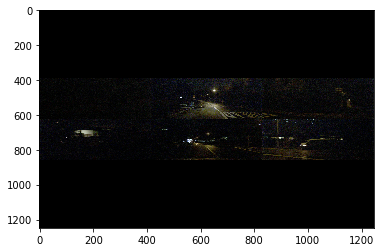

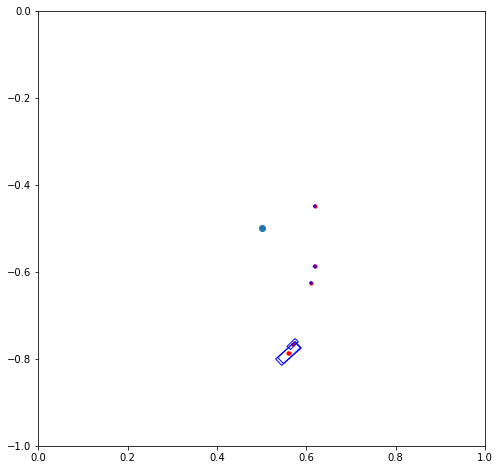

threshold : 0.3
Step : 114132  --  51 Batch 10.360676 Targets =  22 Ratio = 0.470939809625799 Threshold (0.2): 8
Step : 114132  --  52 Batch 11.496609 Targets =  98 Ratio = 0.11731233402174346 Threshold (0.2): 5
Step : 114132  --  53 Batch 8.031162 Targets =  27 Ratio = 0.29745045414677374 Threshold (0.2): 1
Step : 114132  --  54 Batch 10.451439 Targets =  23 Ratio = 0.4544103871221128 Threshold (0.2): 4
Step : 114132  --  55 Batch 12.086357 Targets =  25 Ratio = 0.48345428466796875 Threshold (0.2): 5
Step : 114132  --  56 Batch 12.68255 Targets =  34 Ratio = 0.3730161891264074 Threshold (0.2): 4
-> 0.0008
Step : 114133  --  57 Batch 9.055839 Targets =  16 Ratio = 0.5659899115562439 Threshold (0.2): 6
Step : 114133  --  58 Batch 9.985163 Targets =  40 Ratio = 0.24962906837463378 Threshold (0.2): 1
Step : 114133  --  59 Batch 9.85528 Targets =  11 Ratio = 0.8959345384077593 Threshold (0.2): 4
Step : 114133  --  60 Batch 7.0357456 Targets =  7 Ratio = 1.0051065172467912 Threshold (0.2): 

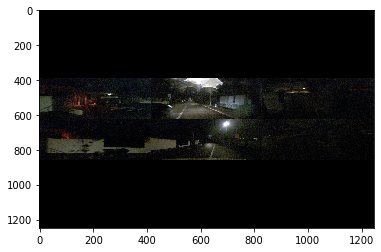

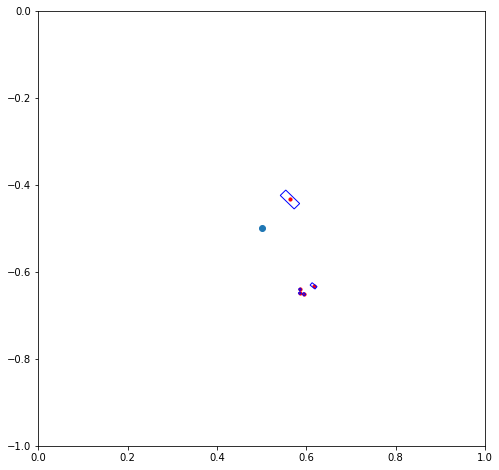

threshold : 0.3
Step : 114138  --  101 Batch 10.233555 Targets =  13 Ratio = 0.787196526160607 Threshold (0.2): 1
Step : 114138  --  102 Batch 3.2692754 Targets =  1 Ratio = 3.269275426864624 Threshold (0.2): 4
Step : 114138  --  103 Batch 10.336299 Targets =  26 Ratio = 0.39754995932945836 Threshold (0.2): 2
Step : 114138  --  104 Batch 10.516181 Targets =  41 Ratio = 0.2564922193201577 Threshold (0.2): 6
-> 0.0008
Step : 114139  --  105 Batch 12.521458 Targets =  29 Ratio = 0.43177440248686694 Threshold (0.2): 2
Step : 114139  --  106 Batch 15.207666 Targets =  28 Ratio = 0.5431309427533831 Threshold (0.2): 6
Step : 114139  --  107 Batch 8.921186 Targets =  14 Ratio = 0.6372276033673968 Threshold (0.2): 7
Step : 114139  --  108 Batch 7.070592 Targets =  46 Ratio = 0.1537085201429284 Threshold (0.2): 6
Step : 114139  --  109 Batch 10.585555 Targets =  60 Ratio = 0.1764259179433187 Threshold (0.2): 7
Step : 114139  --  110 Batch 11.699541 Targets =  51 Ratio = 0.22940276650821462 Thres

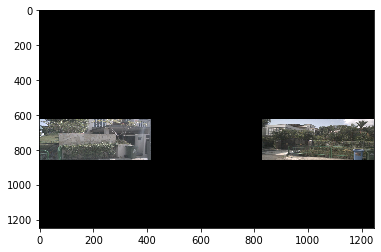

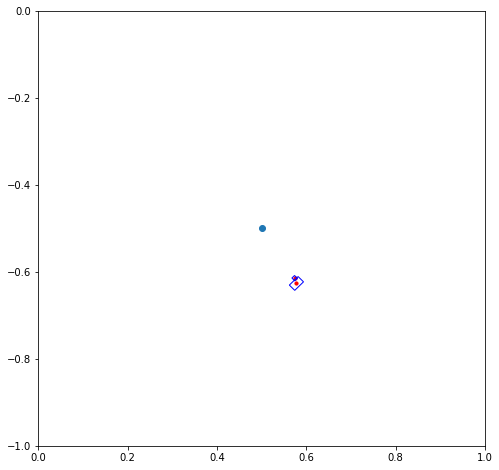

threshold : 0.3
Step : 114151  --  201 Batch 9.793059 Targets =  47 Ratio = 0.20836296487361827 Threshold (0.2): 7
Step : 114151  --  202 Batch 11.575985 Targets =  18 Ratio = 0.6431102752685547 Threshold (0.2): 4
Step : 114151  --  203 Batch 13.408623 Targets =  39 Ratio = 0.3438108395307492 Threshold (0.2): 3
Step : 114151  --  204 Batch 10.056795 Targets =  20 Ratio = 0.5028397560119628 Threshold (0.2): 6
Step : 114151  --  205 Batch 13.093071 Targets =  50 Ratio = 0.26186141967773435 Threshold (0.2): 4
Step : 114151  --  206 Batch 10.418535 Targets =  31 Ratio = 0.336081781694966 Threshold (0.2): 8
Step : 114151  --  207 Batch 10.879759 Targets =  21 Ratio = 0.5180837540399461 Threshold (0.2): 7
Step : 114151  --  208 Batch 11.340028 Targets =  22 Ratio = 0.515455809506503 Threshold (0.2): 9
-> 0.0008
Step : 114152  --  209 Batch 8.985354 Targets =  10 Ratio = 0.8985354423522949 Threshold (0.2): 4
Step : 114152  --  210 Batch 11.561083 Targets =  36 Ratio = 0.32114118999905056 Thre

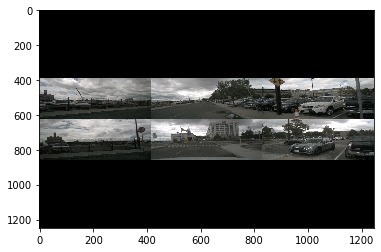

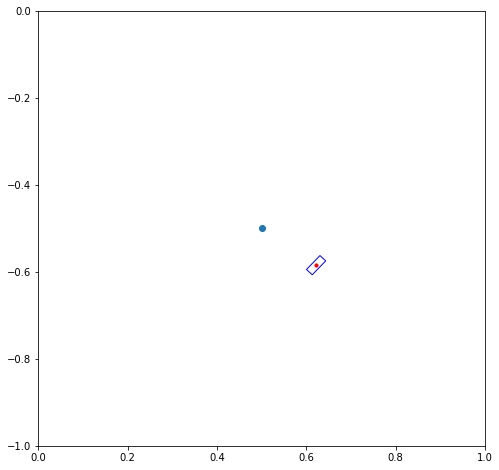

threshold : 0.3
Step : 114157  --  251 Batch 8.226407 Targets =  40 Ratio = 0.20566017627716066 Threshold (0.2): 5
Step : 114157  --  252 Batch 8.529285 Targets =  30 Ratio = 0.2843095143636068 Threshold (0.2): 8
Step : 114157  --  253 Batch 9.885059 Targets =  21 Ratio = 0.4707171122233073 Threshold (0.2): 4
Step : 114157  --  254 Batch 10.1452465 Targets =  31 Ratio = 0.3272660163141066 Threshold (0.2): 6
Step : 114157  --  255 Batch 9.698843 Targets =  26 Ratio = 0.3730324231661283 Threshold (0.2): 3
Step : 114157  --  256 Batch 7.805084 Targets =  25 Ratio = 0.312203369140625 Threshold (0.2): 9
-> 0.0008
Step : 114158  --  257 Batch 6.357256 Targets =  34 Ratio = 0.18697811575496898 Threshold (0.2): 2
Step : 114158  --  258 Batch 10.781475 Targets =  62 Ratio = 0.17389475914739794 Threshold (0.2): 4
Step : 114158  --  259 Batch 10.941054 Targets =  22 Ratio = 0.49732065200805664 Threshold (0.2): 4
Step : 114158  --  260 Batch 10.133383 Targets =  50 Ratio = 0.20266765594482422 Thre

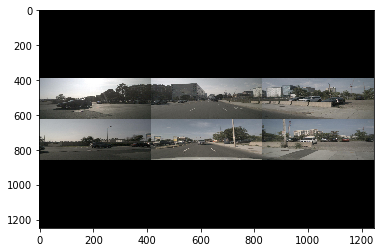

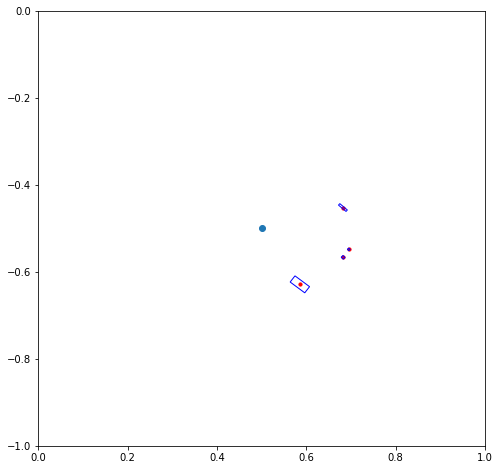

threshold : 0.3
Step : 114163  --  301 Batch 8.611977 Targets =  15 Ratio = 0.5741317749023438 Threshold (0.2): 7
Step : 114163  --  302 Batch 11.887594 Targets =  47 Ratio = 0.25292753666005235 Threshold (0.2): 5
Step : 114163  --  303 Batch 11.74284 Targets =  22 Ratio = 0.5337654460560192 Threshold (0.2): 5
Step : 114163  --  304 Batch 7.8207264 Targets =  38 Ratio = 0.2058085893329821 Threshold (0.2): 4
-> 0.0008
Step : 114164  --  305 Batch 11.0085745 Targets =  32 Ratio = 0.34401795268058777 Threshold (0.2): 6
Step : 114164  --  306 Batch 9.606025 Targets =  16 Ratio = 0.600376546382904 Threshold (0.2): 6
Step : 114164  --  307 Batch 8.89438 Targets =  24 Ratio = 0.3705991506576538 Threshold (0.2): 5
Step : 114164  --  308 Batch 13.058671 Targets =  33 Ratio = 0.3957173029581706 Threshold (0.2): 2
Step : 114164  --  309 Batch 7.92717 Targets =  16 Ratio = 0.49544811248779297 Threshold (0.2): 4
Step : 114164  --  310 Batch 14.071831 Targets =  22 Ratio = 0.6396286704323508 Thresho

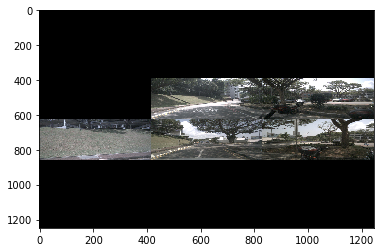

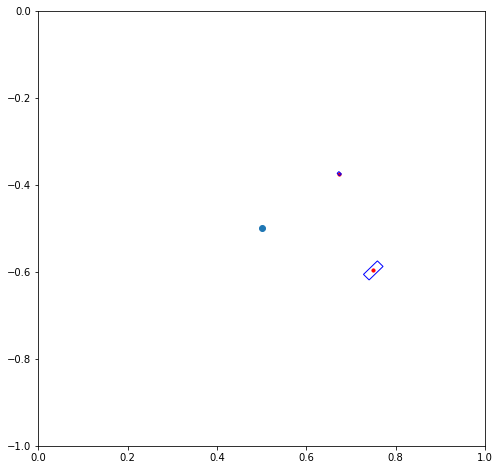

threshold : 0.3
Step : 114169  --  351 Batch 13.625784 Targets =  50 Ratio = 0.27251567840576174 Threshold (0.2): 7
Step : 114169  --  352 Batch 7.9661407 Targets =  38 Ratio = 0.2096352828176398 Threshold (0.2): 5
-> 0.0008
Step : 114170  --  353 Batch 13.240807 Targets =  37 Ratio = 0.357859637286212 Threshold (0.2): 2
Step : 114170  --  354 Batch 9.412371 Targets =  37 Ratio = 0.2543883968043972 Threshold (0.2): 5
Step : 114170  --  355 Batch 11.727951 Targets =  19 Ratio = 0.6172605815686678 Threshold (0.2): 3
Step : 114170  --  356 Batch 9.619992 Targets =  21 Ratio = 0.4580948693411691 Threshold (0.2): 4
Step : 114170  --  357 Batch 8.811533 Targets =  27 Ratio = 0.3263530731201172 Threshold (0.2): 2
Step : 114170  --  358 Batch 11.476096 Targets =  74 Ratio = 0.1550823804494497 Threshold (0.2): 5
Step : 114170  --  359 Batch 10.973137 Targets =  47 Ratio = 0.2334709979118185 Threshold (0.2): 4
Step : 114170  --  360 Batch 9.601433 Targets =  34 Ratio = 0.2823950823615579 Thresho

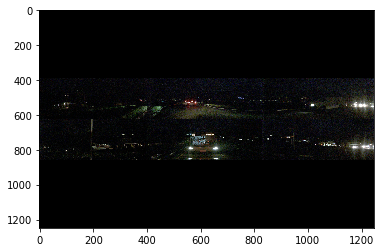

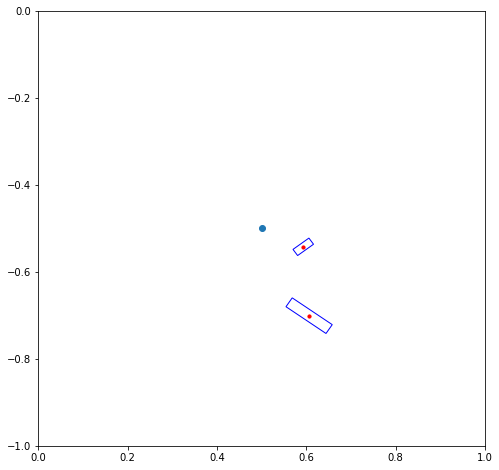

threshold : 0.3
Step : 114176  --  401 Batch 8.593776 Targets =  31 Ratio = 0.2772185725550498 Threshold (0.2): 5
Step : 114176  --  402 Batch 7.999995 Targets =  42 Ratio = 0.19047607694353377 Threshold (0.2): 4
Step : 114176  --  403 Batch 8.686835 Targets =  39 Ratio = 0.22273936638465294 Threshold (0.2): 6
Step : 114176  --  404 Batch 8.864549 Targets =  35 Ratio = 0.25327281951904296 Threshold (0.2): 4
Step : 114176  --  405 Batch 9.450788 Targets =  20 Ratio = 0.4725393772125244 Threshold (0.2): 3
Step : 114176  --  406 Batch 11.012848 Targets =  25 Ratio = 0.440513916015625 Threshold (0.2): 3
Step : 114176  --  407 Batch 8.635698 Targets =  41 Ratio = 0.21062678825564501 Threshold (0.2): 1
Step : 114176  --  408 Batch 9.863079 Targets =  48 Ratio = 0.20548081398010254 Threshold (0.2): 4
-> 0.0008
Step : 114177  --  409 Batch 11.843526 Targets =  126 Ratio = 0.09399623719472734 Threshold (0.2): 6
Step : 114177  --  410 Batch 12.405016 Targets =  46 Ratio = 0.26967425968336023 Thr

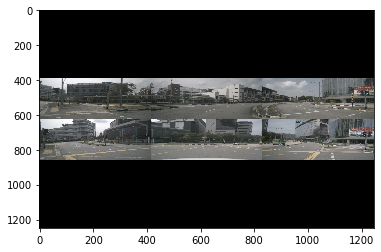

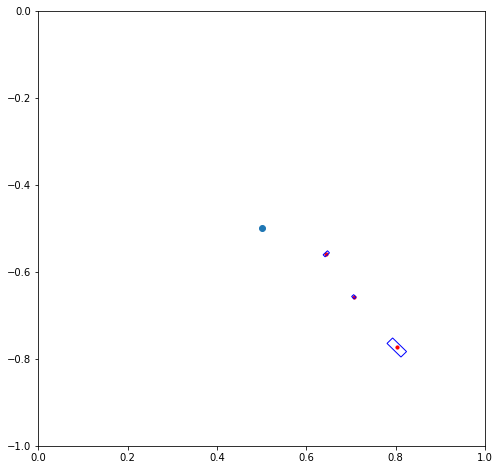

threshold : 0.3
Step : 114182  --  451 Batch 7.736665 Targets =  18 Ratio = 0.4298147095574273 Threshold (0.2): 4
Step : 114182  --  452 Batch 11.068115 Targets =  96 Ratio = 0.11529286702473958 Threshold (0.2): 4
Step : 114182  --  453 Batch 8.1559305 Targets =  41 Ratio = 0.19892513461229278 Threshold (0.2): 8
Step : 114182  --  454 Batch 11.179387 Targets =  23 Ratio = 0.4860603083734927 Threshold (0.2): 4
Step : 114182  --  455 Batch 17.27981 Targets =  12 Ratio = 1.4399841626485188 Threshold (0.2): 4
Step : 114182  --  456 Batch 9.489008 Targets =  30 Ratio = 0.31630026499430336 Threshold (0.2): 3
-> 0.0008
Step : 114183  --  457 Batch 12.858705 Targets =  25 Ratio = 0.5143481826782227 Threshold (0.2): 3
Step : 114183  --  458 Batch 4.520385 Targets =  2 Ratio = 2.260192394256592 Threshold (0.2): 4
Step : 114183  --  459 Batch 10.54254 Targets =  38 Ratio = 0.27743525254098994 Threshold (0.2): 6
Step : 114183  --  460 Batch 8.775909 Targets =  30 Ratio = 0.29253031412760416 Thresh

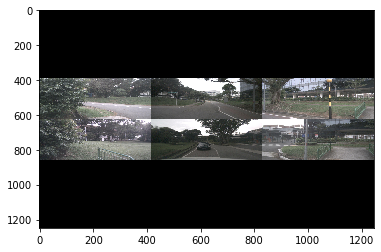

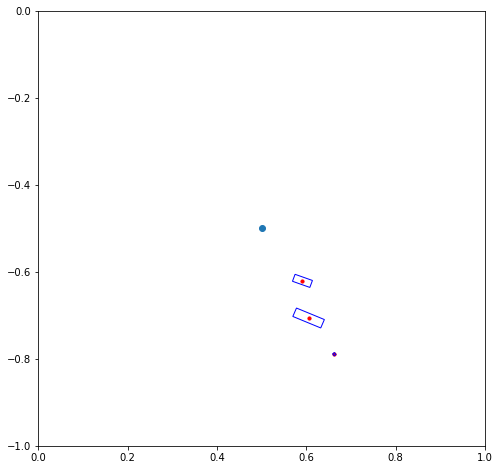

threshold : 0.3
Step : 114188  --  501 Batch 13.396427 Targets =  26 Ratio = 0.5152471982515775 Threshold (0.2): 4
Step : 114188  --  502 Batch 11.211283 Targets =  35 Ratio = 0.3203223637172154 Threshold (0.2): 4
Step : 114188  --  503 Batch 6.3056164 Targets =  6 Ratio = 1.0509360631306965 Threshold (0.2): 7
Step : 114188  --  504 Batch 2.9770699 Targets =  7 Ratio = 0.4252956935337612 Threshold (0.2): 3
-> 0.0008
Step : 114189  --  505 Batch 8.646815 Targets =  14 Ratio = 0.6176296642848423 Threshold (0.2): 5
Step : 114189  --  506 Batch 9.577211 Targets =  30 Ratio = 0.3192403793334961 Threshold (0.2): 4
Step : 114189  --  507 Batch 7.560215 Targets =  17 Ratio = 0.4447185291963465 Threshold (0.2): 6
Step : 114189  --  508 Batch 9.925726 Targets =  26 Ratio = 0.3817586898803711 Threshold (0.2): 3
Step : 114189  --  509 Batch 10.18287 Targets =  19 Ratio = 0.5359405216417814 Threshold (0.2): 7
Step : 114189  --  510 Batch 9.30277 Targets =  36 Ratio = 0.2584102683597141 Threshold (0

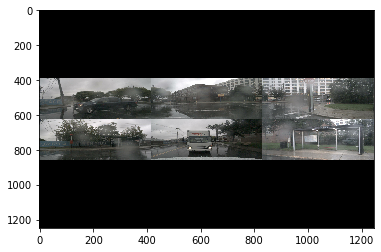

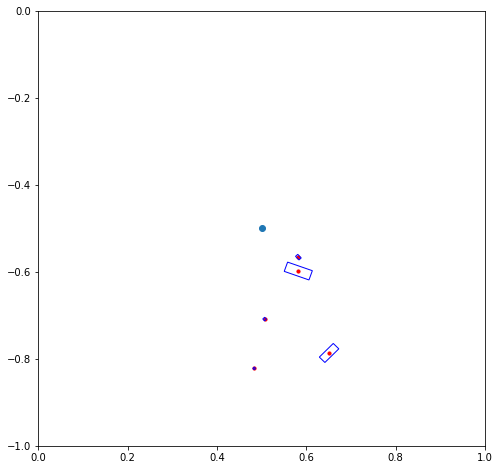

threshold : 0.3
Step : 114194  --  551 Batch 8.841442 Targets =  13 Ratio = 0.6801109313964844 Threshold (0.2): 5
Step : 114194  --  552 Batch 9.190317 Targets =  11 Ratio = 0.8354833776300604 Threshold (0.2): 7
-> 0.0008
Step : 114195  --  553 Batch 10.15004 Targets =  28 Ratio = 0.3625014168875558 Threshold (0.2): 2
Step : 114195  --  554 Batch 13.117811 Targets =  104 Ratio = 0.12613280002887434 Threshold (0.2): 5
Step : 114195  --  555 Batch 9.60389 Targets =  48 Ratio = 0.20008105039596558 Threshold (0.2): 5
Step : 114195  --  556 Batch 10.612082 Targets =  25 Ratio = 0.42448326110839846 Threshold (0.2): 5
Step : 114195  --  557 Batch 10.62549 Targets =  19 Ratio = 0.5592363257157175 Threshold (0.2): 7
Step : 114195  --  558 Batch 12.16297 Targets =  20 Ratio = 0.6081484794616699 Threshold (0.2): 7
Step : 114195  --  559 Batch 11.66044 Targets =  29 Ratio = 0.40208415327401 Threshold (0.2): 1
Step : 114195  --  560 Batch 9.068798 Targets =  22 Ratio = 0.4122180938720703 Threshold 

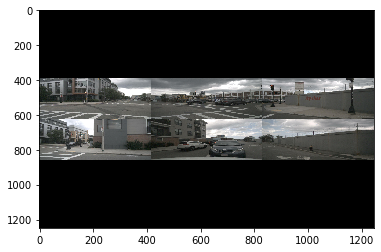

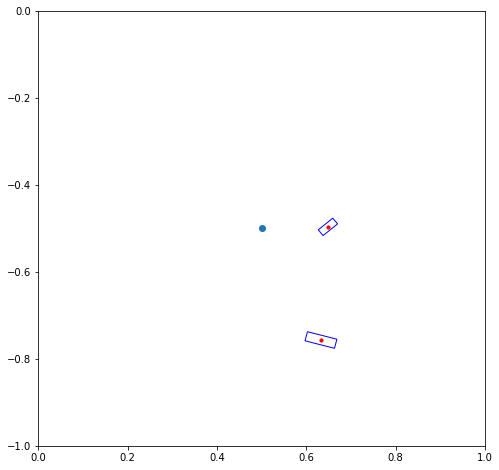

threshold : 0.3
Step : 114201  --  601 Batch 7.146798 Targets =  17 Ratio = 0.42039989022647634
Step : 114201  --  602 Batch 10.594971 Targets =  25 Ratio = 0.423798828125 Threshold (0.2): 5
Step : 114201  --  603 Batch 8.485008 Targets =  61 Ratio = 0.13909849573354252
Step : 114201  --  604 Batch 14.0468235 Targets =  56 Ratio = 0.2508361339569092 Threshold (0.2): 6
Step : 114201  --  605 Batch 11.572578 Targets =  24 Ratio = 0.4821907679239909 Threshold (0.2): 1
Step : 114201  --  606 Batch 8.629665 Targets =  24 Ratio = 0.35956939061482746 Threshold (0.2): 2
Step : 114201  --  607 Batch 12.993927 Targets =  22 Ratio = 0.5906330455433239 Threshold (0.2): 6
Step : 114201  --  608 Batch 7.296827 Targets =  17 Ratio = 0.429225108202766 Threshold (0.2): 6
-> 0.0008
Step : 114202  --  609 Batch 10.507387 Targets =  7 Ratio = 1.5010553087506975 Threshold (0.2): 4
Step : 114202  --  610 Batch 11.162328 Targets =  48 Ratio = 0.23254849513371786 Threshold (0.2): 7
Step : 114202  --  611 Batc

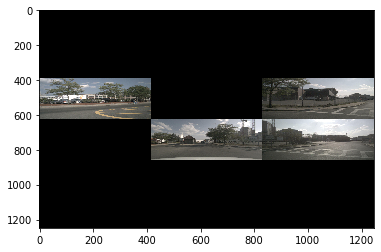

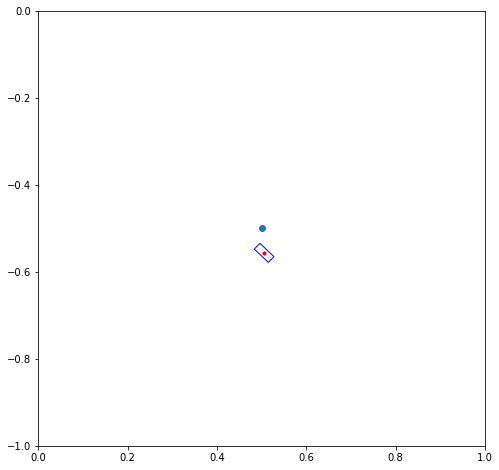

threshold : 0.3
Step : 114207  --  651 Batch 7.8968573 Targets =  30 Ratio = 0.2632285753885905 Threshold (0.2): 6
Step : 114207  --  652 Batch 12.868721 Targets =  48 Ratio = 0.2680983543395996 Threshold (0.2): 5
Step : 114207  --  653 Batch 9.664465 Targets =  17 Ratio = 0.568497938268325 Threshold (0.2): 2
Step : 114207  --  654 Batch 8.834487 Targets =  41 Ratio = 0.21547529174060356 Threshold (0.2): 3
Step : 114207  --  655 Batch 5.7660694 Targets =  13 Ratio = 0.4435438009408804 Threshold (0.2): 3
Step : 114207  --  656 Batch 8.604293 Targets =  17 Ratio = 0.506134874680463 Threshold (0.2): 6
-> 0.0008
Step : 114208  --  657 Batch 6.710846 Targets =  63 Ratio = 0.10652136424231151 Threshold (0.2): 5
Step : 114208  --  658 Batch 12.074319 Targets =  41 Ratio = 0.2944955825805664 Threshold (0.2): 5
Step : 114208  --  659 Batch 11.064912 Targets =  36 Ratio = 0.3073586622873942 Threshold (0.2): 4
Step : 114208  --  660 Batch 9.246906 Targets =  12 Ratio = 0.7705755233764648 Threshol

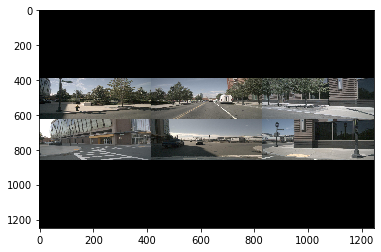

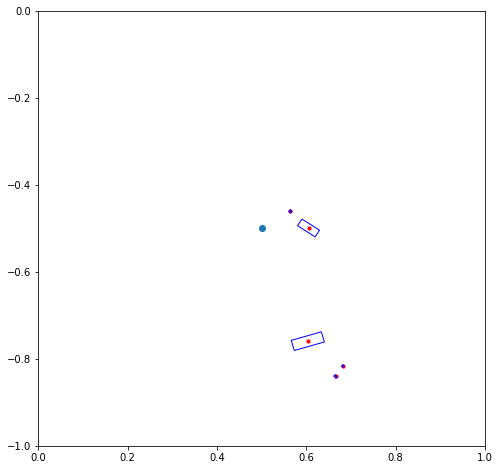

threshold : 0.3
Step : 114213  --  701 Batch 9.5124855 Targets =  39 Ratio = 0.2439098847218049 Threshold (0.2): 4
Step : 114213  --  702 Batch 9.5736885 Targets =  51 Ratio = 0.18771938249176623 Threshold (0.2): 4
Step : 114213  --  703 Batch 10.995986 Targets =  30 Ratio = 0.36653286616007485 Threshold (0.2): 7
Step : 114213  --  704 Batch 12.75263 Targets =  30 Ratio = 0.4250876744588216 Threshold (0.2): 5
-> 0.0008
Step : 114214  --  705 Batch 6.72677 Targets =  10 Ratio = 0.6726769924163818 Threshold (0.2): 6
Step : 114214  --  706 Batch 7.7221937 Targets =  26 Ratio = 0.2970074506906363 Threshold (0.2): 7
Step : 114214  --  707 Batch 8.840043 Targets =  23 Ratio = 0.38434969860574475 Threshold (0.2): 6
Step : 114214  --  708 Batch 11.045238 Targets =  29 Ratio = 0.3808702600413355 Threshold (0.2): 1
Step : 114214  --  709 Batch 8.795654 Targets =  15 Ratio = 0.586376953125 Threshold (0.2): 6
Step : 114214  --  710 Batch 5.8460383 Targets =  23 Ratio = 0.25417558006618335
Step : 1

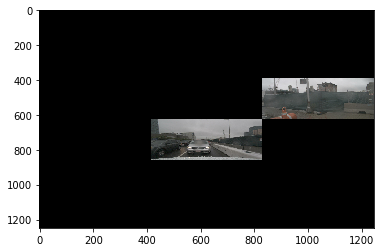

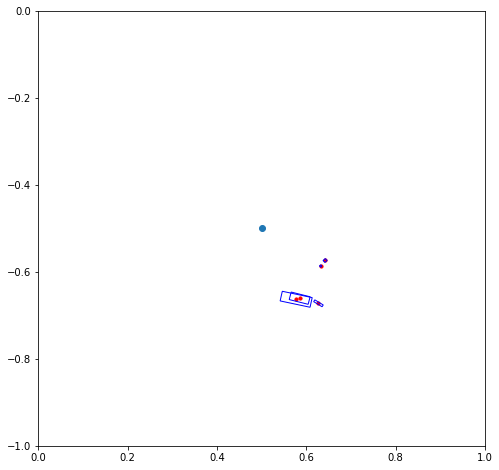

threshold : 0.3
Step : 114219  --  751 Batch 9.716696 Targets =  16 Ratio = 0.6072934865951538 Threshold (0.2): 7
Step : 114219  --  752 Batch 9.054335 Targets =  37 Ratio = 0.2447117470406197 Threshold (0.2): 7
-> 0.0008
Step : 114220  --  753 Batch 8.122917 Targets =  37 Ratio = 0.2195383020349451 Threshold (0.2): 2
Step : 114220  --  754 Batch 12.374559 Targets =  29 Ratio = 0.4267089449126145 Threshold (0.2): 4
Step : 114220  --  755 Batch 11.821591 Targets =  92 Ratio = 0.12849555844845978 Threshold (0.2): 6
Step : 114220  --  756 Batch 11.080603 Targets =  36 Ratio = 0.3077945179409451 Threshold (0.2): 4
Step : 114220  --  757 Batch 8.078645 Targets =  68 Ratio = 0.1188035993015065 Threshold (0.2): 6
Step : 114220  --  758 Batch 8.1704035 Targets =  23 Ratio = 0.35523493393607763 Threshold (0.2): 7
Step : 114220  --  759 Batch 11.87843 Targets =  76 Ratio = 0.1562951364015278 Threshold (0.2): 5
Step : 114220  --  760 Batch 9.564349 Targets =  31 Ratio = 0.3085273927257907 Thresho

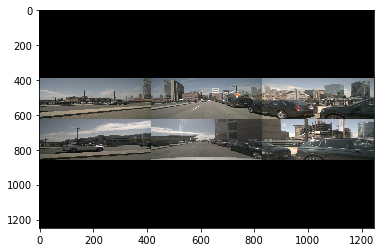

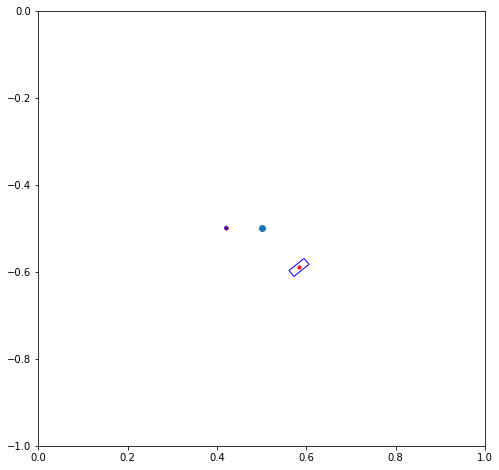

threshold : 0.3
Step : 114226  --  801 Batch 7.552517 Targets =  14 Ratio = 0.5394654955182757 Threshold (0.2): 3
Step : 114226  --  802 Batch 10.587111 Targets =  33 Ratio = 0.320821559790409 Threshold (0.2): 5
Step : 114226  --  803 Batch 10.754677 Targets =  89 Ratio = 0.12083906538031075 Threshold (0.2): 4
Step : 114226  --  804 Batch 8.438129 Targets =  30 Ratio = 0.28127098083496094 Threshold (0.2): 6
Step : 114226  --  805 Batch 9.394833 Targets =  48 Ratio = 0.195725679397583 Threshold (0.2): 6
Step : 114226  --  806 Batch 11.798892 Targets =  13 Ratio = 0.9076070785522461 Threshold (0.2): 4
Step : 114226  --  807 Batch 9.943924 Targets =  28 Ratio = 0.355140141078404 Threshold (0.2): 9
Step : 114226  --  808 Batch 7.577565 Targets =  28 Ratio = 0.2706273283277239 Threshold (0.2): 4
-> 0.0008
Step : 114227  --  809 Batch 9.450896 Targets =  40 Ratio = 0.23627240657806398 Threshold (0.2): 5
Step : 114227  --  810 Batch 8.246309 Targets =  46 Ratio = 0.17926759305207626 Threshold

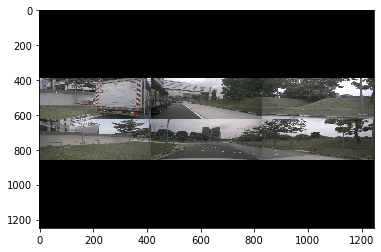

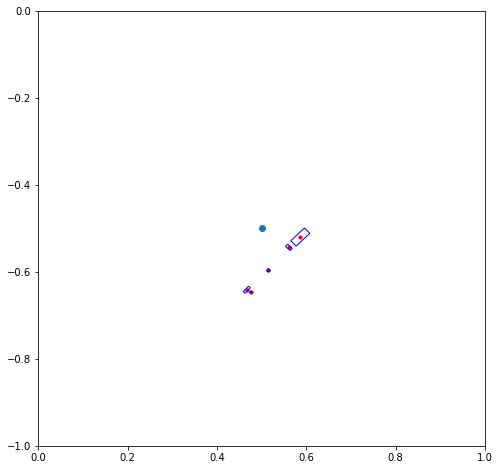

threshold : 0.3
Step : 114232  --  851 Batch 9.573159 Targets =  18 Ratio = 0.5318421787685819 Threshold (0.2): 3
Step : 114232  --  852 Batch 9.033666 Targets =  18 Ratio = 0.501870314280192 Threshold (0.2): 7
Step : 114232  --  853 Batch 8.049877 Targets =  22 Ratio = 0.36590350757945667 Threshold (0.2): 3
Step : 114232  --  854 Batch 7.9414916 Targets =  25 Ratio = 0.3176596641540527 Threshold (0.2): 2
Step : 114232  --  855 Batch 7.5590086 Targets =  33 Ratio = 0.22906086661598898 Threshold (0.2): 4
Step : 114232  --  856 Batch 9.087961 Targets =  9 Ratio = 1.0097734663221571 Threshold (0.2): 3
-> 0.0008
Step : 114233  --  857 Batch 9.6486 Targets =  35 Ratio = 0.27567427498953684 Threshold (0.2): 5
Step : 114233  --  858 Batch 5.73282 Targets =  10 Ratio = 0.57328200340271 Threshold (0.2): 7
Step : 114233  --  859 Batch 7.5701094 Targets =  30 Ratio = 0.2523369789123535 Threshold (0.2): 5
Step : 114233  --  860 Batch 9.495422 Targets =  41 Ratio = 0.23159566739710366 Threshold (0.

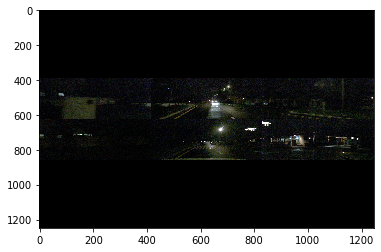

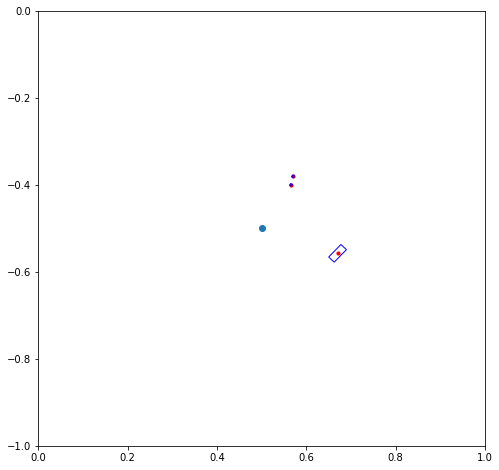

threshold : 0.3
Step : 114238  --  901 Batch 9.082359 Targets =  37 Ratio = 0.2454691706476985 Threshold (0.2): 7
Step : 114238  --  902 Batch 8.808525 Targets =  21 Ratio = 0.41945357549758183 Threshold (0.2): 5
Step : 114238  --  903 Batch 9.981552 Targets =  25 Ratio = 0.3992620849609375 Threshold (0.2): 4
Step : 114238  --  904 Batch 13.114111 Targets =  25 Ratio = 0.524564437866211 Threshold (0.2): 2
-> 0.0008
Step : 114239  --  905 Batch 8.757509 Targets =  8 Ratio = 1.0946886539459229 Threshold (0.2): 3
Step : 114239  --  906 Batch 13.505733 Targets =  51 Ratio = 0.2648182850258023 Threshold (0.2): 6
Step : 114239  --  907 Batch 11.740692 Targets =  42 Ratio = 0.27954028901599703 Threshold (0.2): 3
Step : 114239  --  908 Batch 5.589318 Targets =  13 Ratio = 0.42994752297034633 Threshold (0.2): 2
Step : 114239  --  909 Batch 10.41084 Targets =  9 Ratio = 1.1567600038316515 Threshold (0.2): 4
Step : 114239  --  910 Batch 5.9587173 Targets =  3 Ratio = 1.9862391153971355 Threshold 

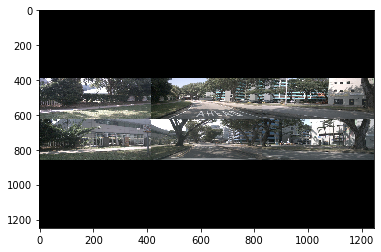

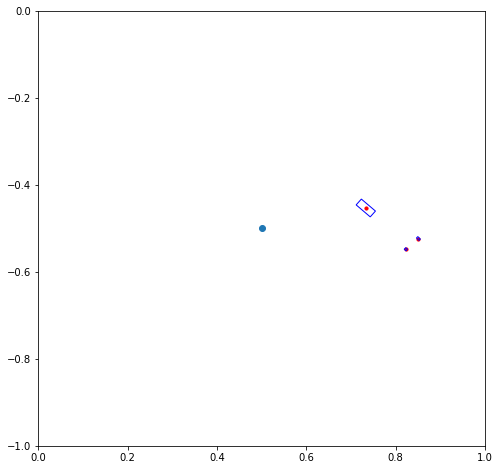

threshold : 0.3
Step : 114244  --  951 Batch 10.699554 Targets =  21 Ratio = 0.5095025925409227 Threshold (0.2): 5
Step : 114244  --  952 Batch 9.983764 Targets =  49 Ratio = 0.20375027948496294 Threshold (0.2): 5
-> 0.0008
Step : 114245  --  953 Batch 13.29652 Targets =  17 Ratio = 0.7821482490090763 Threshold (0.2): 4
Step : 114245  --  954 Batch 11.60828 Targets =  36 Ratio = 0.32245222727457684 Threshold (0.2): 7
Step : 114245  --  955 Batch 6.15353 Targets =  8 Ratio = 0.7691912651062012 Threshold (0.2): 6
Step : 114245  --  956 Batch 11.20359 Targets =  25 Ratio = 0.44814361572265626 Threshold (0.2): 4
Step : 114245  --  957 Batch 10.083565 Targets =  112 Ratio = 0.09003182819911412 Threshold (0.2): 3
Step : 114245  --  958 Batch 11.633366 Targets =  43 Ratio = 0.2705433867698492 Threshold (0.2): 5
Step : 114245  --  959 Batch 11.9034195 Targets =  17 Ratio = 0.7002011467428768 Threshold (0.2): 4
Step : 114245  --  960 Batch 10.101528 Targets =  53 Ratio = 0.19059487108914358 Thr

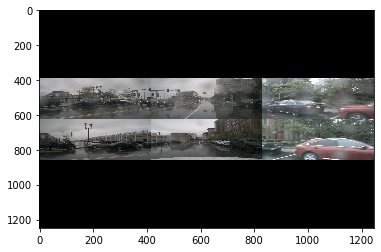

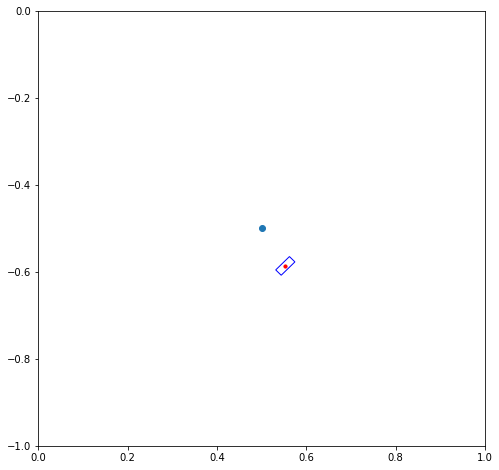

threshold : 0.3
Step : 114251  --  1001 Batch 10.163761 Targets =  13 Ratio = 0.7818277799166166 Threshold (0.2): 7
Step : 114251  --  1002 Batch 5.5825176 Targets =  21 Ratio = 0.26583417256673175
Step : 114251  --  1003 Batch 11.558482 Targets =  20 Ratio = 0.577924108505249 Threshold (0.2): 2
Step : 114251  --  1004 Batch 10.167191 Targets =  20 Ratio = 0.5083595275878906 Threshold (0.2): 1
Step : 114251  --  1005 Batch 11.283419 Targets =  16 Ratio = 0.7052136659622192 Threshold (0.2): 7
Step : 114251  --  1006 Batch 10.426403 Targets =  24 Ratio = 0.4344334602355957 Threshold (0.2): 5
Step : 114251  --  1007 Batch 11.658205 Targets =  39 Ratio = 0.29892833416278547 Threshold (0.2): 5
Step : 114251  --  1008 Batch 7.966859 Targets =  34 Ratio = 0.23431937834795782 Threshold (0.2): 7
-> 0.0008
Step : 114252  --  1009 Batch 7.676736 Targets =  35 Ratio = 0.21933531079973492 Threshold (0.2): 5
Step : 114252  --  1010 Batch 10.3007345 Targets =  38 Ratio = 0.27107196105153936 Threshold

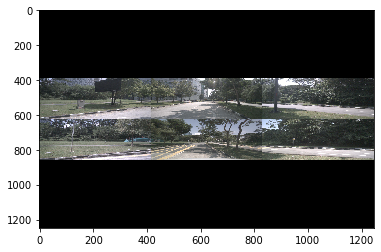

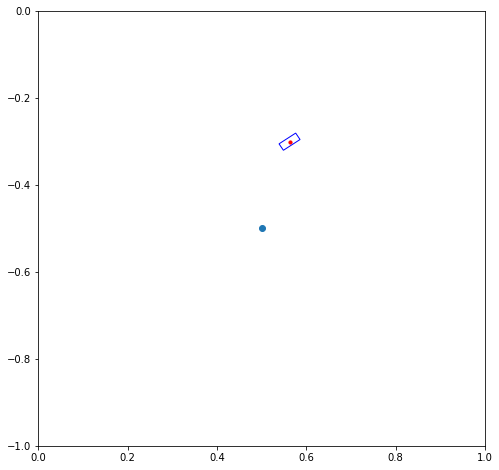

threshold : 0.3
Step : 114257  --  1051 Batch 9.669369 Targets =  38 Ratio = 0.2544570722078022 Threshold (0.2): 5
Step : 114257  --  1052 Batch 6.8840647 Targets =  5 Ratio = 1.3768129348754883 Threshold (0.2): 6
Step : 114257  --  1053 Batch 13.118956 Targets =  55 Ratio = 0.23852646567604757 Threshold (0.2): 5
Step : 114257  --  1054 Batch 8.966627 Targets =  28 Ratio = 0.3202366828918457 Threshold (0.2): 4
Step : 114257  --  1055 Batch 7.2016096 Targets =  3 Ratio = 2.40053653717041 Threshold (0.2): 5
Step : 114257  --  1056 Batch 13.139212 Targets =  74 Ratio = 0.17755691425220385 Threshold (0.2): 4
-> 0.0008
Step : 114258  --  1057 Batch 10.175927 Targets =  39 Ratio = 0.26092120928642076 Threshold (0.2): 7
Step : 114258  --  1058 Batch 10.24194 Targets =  51 Ratio = 0.2008223440132889 Threshold (0.2): 7
Step : 114258  --  1059 Batch 10.031822 Targets =  11 Ratio = 0.9119838367808949 Threshold (0.2): 6
Step : 114258  --  1060 Batch 11.3778 Targets =  55 Ratio = 0.2068690906871448

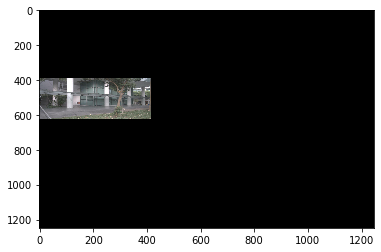

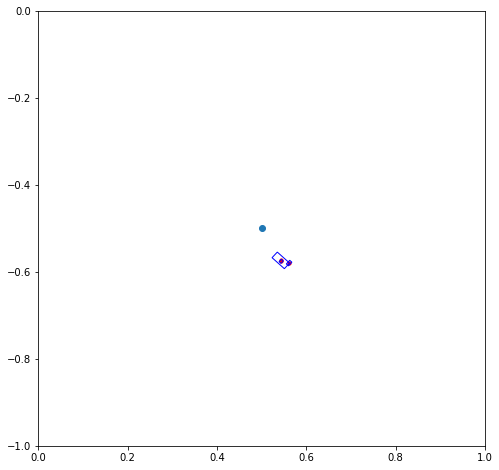

threshold : 0.3
Step : 114263  --  1101 Batch 7.9686074 Targets =  35 Ratio = 0.2276744978768485 Threshold (0.2): 5
Step : 114263  --  1102 Batch 9.823322 Targets =  19 Ratio = 0.5170169629548725 Threshold (0.2): 4
Step : 114263  --  1103 Batch 12.359678 Targets =  56 Ratio = 0.22070854050772531 Threshold (0.2): 4
Step : 114263  --  1104 Batch 10.6503935 Targets =  28 Ratio = 0.38037119592939106 Threshold (0.2): 5
-> 0.0008
Step : 114264  --  1105 Batch 13.646058 Targets =  60 Ratio = 0.22743430137634277 Threshold (0.2): 4
Step : 114264  --  1106 Batch 8.472584 Targets =  38 Ratio = 0.22296273080926193 Threshold (0.2): 5
Step : 114264  --  1107 Batch 11.763793 Targets =  59 Ratio = 0.1993863218921726 Threshold (0.2): 5
Step : 114264  --  1108 Batch 8.448378 Targets =  15 Ratio = 0.5632251739501953 Threshold (0.2): 3
Step : 114264  --  1109 Batch 10.953459 Targets =  59 Ratio = 0.18565184383069055 Threshold (0.2): 4
Step : 114264  --  1110 Batch 12.437137 Targets =  26 Ratio = 0.4783514

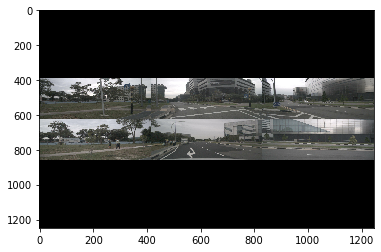

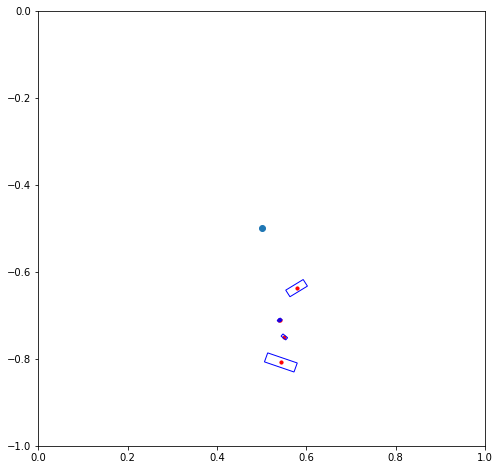

threshold : 0.3
Step : 114269  --  1151 Batch 7.9795656 Targets =  18 Ratio = 0.4433092011345757 Threshold (0.2): 2
Step : 114269  --  1152 Batch 8.94181 Targets =  11 Ratio = 0.8128917867487128 Threshold (0.2): 4
-> 0.0008
Step : 114270  --  1153 Batch 10.400567 Targets =  19 Ratio = 0.5473982660393966 Threshold (0.2): 6
Step : 114270  --  1154 Batch 11.519701 Targets =  40 Ratio = 0.287992525100708 Threshold (0.2): 6
Step : 114270  --  1155 Batch 10.511383 Targets =  55 Ratio = 0.19111605557528408 Threshold (0.2): 5
Step : 114270  --  1156 Batch 11.274066 Targets =  51 Ratio = 0.22106011708577475 Threshold (0.2): 3
Step : 114270  --  1157 Batch 10.819861 Targets =  31 Ratio = 0.34902778748543034 Threshold (0.2): 2
Step : 114270  --  1158 Batch 6.4682083 Targets =  30 Ratio = 0.21560694376627604 Threshold (0.2): 8
Step : 114270  --  1159 Batch 9.631698 Targets =  51 Ratio = 0.1888568167592965 Threshold (0.2): 4
Step : 114270  --  1160 Batch 8.741985 Targets =  26 Ratio = 0.33623020465

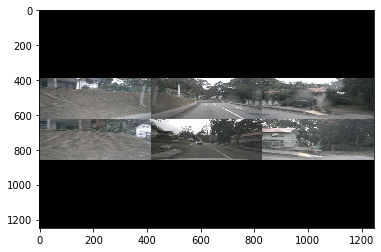

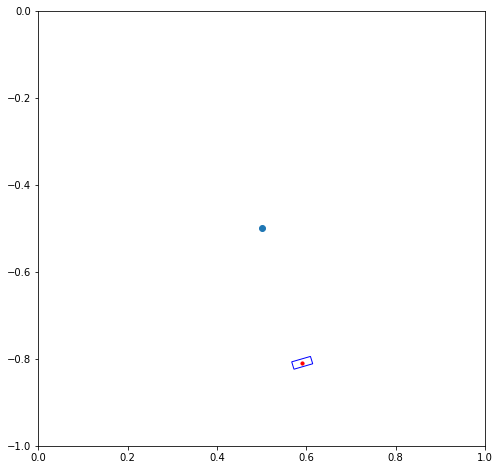

threshold : 0.3
Step : 114276  --  1201 Batch 11.335097 Targets =  34 Ratio = 0.3333852150860955 Threshold (0.2): 2
Step : 114276  --  1202 Batch 10.58391 Targets =  51 Ratio = 0.20752764683143765 Threshold (0.2): 5
Step : 114276  --  1203 Batch 10.945811 Targets =  14 Ratio = 0.7818436622619629 Threshold (0.2): 5
Step : 114276  --  1204 Batch 12.339952 Targets =  53 Ratio = 0.23282929186551077 Threshold (0.2): 5
Step : 114276  --  1205 Batch 6.2616715 Targets =  20 Ratio = 0.3130835771560669 Threshold (0.2): 4
Step : 114276  --  1206 Batch 12.012106 Targets =  113 Ratio = 0.1063018224935616 Threshold (0.2): 5
Step : 114276  --  1207 Batch 8.820134 Targets =  31 Ratio = 0.2845204568678333 Threshold (0.2): 6
Step : 114276  --  1208 Batch 9.0761175 Targets =  83 Ratio = 0.1093508134405297 Threshold (0.2): 3
-> 0.0008
Step : 114277  --  1209 Batch 14.005069 Targets =  40 Ratio = 0.35012671947479246 Threshold (0.2): 6
Step : 114277  --  1210 Batch 10.935559 Targets =  47 Ratio = 0.23267147

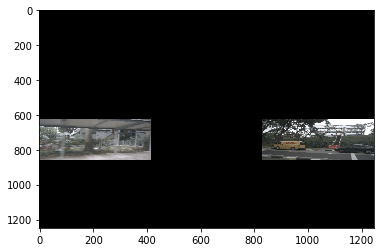

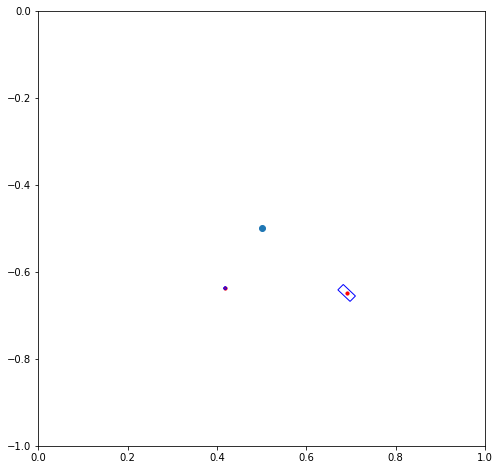

threshold : 0.3
Step : 114282  --  1251 Batch 9.367358 Targets =  23 Ratio = 0.40727644381315814 Threshold (0.2): 5
Step : 114282  --  1252 Batch 10.602635 Targets =  27 Ratio = 0.39269019939281324 Threshold (0.2): 2
Step : 114282  --  1253 Batch 8.415966 Targets =  47 Ratio = 0.17906310710501164 Threshold (0.2): 4
Step : 114282  --  1254 Batch 11.33751 Targets =  57 Ratio = 0.1989036861218904 Threshold (0.2): 3
Step : 114282  --  1255 Batch 8.899089 Targets =  15 Ratio = 0.593272590637207 Threshold (0.2): 6
Step : 114282  --  1256 Batch 14.151797 Targets =  33 Ratio = 0.4288423422611121 Threshold (0.2): 4
-> 0.0008
Step : 114283  --  1257 Batch 7.3408976 Targets =  28 Ratio = 0.2621749128614153 Threshold (0.2): 6
Step : 114283  --  1258 Batch 7.0498223 Targets =  10 Ratio = 0.7049822330474853 Threshold (0.2): 4
Step : 114283  --  1259 Batch 8.296658 Targets =  9 Ratio = 0.921850840250651 Threshold (0.2): 5
Step : 114283  --  1260 Batch 7.0329065 Targets =  11 Ratio = 0.639355139298872

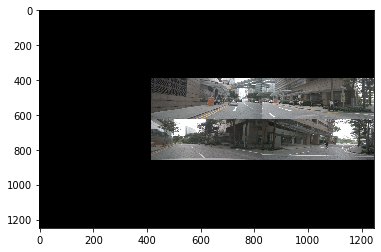

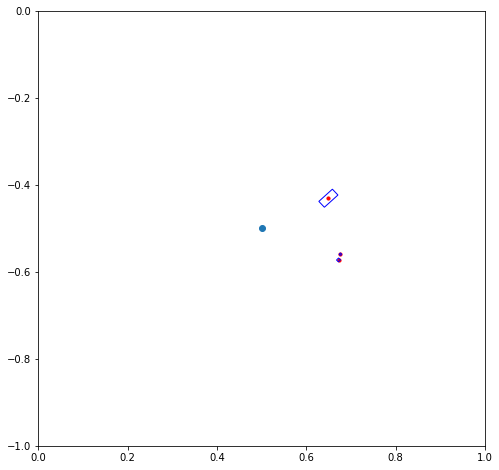

threshold : 0.3
Step : 114288  --  1301 Batch 10.13446 Targets =  61 Ratio = 0.16613869588883196 Threshold (0.2): 4
Step : 114288  --  1302 Batch 9.1282215 Targets =  11 Ratio = 0.8298383192582564 Threshold (0.2): 2
Step : 114288  --  1303 Batch 10.97732 Targets =  43 Ratio = 0.255286505055982 Threshold (0.2): 5
Step : 114288  --  1304 Batch 12.621737 Targets =  41 Ratio = 0.3078472323533965 Threshold (0.2): 3
-> 0.0008
Step : 114289  --  1305 Batch 13.16419 Targets =  54 Ratio = 0.2437813017103407 Threshold (0.2): 1
Step : 114289  --  1306 Batch 6.86127 Targets =  21 Ratio = 0.3267271405174619 Threshold (0.2): 3
Step : 114289  --  1307 Batch 12.493291 Targets =  33 Ratio = 0.378584572763154 Threshold (0.2): 3
Step : 114289  --  1308 Batch 8.109062 Targets =  38 Ratio = 0.21339637354800575 Threshold (0.2): 4
Step : 114289  --  1309 Batch 12.943928 Targets =  84 Ratio = 0.15409437815348306 Threshold (0.2): 6
Step : 114289  --  1310 Batch 6.652672 Targets =  2 Ratio = 3.326335906982422 T

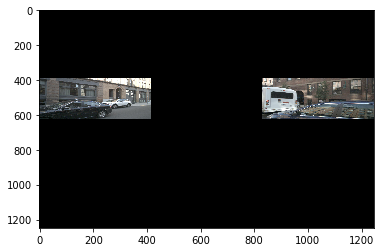

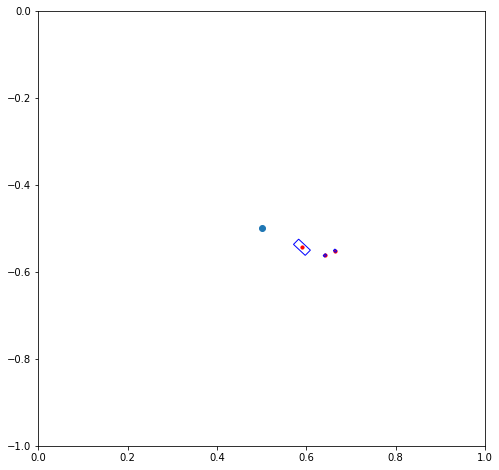

threshold : 0.3
Step : 114294  --  1351 Batch 8.163216 Targets =  40 Ratio = 0.20408039093017577 Threshold (0.2): 5
Step : 114294  --  1352 Batch 8.82823 Targets =  53 Ratio = 0.16657037555046803 Threshold (0.2): 5
-> 0.0008
Step : 114295  --  1353 Batch 12.848245 Targets =  32 Ratio = 0.4015076458454132 Threshold (0.2): 3
Step : 114295  --  1354 Batch 6.8520174 Targets =  22 Ratio = 0.31145533648404206 Threshold (0.2): 6
Step : 114295  --  1355 Batch 9.285446 Targets =  46 Ratio = 0.20185752536939539 Threshold (0.2): 4
Step : 114295  --  1356 Batch 11.21081 Targets =  34 Ratio = 0.32972969728357654 Threshold (0.2): 6
Step : 114295  --  1357 Batch 9.003006 Targets =  39 Ratio = 0.23084630721654648 Threshold (0.2): 4
Step : 114295  --  1358 Batch 7.029194 Targets =  99 Ratio = 0.0710019583653922 Threshold (0.2): 2
Step : 114295  --  1359 Batch 8.687621 Targets =  38 Ratio = 0.22862160833258377 Threshold (0.2): 2
Step : 114295  --  1360 Batch 7.4774566 Targets =  48 Ratio = 0.15578034520

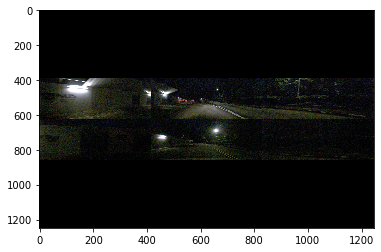

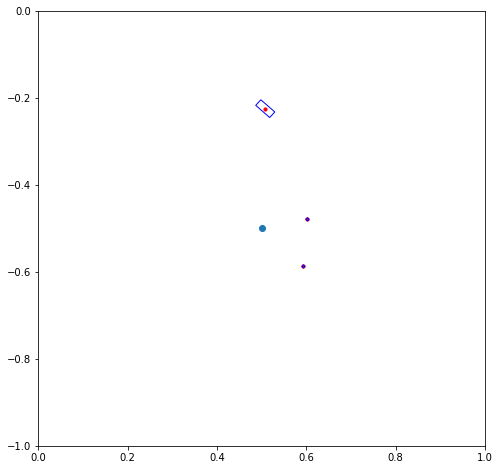

threshold : 0.3
Step : 114301  --  1401 Batch 8.620829 Targets =  34 Ratio = 0.2535537831923541 Threshold (0.2): 4
Step : 114301  --  1402 Batch 14.419241 Targets =  13 Ratio = 1.109172380887545 Threshold (0.2): 5
Step : 114301  --  1403 Batch 8.78864 Targets =  58 Ratio = 0.15152827624616952 Threshold (0.2): 4
Step : 114301  --  1404 Batch 11.273526 Targets =  24 Ratio = 0.4697302579879761 Threshold (0.2): 3
Step : 114301  --  1405 Batch 9.683221 Targets =  31 Ratio = 0.3123619633336221 Threshold (0.2): 7
Step : 114301  --  1406 Batch 9.567912 Targets =  114 Ratio = 0.08392905352408425 Threshold (0.2): 3
Step : 114301  --  1407 Batch 9.137671 Targets =  77 Ratio = 0.11867105806028688 Threshold (0.2): 4
Step : 114301  --  1408 Batch 9.514328 Targets =  25 Ratio = 0.3805731201171875 Threshold (0.2): 4
-> 0.0008
Step : 114302  --  1409 Batch 8.783344 Targets =  31 Ratio = 0.28333368609028475 Threshold (0.2): 4
Step : 114302  --  1410 Batch 8.660084 Targets =  24 Ratio = 0.360836823781331

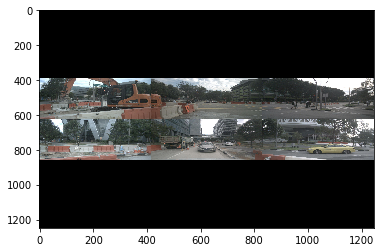

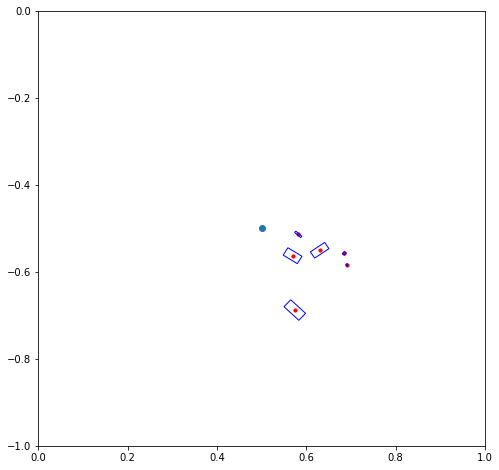

threshold : 0.3
Step : 114307  --  1451 Batch 13.088158 Targets =  42 Ratio = 0.311622801281157 Threshold (0.2): 4
Step : 114307  --  1452 Batch 10.794234 Targets =  38 Ratio = 0.28405879673204926 Threshold (0.2): 4
Step : 114307  --  1453 Batch 12.867369 Targets =  29 Ratio = 0.4437023689006937 Threshold (0.2): 6
Step : 114307  --  1454 Batch 9.771564 Targets =  35 Ratio = 0.2791875294276646 Threshold (0.2): 3
Step : 114307  --  1455 Batch 11.527166 Targets =  18 Ratio = 0.6403981314765083 Threshold (0.2): 4
Step : 114307  --  1456 Batch 12.6201105 Targets =  12 Ratio = 1.0516758759816487 Threshold (0.2): 3
-> 0.0008
Step : 114308  --  1457 Batch 10.908678 Targets =  22 Ratio = 0.4958490024913441 Threshold (0.2): 3
Step : 114308  --  1458 Batch 9.911691 Targets =  48 Ratio = 0.2064935564994812 Threshold (0.2): 6
Step : 114308  --  1459 Batch 9.440933 Targets =  50 Ratio = 0.18881866455078125 Threshold (0.2): 5
Step : 114308  --  1460 Batch 14.069541 Targets =  32 Ratio = 0.43967315554

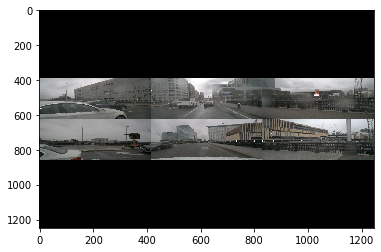

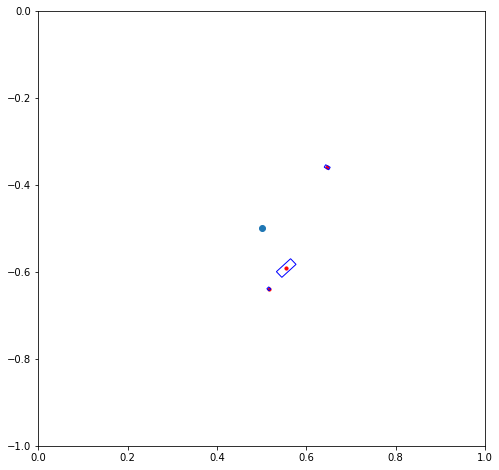

threshold : 0.3
Step : 114313  --  1501 Batch 12.603792 Targets =  79 Ratio = 0.15954167329812352 Threshold (0.2): 5
Step : 114313  --  1502 Batch 9.935754 Targets =  23 Ratio = 0.43198929662289826 Threshold (0.2): 5
Step : 114313  --  1503 Batch 7.775311 Targets =  11 Ratio = 0.70684645392678 Threshold (0.2): 2
Step : 114313  --  1504 Batch 10.037037 Targets =  57 Ratio = 0.17608836659213953 Threshold (0.2): 5
-> 0.0008
Step : 114314  --  1505 Batch 10.23732 Targets =  20 Ratio = 0.5118659973144531 Threshold (0.2): 5
Step : 114314  --  1506 Batch 12.086957 Targets =  35 Ratio = 0.3453416279384068 Threshold (0.2): 2
Step : 114314  --  1507 Batch 9.830411 Targets =  15 Ratio = 0.655360730489095 Threshold (0.2): 4
Step : 114314  --  1508 Batch 13.797715 Targets =  8 Ratio = 1.7247143983840942 Threshold (0.2): 4
Step : 114314  --  1509 Batch 9.29575 Targets =  46 Ratio = 0.2020815144414487 Threshold (0.2): 7
Step : 114314  --  1510 Batch 10.954821 Targets =  25 Ratio = 0.4381928253173828 

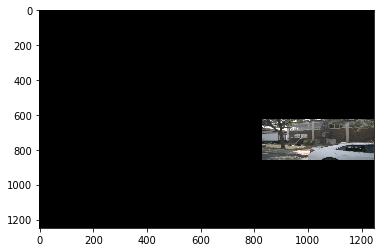

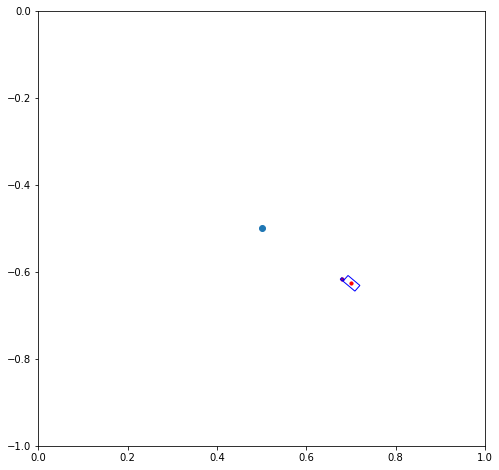

threshold : 0.3
Step : 114319  --  1551 Batch 11.617918 Targets =  94 Ratio = 0.12359487249496136 Threshold (0.2): 3
Step : 114319  --  1552 Batch 10.488407 Targets =  54 Ratio = 0.1942297617594401 Threshold (0.2): 4
-> 0.0008
Step : 114320  --  1553 Batch 9.224206 Targets =  20 Ratio = 0.461210298538208 Threshold (0.2): 3
Step : 114320  --  1554 Batch 9.682322 Targets =  61 Ratio = 0.15872658276167073 Threshold (0.2): 4
Step : 114320  --  1555 Batch 9.77936 Targets =  18 Ratio = 0.5432977676391602
Step : 114320  --  1556 Batch 10.398563 Targets =  21 Ratio = 0.49516968500046504 Threshold (0.2): 6
Step : 114320  --  1557 Batch 11.112694 Targets =  47 Ratio = 0.2364402933323637 Threshold (0.2): 6
Step : 114320  --  1558 Batch 9.253745 Targets =  16 Ratio = 0.578359067440033 Threshold (0.2): 4
Step : 114320  --  1559 Batch 6.715417 Targets =  6 Ratio = 1.11923615137736 Threshold (0.2): 5
Step : 114320  --  1560 Batch 7.1745114 Targets =  31 Ratio = 0.23143585266605501 Threshold (0.2): 5


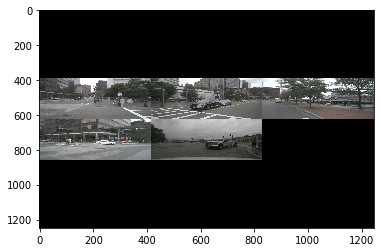

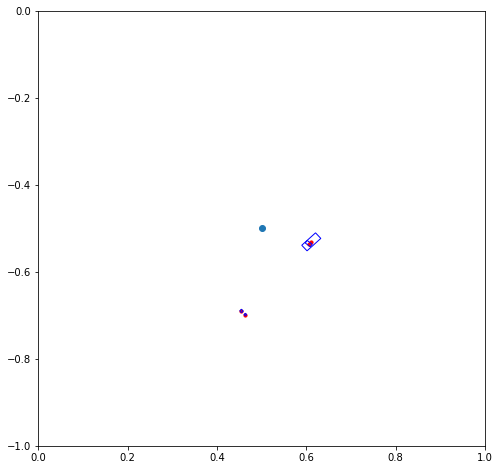

threshold : 0.3
Step : 114326  --  1601 Batch 8.767285 Targets =  34 Ratio = 0.25786133373484893 Threshold (0.2): 4
Step : 114326  --  1602 Batch 8.698666 Targets =  23 Ratio = 0.37820285299549933 Threshold (0.2): 6
Step : 114326  --  1603 Batch 9.847719 Targets =  8 Ratio = 1.2309648990631104 Threshold (0.2): 3
Step : 114326  --  1604 Batch 5.836007 Targets =  19 Ratio = 0.3071582693802683 Threshold (0.2): 3
Step : 114326  --  1605 Batch 10.499984 Targets =  12 Ratio = 0.8749986489613851 Threshold (0.2): 7
Step : 114326  --  1606 Batch 12.876706 Targets =  82 Ratio = 0.1570330015042933 Threshold (0.2): 5
Step : 114326  --  1607 Batch 6.6321325 Targets =  33 Ratio = 0.20097371303673947 Threshold (0.2): 2
Step : 114326  --  1608 Batch 9.156047 Targets =  37 Ratio = 0.2474607261451515 Threshold (0.2): 6
-> 0.0008
Step : 114327  --  1609 Batch 8.265447 Targets =  31 Ratio = 0.26662731170654297 Threshold (0.2): 7
Step : 114327  --  1610 Batch 10.551796 Targets =  66 Ratio = 0.1598756963556

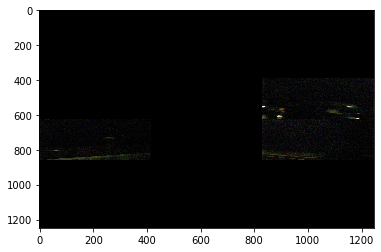

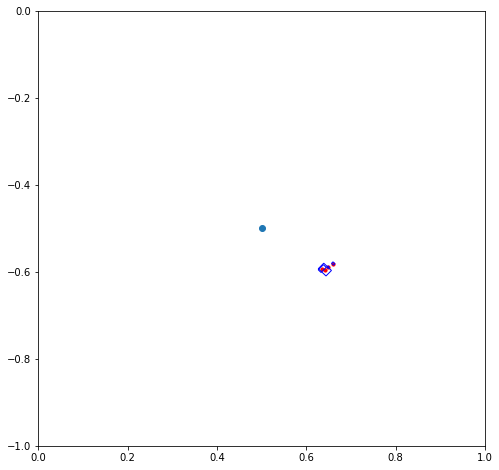

threshold : 0.3
Step : 114332  --  1651 Batch 9.819503 Targets =  30 Ratio = 0.3273167610168457 Threshold (0.2): 3
Step : 114332  --  1652 Batch 8.057978 Targets =  42 Ratio = 0.1918566113426572 Threshold (0.2): 6
Step : 114332  --  1653 Batch 9.5011 Targets =  27 Ratio = 0.3518925772772895 Threshold (0.2): 3
Step : 114332  --  1654 Batch 8.943812 Targets =  47 Ratio = 0.19029388021915516 Threshold (0.2): 4
Step : 114332  --  1655 Batch 11.278541 Targets =  42 Ratio = 0.268536681220645 Threshold (0.2): 4
Step : 114332  --  1656 Batch 9.714201 Targets =  32 Ratio = 0.3035687804222107 Threshold (0.2): 8
-> 0.0008
Step : 114333  --  1657 Batch 10.692854 Targets =  31 Ratio = 0.34493077185846144 Threshold (0.2): 3
Step : 114333  --  1658 Batch 11.514612 Targets =  21 Ratio = 0.5483148665655226 Threshold (0.2): 6
Step : 114333  --  1659 Batch 10.778613 Targets =  12 Ratio = 0.8982177575429281 Threshold (0.2): 3
Step : 114333  --  1660 Batch 9.374775 Targets =  95 Ratio = 0.09868184139854029

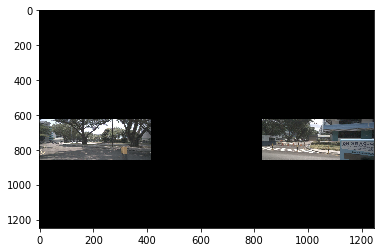

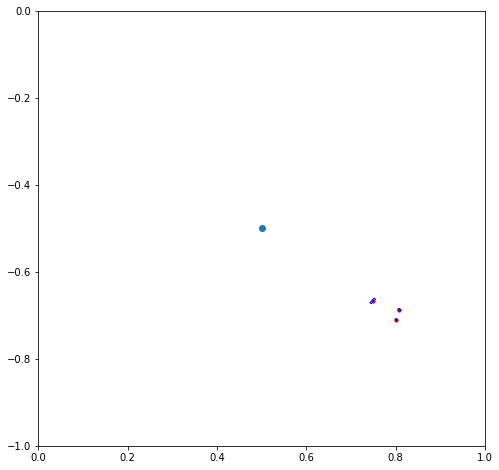

threshold : 0.3
Step : 114338  --  1701 Batch 11.32448 Targets =  34 Ratio = 0.3330729428459616 Threshold (0.2): 4
Step : 114338  --  1702 Batch 11.13896 Targets =  14 Ratio = 0.7956399917602539 Threshold (0.2): 5
Step : 114338  --  1703 Batch 14.494184 Targets =  48 Ratio = 0.30196215709050495 Threshold (0.2): 4
Step : 114338  --  1704 Batch 10.058036 Targets =  18 Ratio = 0.5587797694736056 Threshold (0.2): 6
-> 0.0008
Step : 114339  --  1705 Batch 13.896198 Targets =  19 Ratio = 0.731378856458162 Threshold (0.2): 8
Step : 114339  --  1706 Batch 15.307409 Targets =  25 Ratio = 0.612296371459961 Threshold (0.2): 1
Step : 114339  --  1707 Batch 10.427469 Targets =  29 Ratio = 0.3595679052944841 Threshold (0.2): 4
Step : 114339  --  1708 Batch 8.280766 Targets =  10 Ratio = 0.8280765533447265 Threshold (0.2): 5
Step : 114339  --  1709 Batch 8.300524 Targets =  55 Ratio = 0.15091861378062854 Threshold (0.2): 7
Step : 114339  --  1710 Batch 8.363174 Targets =  23 Ratio = 0.363616279933763

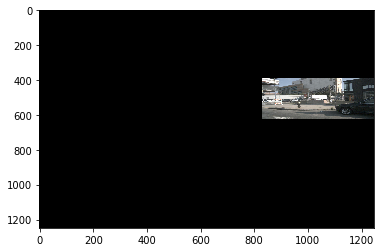

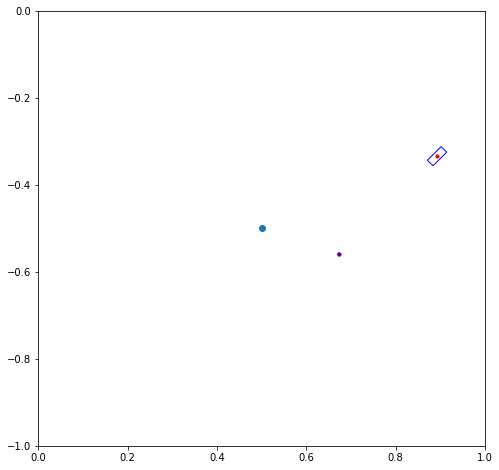

threshold : 0.3
Step : 114344  --  1751 Batch 11.171833 Targets =  51 Ratio = 0.219055549771178 Threshold (0.2): 5
Step : 114344  --  1752 Batch 15.03277 Targets =  29 Ratio = 0.5183713847193224 Threshold (0.2): 5
-> 0.0008
Step : 114345  --  1753 Batch 10.70319 Targets =  22 Ratio = 0.48650862953879614 Threshold (0.2): 2
Step : 114345  --  1754 Batch 9.681173 Targets =  18 Ratio = 0.5378429624769423 Threshold (0.2): 3
Step : 114345  --  1755 Batch 8.829953 Targets =  22 Ratio = 0.40136150880293414 Threshold (0.2): 5
Step : 114345  --  1756 Batch 10.523646 Targets =  11 Ratio = 0.9566951231522993 Threshold (0.2): 4
Step : 114345  --  1757 Batch 11.437856 Targets =  41 Ratio = 0.2789720907443907 Threshold (0.2): 5
Step : 114345  --  1758 Batch 10.088832 Targets =  39 Ratio = 0.2586879974756485 Threshold (0.2): 4
Step : 114345  --  1759 Batch 9.462068 Targets =  29 Ratio = 0.3262781932436187 Threshold (0.2): 5
Step : 114345  --  1760 Batch 14.253493 Targets =  49 Ratio = 0.29088761855144

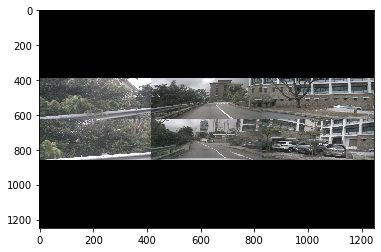

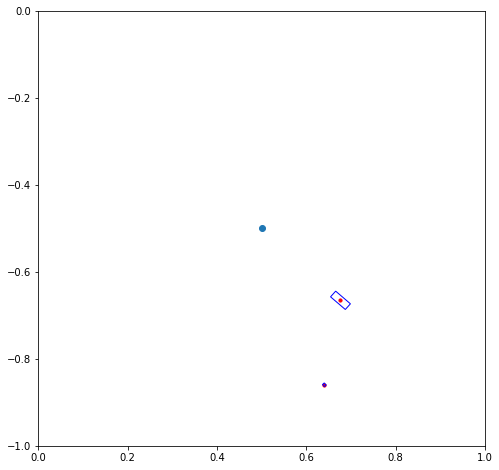

threshold : 0.3
Step : 114351  --  1801 Batch 9.062809 Targets =  26 Ratio = 0.348569576556866 Threshold (0.2): 4
Step : 114351  --  1802 Batch 8.980591 Targets =  17 Ratio = 0.5282700482536765 Threshold (0.2): 5
Step : 114351  --  1803 Batch 10.426558 Targets =  52 Ratio = 0.20051072194026068 Threshold (0.2): 4
Step : 114351  --  1804 Batch 12.778053 Targets =  33 Ratio = 0.3872137358694365 Threshold (0.2): 5
Step : 114351  --  1805 Batch 14.564676 Targets =  21 Ratio = 0.6935560135614305 Threshold (0.2): 5
Step : 114351  --  1806 Batch 11.275927 Targets =  12 Ratio = 0.9396605491638184 Threshold (0.2): 4
Step : 114351  --  1807 Batch 10.785755 Targets =  63 Ratio = 0.17120246281699528 Threshold (0.2): 3
Step : 114351  --  1808 Batch 10.039599 Targets =  37 Ratio = 0.27134052482811183 Threshold (0.2): 3
-> 0.0008
Step : 114352  --  1809 Batch 12.486947 Targets =  36 Ratio = 0.3468596405453152 Threshold (0.2): 5
Step : 114352  --  1810 Batch 9.419024 Targets =  11 Ratio = 0.85627495158

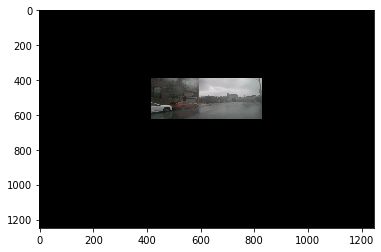

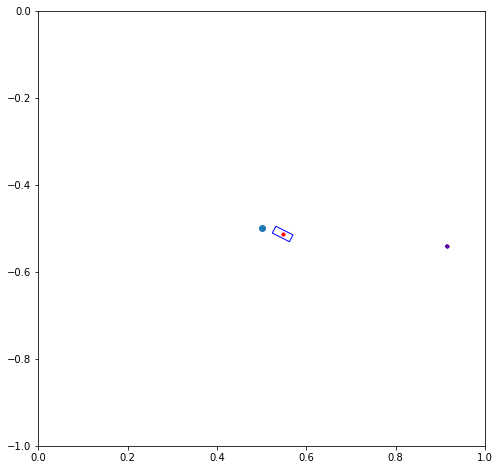

threshold : 0.3
Step : 114357  --  1851 Batch 6.865069 Targets =  20 Ratio = 0.3432534456253052 Threshold (0.2): 6
Step : 114357  --  1852 Batch 6.560791 Targets =  35 Ratio = 0.187451171875 Threshold (0.2): 4
Step : 114357  --  1853 Batch 9.187157 Targets =  80 Ratio = 0.11483945846557617 Threshold (0.2): 5
Step : 114357  --  1854 Batch 11.542507 Targets =  52 Ratio = 0.2219712917621319 Threshold (0.2): 6
Step : 114357  --  1855 Batch 7.1404448 Targets =  46 Ratio = 0.15522705990335214 Threshold (0.2): 2
Step : 114357  --  1856 Batch 5.167369 Targets =  12 Ratio = 0.43061407407124835 Threshold (0.2): 6
-> 0.0008
Step : 114358  --  1857 Batch 9.860129 Targets =  53 Ratio = 0.1860401765355524 Threshold (0.2): 1
Step : 114358  --  1858 Batch 10.216171 Targets =  51 Ratio = 0.20031708362055758 Threshold (0.2): 2
Step : 114358  --  1859 Batch 10.931703 Targets =  30 Ratio = 0.36439008712768556 Threshold (0.2): 3
Step : 114358  --  1860 Batch 8.348973 Targets =  34 Ratio = 0.245558037477381

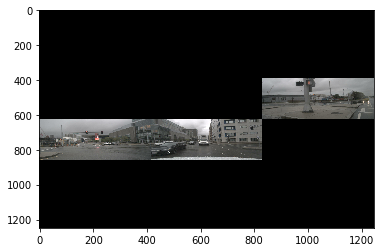

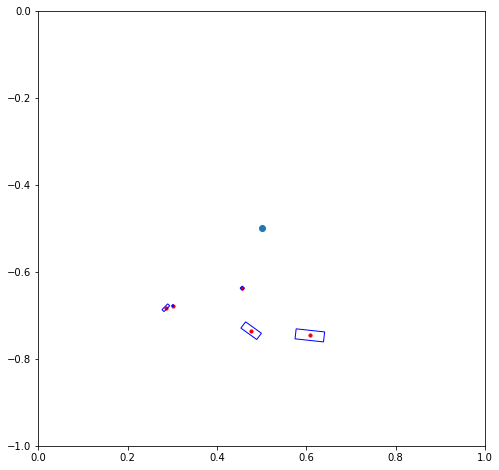

threshold : 0.3
Step : 114363  --  1901 Batch 8.594466 Targets =  31 Ratio = 0.27724084546489103 Threshold (0.2): 2
Step : 114363  --  1902 Batch 10.749004 Targets =  8 Ratio = 1.343625545501709 Threshold (0.2): 4
Step : 114363  --  1903 Batch 8.758526 Targets =  27 Ratio = 0.3243898462366175 Threshold (0.2): 9
Step : 114363  --  1904 Batch 9.990723 Targets =  58 Ratio = 0.17225383890086207 Threshold (0.2): 5
-> 0.0008
Step : 114364  --  1905 Batch 5.895799 Targets =  17 Ratio = 0.3468117152943331 Threshold (0.2): 2
Step : 114364  --  1906 Batch 11.987892 Targets =  71 Ratio = 0.16884355142082966 Threshold (0.2): 4
Step : 114364  --  1907 Batch 7.324252 Targets =  5 Ratio = 1.4648504257202148 Threshold (0.2): 4
Step : 114364  --  1908 Batch 9.311409 Targets =  32 Ratio = 0.2909815311431885 Threshold (0.2): 3
Step : 114364  --  1909 Batch 12.080051 Targets =  36 Ratio = 0.3355569839477539 Threshold (0.2): 4
Step : 114364  --  1910 Batch 10.31571 Targets =  21 Ratio = 0.4912242889404297 

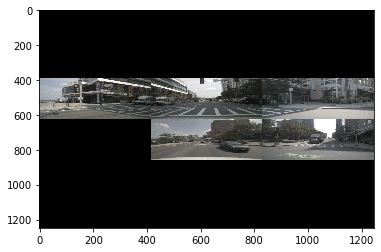

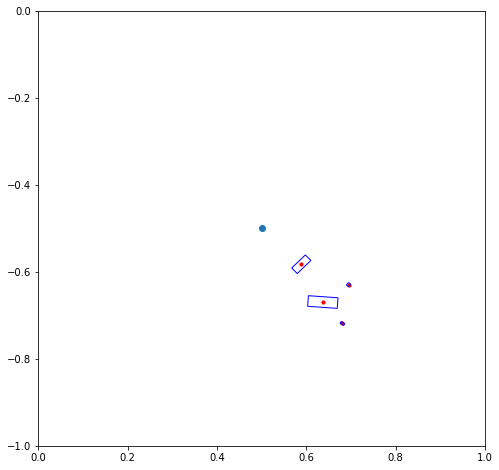

threshold : 0.3
Step : 114369  --  1951 Batch 10.026096 Targets =  38 Ratio = 0.26384464063142476 Threshold (0.2): 3
Step : 114369  --  1952 Batch 9.069682 Targets =  33 Ratio = 0.2748388521599047 Threshold (0.2): 4
-> 0.0008
Step : 114370  --  1953 Batch 9.925898 Targets =  50 Ratio = 0.19851795196533203 Threshold (0.2): 2
Step : 114370  --  1954 Batch 14.570392 Targets =  35 Ratio = 0.4162969044276646 Threshold (0.2): 2
Step : 114370  --  1955 Batch 9.574095 Targets =  32 Ratio = 0.2991904616355896 Threshold (0.2): 6
Step : 114370  --  1956 Batch 12.727287 Targets =  47 Ratio = 0.2707933466485206 Threshold (0.2): 2
Step : 114370  --  1957 Batch 8.884893 Targets =  32 Ratio = 0.27765291929244995 Threshold (0.2): 4
Step : 114370  --  1958 Batch 10.910202 Targets =  13 Ratio = 0.8392463097205529 Threshold (0.2): 4
Step : 114370  --  1959 Batch 10.928356 Targets =  3 Ratio = 3.642785390218099
Step : 114370  --  1960 Batch 11.6252 Targets =  62 Ratio = 0.18750323018720072 Threshold (0.2):

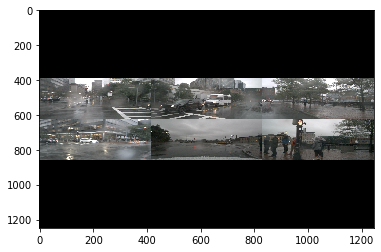

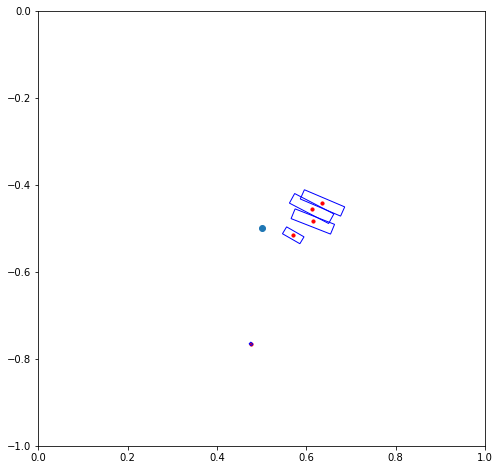

threshold : 0.3
Step : 114376  --  2001 Batch 9.2706785 Targets =  19 Ratio = 0.48793044843171773 Threshold (0.2): 8
Step : 114376  --  2002 Batch 10.8501835 Targets =  30 Ratio = 0.36167278289794924 Threshold (0.2): 6
Step : 114376  --  2003 Batch 8.468182 Targets =  29 Ratio = 0.29200626241749733 Threshold (0.2): 5
Step : 114376  --  2004 Batch 9.212788 Targets =  14 Ratio = 0.6580562591552734 Threshold (0.2): 4
Step : 114376  --  2005 Batch 11.790362 Targets =  12 Ratio = 0.9825301965077718 Threshold (0.2): 5
Step : 114376  --  2006 Batch 8.090425 Targets =  38 Ratio = 0.21290590888575503 Threshold (0.2): 6
Step : 114376  --  2007 Batch 12.071825 Targets =  71 Ratio = 0.17002570461219466 Threshold (0.2): 4
Step : 114376  --  2008 Batch 8.796776 Targets =  50 Ratio = 0.17593551635742188 Threshold (0.2): 3
-> 0.0008
Step : 114377  --  2009 Batch 7.942719 Targets =  90 Ratio = 0.08825243314107259 Threshold (0.2): 6
Step : 114377  --  2010 Batch 7.404524 Targets =  16 Ratio = 0.46278274

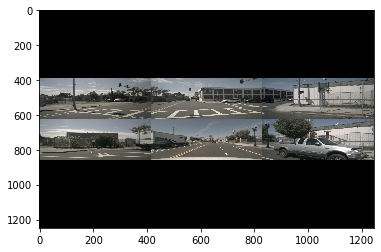

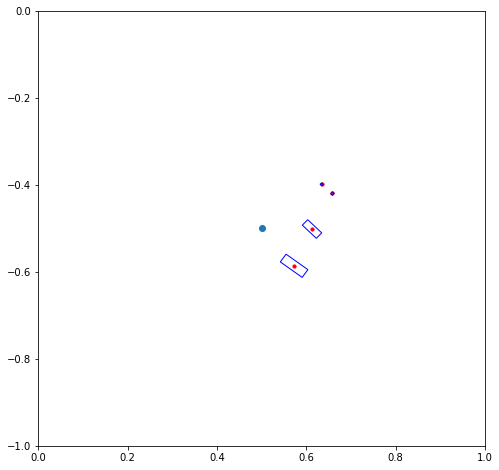

threshold : 0.3
Step : 114382  --  2051 Batch 9.49246 Targets =  15 Ratio = 0.6328306833902995 Threshold (0.2): 8
Step : 114382  --  2052 Batch 5.26818 Targets =  9 Ratio = 0.5853533214992948 Threshold (0.2): 6
Step : 114382  --  2053 Batch 8.299539 Targets =  31 Ratio = 0.26772705201179753 Threshold (0.2): 4
Step : 114382  --  2054 Batch 10.922705 Targets =  54 Ratio = 0.20227230919731987 Threshold (0.2): 5
Step : 114382  --  2055 Batch 7.6656837 Targets =  39 Ratio = 0.19655599349584335 Threshold (0.2): 4
Step : 114382  --  2056 Batch 9.455149 Targets =  26 Ratio = 0.3636595652653621 Threshold (0.2): 3
-> 0.0008
Step : 114383  --  2057 Batch 11.007505 Targets =  42 Ratio = 0.26208346230643137 Threshold (0.2): 5
Step : 114383  --  2058 Batch 6.8604493 Targets =  3 Ratio = 2.286816438039144 Threshold (0.2): 6
Step : 114383  --  2059 Batch 7.082645 Targets =  9 Ratio = 0.7869605488247342 Threshold (0.2): 5
Step : 114383  --  2060 Batch 8.667236 Targets =  35 Ratio = 0.24763532366071428 

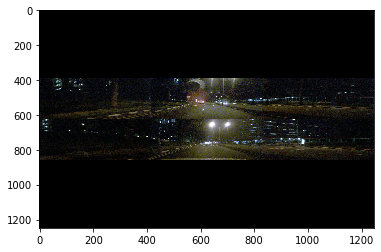

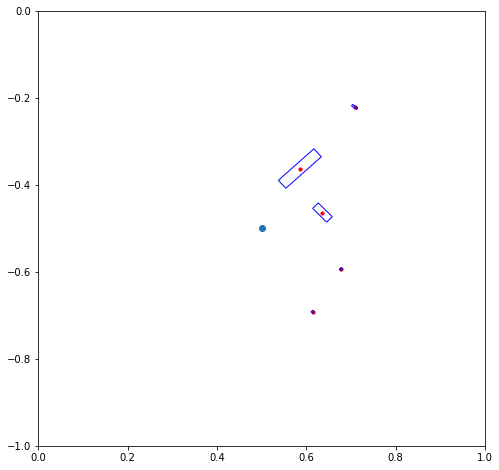

threshold : 0.3
Step : 114388  --  2101 Batch 10.049276 Targets =  36 Ratio = 0.27914656533135307 Threshold (0.2): 7
Step : 114388  --  2102 Batch 7.181816 Targets =  29 Ratio = 0.24764883107152477 Threshold (0.2): 7
Step : 114388  --  2103 Batch 8.744735 Targets =  23 Ratio = 0.3802058593086574 Threshold (0.2): 3
Step : 114388  --  2104 Batch 8.264904 Targets =  19 Ratio = 0.43499494853772613 Threshold (0.2): 7
-> 0.0008
Step : 114389  --  2105 Batch 9.113588 Targets =  29 Ratio = 0.3142616666596511 Threshold (0.2): 3
Step : 114389  --  2106 Batch 11.1980715 Targets =  35 Ratio = 0.3199448994227818 Threshold (0.2): 5
Step : 114389  --  2107 Batch 9.040897 Targets =  14 Ratio = 0.6457783835274833 Threshold (0.2): 6
Step : 114389  --  2108 Batch 12.541248 Targets =  43 Ratio = 0.2916569377100745 Threshold (0.2): 3
Step : 114389  --  2109 Batch 13.439798 Targets =  46 Ratio = 0.29216952945875085 Threshold (0.2): 5
Step : 114389  --  2110 Batch 5.9343834 Targets =  10 Ratio = 0.5934383392

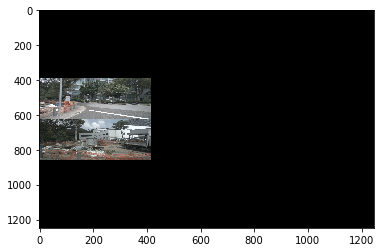

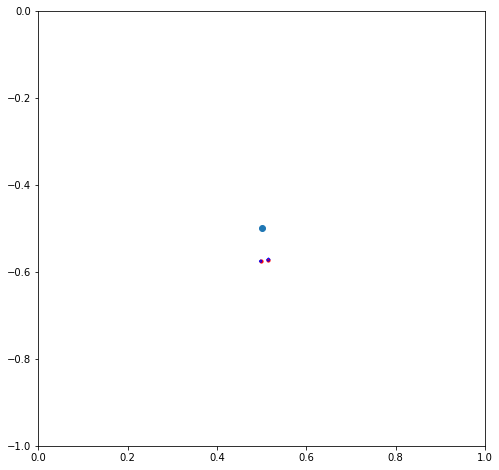

threshold : 0.3
Step : 114394  --  2151 Batch 8.971028 Targets =  46 Ratio = 0.19502235495525858 Threshold (0.2): 5
Step : 114394  --  2152 Batch 11.926868 Targets =  27 Ratio = 0.44173586810076676 Threshold (0.2): 6
-> 0.0008
Step : 114395  --  2153 Batch 11.668911 Targets =  39 Ratio = 0.29920284564678484 Threshold (0.2): 5
Step : 114395  --  2154 Batch 9.028124 Targets =  24 Ratio = 0.3761718273162842 Threshold (0.2): 4
Step : 114395  --  2155 Batch 12.013038 Targets =  53 Ratio = 0.22666108833169038 Threshold (0.2): 7
Step : 114395  --  2156 Batch 11.072395 Targets =  47 Ratio = 0.23558287924908577 Threshold (0.2): 5
Step : 114395  --  2157 Batch 11.074599 Targets =  25 Ratio = 0.44298397064208983 Threshold (0.2): 4
Step : 114395  --  2158 Batch 9.590836 Targets =  32 Ratio = 0.2997136116027832 Threshold (0.2): 5
Step : 114395  --  2159 Batch 12.9540415 Targets =  27 Ratio = 0.47977931411178026 Threshold (0.2): 4
Step : 114395  --  2160 Batch 9.897161 Targets =  16 Ratio = 0.618572

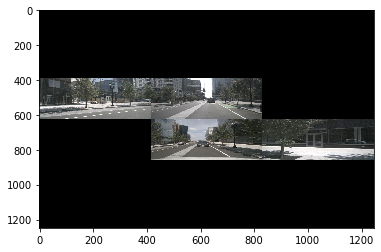

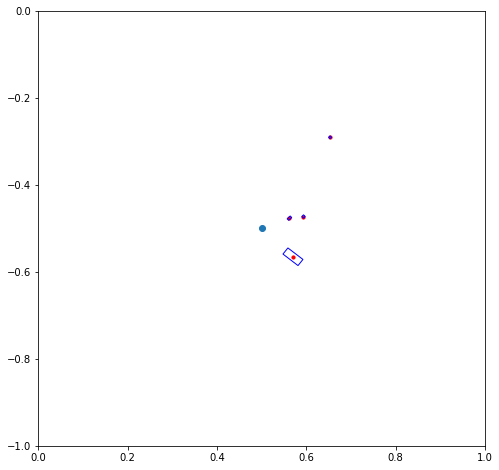

threshold : 0.3
Step : 114401  --  2201 Batch nan Targets =  0 Ratio = nan Threshold (0.2): 7
Step : 114401  --  2202 Batch 9.259068 Targets =  33 Ratio = 0.2805778041030421 Threshold (0.2): 6
Step : 114401  --  2203 Batch 8.769016 Targets =  10 Ratio = 0.8769016265869141 Threshold (0.2): 3
Step : 114401  --  2204 Batch 12.084169 Targets =  81 Ratio = 0.14918727639280718 Threshold (0.2): 4
Step : 114401  --  2205 Batch 10.839281 Targets =  9 Ratio = 1.2043645646837022
Step : 114401  --  2206 Batch 10.106697 Targets =  33 Ratio = 0.3062635479551373 Threshold (0.2): 2
Step : 114401  --  2207 Batch 9.6597 Targets =  39 Ratio = 0.24768462547889122 Threshold (0.2): 6
Step : 114401  --  2208 Batch 8.13368 Targets =  38 Ratio = 0.21404421956915604 Threshold (0.2): 2
-> 0.0008
Step : 114402  --  2209 Batch 8.863543 Targets =  115 Ratio = 0.07707428310228431 Threshold (0.2): 1
Step : 114402  --  2210 Batch 10.379219 Targets =  117 Ratio = 0.08871127397586138 Threshold (0.2): 3
Step : 114402  --

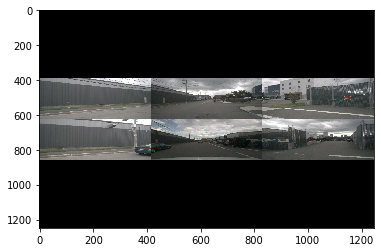

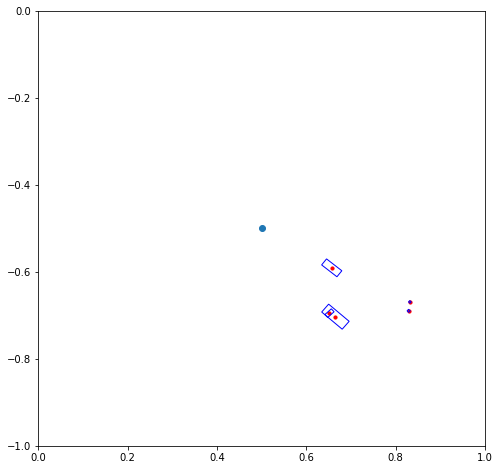

threshold : 0.3
Step : 114407  --  2251 Batch 8.231954 Targets =  31 Ratio = 0.2655468909971176 Threshold (0.2): 2
Step : 114407  --  2252 Batch 5.9792256 Targets =  10 Ratio = 0.5979225635528564 Threshold (0.2): 3
Step : 114407  --  2253 Batch 10.220872 Targets =  55 Ratio = 0.18583403500643644 Threshold (0.2): 4
Step : 114407  --  2254 Batch 8.976257 Targets =  34 Ratio = 0.264007568359375 Threshold (0.2): 6
Step : 114407  --  2255 Batch 10.039415 Targets =  56 Ratio = 0.1792752742767334 Threshold (0.2): 5
Step : 114407  --  2256 Batch 11.333859 Targets =  36 Ratio = 0.31482942899068195 Threshold (0.2): 3
-> 0.0008
Step : 114408  --  2257 Batch 7.5456696 Targets =  31 Ratio = 0.24340869534400203 Threshold (0.2): 6
Step : 114408  --  2258 Batch 8.258076 Targets =  30 Ratio = 0.2752691904703776 Threshold (0.2): 3
Step : 114408  --  2259 Batch 10.005661 Targets =  49 Ratio = 0.20419716348453443 Threshold (0.2): 4
Step : 114408  --  2260 Batch 10.382722 Targets =  24 Ratio = 0.4326134125

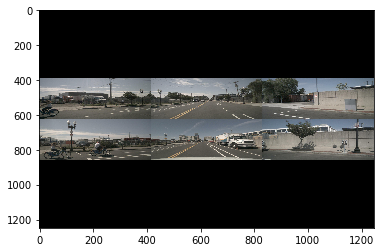

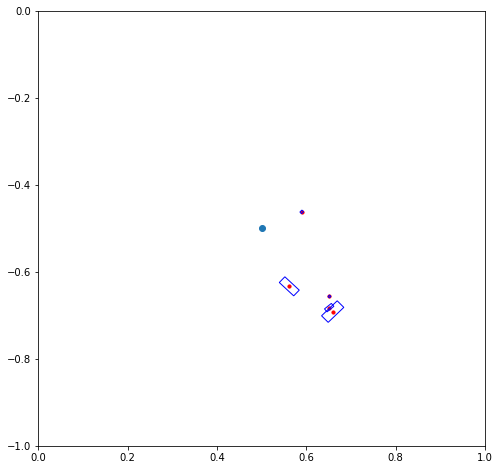

threshold : 0.3
Step : 114413  --  2301 Batch 7.5059624 Targets =  80 Ratio = 0.09382452964782714 Threshold (0.2): 4
Step : 114413  --  2302 Batch 9.742622 Targets =  63 Ratio = 0.1546447996109251 Threshold (0.2): 5
Step : 114413  --  2303 Batch 8.990773 Targets =  38 Ratio = 0.23659929476286234 Threshold (0.2): 5
Step : 114413  --  2304 Batch 10.666845 Targets =  33 Ratio = 0.32323773701985675 Threshold (0.2): 5
-> 0.0008
Step : 114414  --  2305 Batch 13.256893 Targets =  98 Ratio = 0.1352744199791733 Threshold (0.2): 6
Step : 114414  --  2306 Batch 9.794508 Targets =  52 Ratio = 0.1883559226989746 Threshold (0.2): 5
Step : 114414  --  2307 Batch 8.552182 Targets =  77 Ratio = 0.11106730126715325 Threshold (0.2): 4
Step : 114414  --  2308 Batch 13.440008 Targets =  29 Ratio = 0.4634485573604189 Threshold (0.2): 4
Step : 114414  --  2309 Batch 10.715979 Targets =  16 Ratio = 0.6697486639022827 Threshold (0.2): 3
Step : 114414  --  2310 Batch 7.608639 Targets =  52 Ratio = 0.14631997621

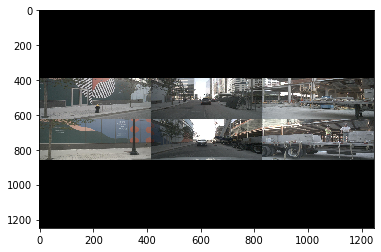

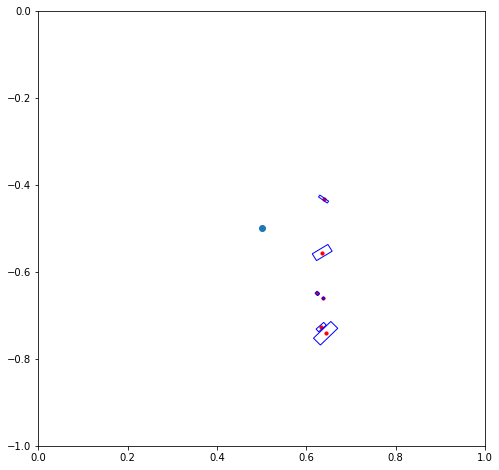

threshold : 0.3
Step : 114419  --  2351 Batch 10.460019 Targets =  29 Ratio = 0.36069031419425174 Threshold (0.2): 6
Step : 114419  --  2352 Batch 11.197235 Targets =  7 Ratio = 1.5996050153459822 Threshold (0.2): 6
-> 0.0008
Step : 114420  --  2353 Batch 9.540133 Targets =  23 Ratio = 0.414788412011188 Threshold (0.2): 7
Step : 114420  --  2354 Batch 12.087019 Targets =  28 Ratio = 0.43167924880981445 Threshold (0.2): 3
Step : 114420  --  2355 Batch 8.3637 Targets =  21 Ratio = 0.39827142442975727 Threshold (0.2): 5
Step : 114420  --  2356 Batch 14.36681 Targets =  31 Ratio = 0.4634454788700227 Threshold (0.2): 2
Step : 114420  --  2357 Batch 11.209349 Targets =  41 Ratio = 0.27339874825826505 Threshold (0.2): 6
Step : 114420  --  2358 Batch 9.77531 Targets =  27 Ratio = 0.3620485023215965 Threshold (0.2): 2
Step : 114420  --  2359 Batch 9.372415 Targets =  53 Ratio = 0.17683801111185327 Threshold (0.2): 5
Step : 114420  --  2360 Batch 9.640099 Targets =  17 Ratio = 0.5670646218692555

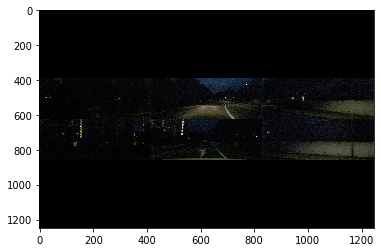

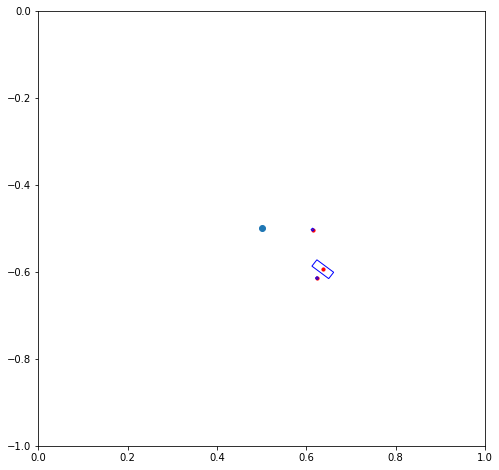

threshold : 0.3
Step : 114426  --  2401 Batch 11.451067 Targets =  29 Ratio = 0.3948643783043171 Threshold (0.2): 6
Step : 114426  --  2402 Batch 8.634933 Targets =  15 Ratio = 0.5756622314453125 Threshold (0.2): 3
Step : 114426  --  2403 Batch 11.943084 Targets =  28 Ratio = 0.42653870582580566 Threshold (0.2): 2
Step : 114426  --  2404 Batch 8.8220625 Targets =  15 Ratio = 0.5881374994913737 Threshold (0.2): 3
Step : 114426  --  2405 Batch 8.936485 Targets =  8 Ratio = 1.117060661315918 Threshold (0.2): 7
Step : 114426  --  2406 Batch 10.785709 Targets =  33 Ratio = 0.32683967821525806 Threshold (0.2): 5
Step : 114426  --  2407 Batch 11.515345 Targets =  34 Ratio = 0.33868660646326404 Threshold (0.2): 3
Step : 114426  --  2408 Batch 10.664889 Targets =  27 Ratio = 0.39499590131971574 Threshold (0.2): 5
-> 0.0008
Step : 114427  --  2409 Batch 14.211872 Targets =  55 Ratio = 0.25839767456054685 Threshold (0.2): 4
Step : 114427  --  2410 Batch 11.7851305 Targets =  30 Ratio = 0.39283768

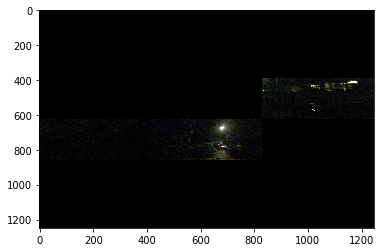

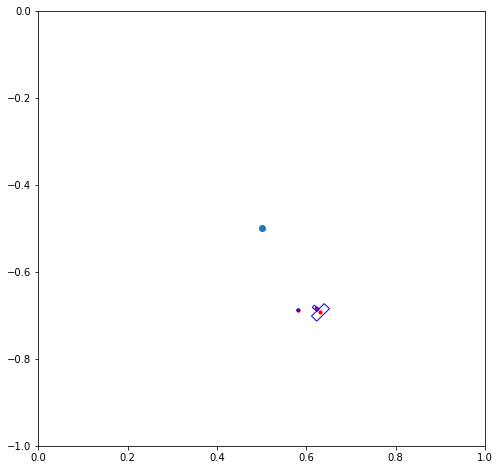

threshold : 0.3
Step : 114432  --  2451 Batch 9.672184 Targets =  66 Ratio = 0.1465482422799775 Threshold (0.2): 6
Step : 114432  --  2452 Batch 8.424254 Targets =  28 Ratio = 0.3008662291935512 Threshold (0.2): 3
Step : 114432  --  2453 Batch 7.3942575 Targets =  21 Ratio = 0.35210750216529485 Threshold (0.2): 7
Step : 114432  --  2454 Batch 8.388686 Targets =  35 Ratio = 0.23967674800327846 Threshold (0.2): 3
Step : 114432  --  2455 Batch 14.496286 Targets =  51 Ratio = 0.284240909651214 Threshold (0.2): 6
Step : 114432  --  2456 Batch 11.052031 Targets =  23 Ratio = 0.48052306797193445 Threshold (0.2): 3
-> 0.0008
Step : 114433  --  2457 Batch 8.650856 Targets =  25 Ratio = 0.34603424072265626 Threshold (0.2): 3
Step : 114433  --  2458 Batch 9.9303055 Targets =  31 Ratio = 0.32033243486958163 Threshold (0.2): 2
Step : 114433  --  2459 Batch 12.125845 Targets =  49 Ratio = 0.24746622358049666 Threshold (0.2): 2
Step : 114433  --  2460 Batch 8.446804 Targets =  32 Ratio = 0.2639626264

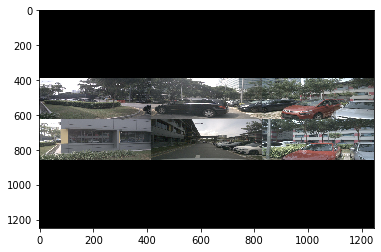

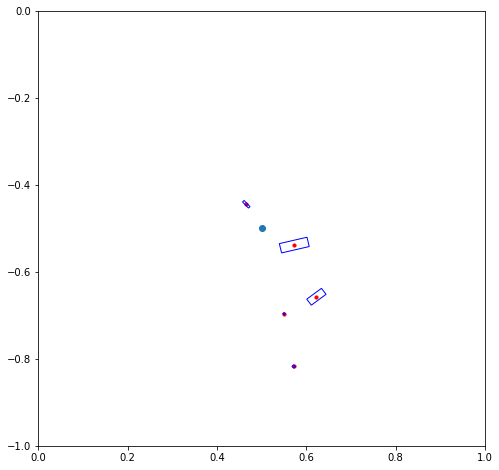

threshold : 0.3
Step : 114438  --  2501 Batch 8.234578 Targets =  13 Ratio = 0.6334290871253381 Threshold (0.2): 6
Step : 114438  --  2502 Batch 9.640435 Targets =  28 Ratio = 0.34430125781467985 Threshold (0.2): 8
Step : 114438  --  2503 Batch 6.5867434 Targets =  19 Ratio = 0.34667070288407176 Threshold (0.2): 8
Step : 114438  --  2504 Batch 11.205001 Targets =  32 Ratio = 0.3501562774181366 Threshold (0.2): 2
-> 0.0008
Step : 114439  --  2505 Batch 8.94455 Targets =  22 Ratio = 0.4065704345703125 Threshold (0.2): 3
Step : 114439  --  2506 Batch 8.828027 Targets =  16 Ratio = 0.5517516732215881 Threshold (0.2): 2
Step : 114439  --  2507 Batch 13.13888 Targets =  22 Ratio = 0.5972218080000444 Threshold (0.2): 5
Step : 114439  --  2508 Batch 7.006673 Targets =  17 Ratio = 0.41215722701128793 Threshold (0.2): 5
Step : 114439  --  2509 Batch 11.190395 Targets =  31 Ratio = 0.3609804953298261 Threshold (0.2): 6
Step : 114439  --  2510 Batch 12.533828 Targets =  43 Ratio = 0.29148436701574

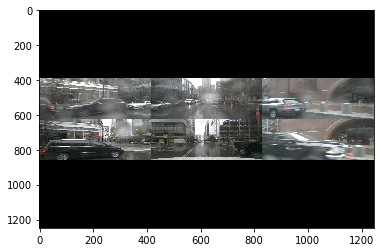

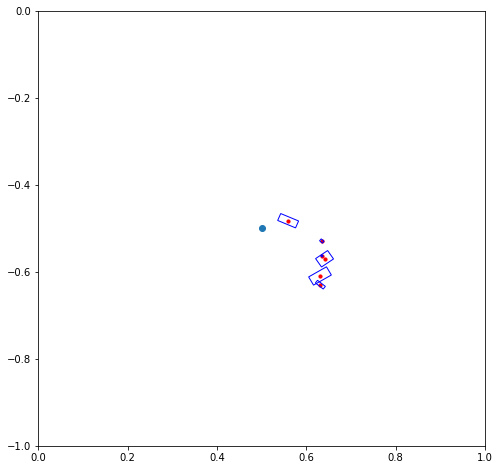

threshold : 0.3
Step : 114444  --  2551 Batch 10.552801 Targets =  39 Ratio = 0.2705846444154397 Threshold (0.2): 4
Step : 114444  --  2552 Batch 10.392872 Targets =  46 Ratio = 0.22593199688455332 Threshold (0.2): 6
-> 0.0008
Step : 114445  --  2553 Batch 7.510343 Targets =  17 Ratio = 0.4417848867528579 Threshold (0.2): 3
Step : 114445  --  2554 Batch 9.789843 Targets =  19 Ratio = 0.5152548739784643 Threshold (0.2): 6
Step : 114445  --  2555 Batch 9.300956 Targets =  13 Ratio = 0.715458136338454 Threshold (0.2): 4
Step : 114445  --  2556 Batch 17.748262 Targets =  38 Ratio = 0.4670595369840923 Threshold (0.2): 2
Step : 114445  --  2557 Batch 12.057232 Targets =  17 Ratio = 0.709248935475069 Threshold (0.2): 7
Step : 114445  --  2558 Batch 10.859005 Targets =  7 Ratio = 1.5512864249093192 Threshold (0.2): 3
Step : 114445  --  2559 Batch 8.285002 Targets =  38 Ratio = 0.21802636196738795 Threshold (0.2): 3
Step : 114445  --  2560 Batch 11.436948 Targets =  20 Ratio = 0.57184739112854 

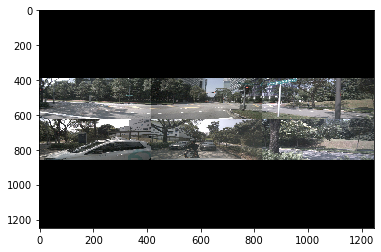

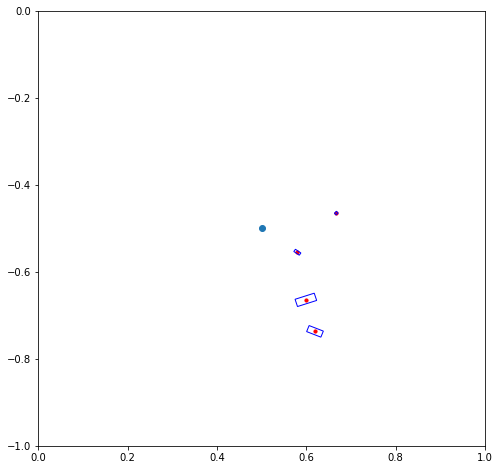

threshold : 0.3
Step : 114451  --  2601 Batch 9.029434 Targets =  22 Ratio = 0.4104288274591619 Threshold (0.2): 7
Step : 114451  --  2602 Batch 7.2903214 Targets =  15 Ratio = 0.48602142333984377 Threshold (0.2): 3
Step : 114451  --  2603 Batch 9.92793 Targets =  35 Ratio = 0.28365513937813897 Threshold (0.2): 5
Step : 114451  --  2604 Batch 10.691277 Targets =  42 Ratio = 0.254554203578404 Threshold (0.2): 3
Step : 114451  --  2605 Batch 8.919491 Targets =  14 Ratio = 0.6371064867292132 Threshold (0.2): 4
Step : 114451  --  2606 Batch 8.610363 Targets =  23 Ratio = 0.374363608982252 Threshold (0.2): 5
Step : 114451  --  2607 Batch 11.532404 Targets =  73 Ratio = 0.1579781362455185 Threshold (0.2): 4
Step : 114451  --  2608 Batch 11.695221 Targets =  3 Ratio = 3.898406982421875 Threshold (0.2): 5
-> 0.0008
Step : 114452  --  2609 Batch 8.876912 Targets =  19 Ratio = 0.4672059008949681 Threshold (0.2): 3
Step : 114452  --  2610 Batch 9.482163 Targets =  18 Ratio = 0.5267868571811252 Th

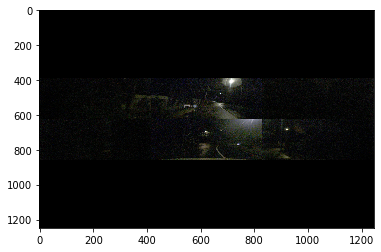

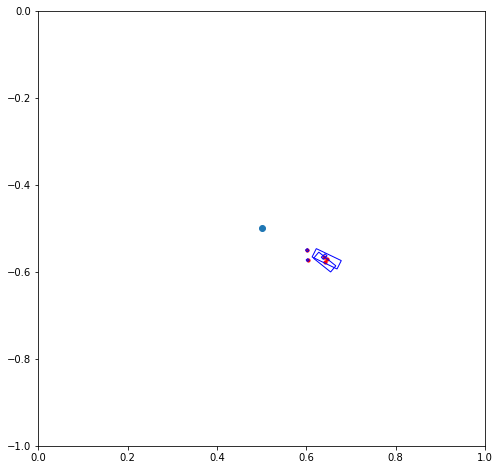

threshold : 0.3
Step : 114457  --  2651 Batch 8.320749 Targets =  25 Ratio = 0.3328299713134766 Threshold (0.2): 3
Step : 114457  --  2652 Batch 15.149031 Targets =  33 Ratio = 0.4590615359219638 Threshold (0.2): 4
Step : 114457  --  2653 Batch 8.35098 Targets =  21 Ratio = 0.3976657049996512 Threshold (0.2): 6
Step : 114457  --  2654 Batch 13.931459 Targets =  25 Ratio = 0.5572583770751953 Threshold (0.2): 3
Step : 114457  --  2655 Batch 10.303202 Targets =  32 Ratio = 0.32197505235671997 Threshold (0.2): 3
Step : 114457  --  2656 Batch 9.056229 Targets =  25 Ratio = 0.3622491455078125 Threshold (0.2): 3
-> 0.0008
Step : 114458  --  2657 Batch 8.181467 Targets =  19 Ratio = 0.43060352927760076 Threshold (0.2): 4
Step : 114458  --  2658 Batch 7.2619705 Targets =  18 Ratio = 0.40344280666775173 Threshold (0.2): 6
Step : 114458  --  2659 Batch 8.997588 Targets =  25 Ratio = 0.35990352630615235 Threshold (0.2): 4
Step : 114458  --  2660 Batch 12.594448 Targets =  66 Ratio = 0.190824971054

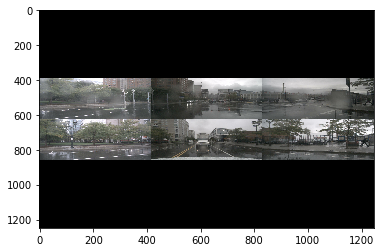

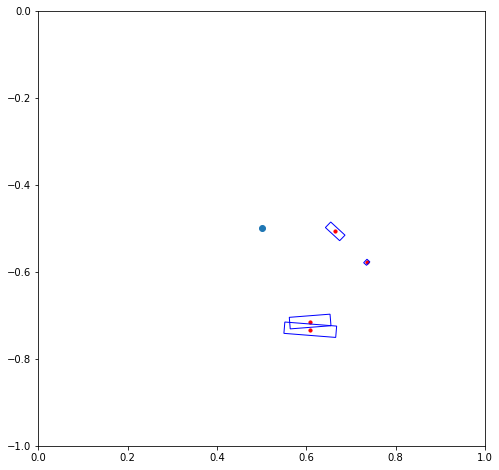

threshold : 0.3
Step : 114463  --  2701 Batch 9.8975525 Targets =  40 Ratio = 0.24743881225585937 Threshold (0.2): 5
Step : 114463  --  2702 Batch 12.803941 Targets =  51 Ratio = 0.2510576622158873 Threshold (0.2): 4
Step : 114463  --  2703 Batch 7.3080425 Targets =  15 Ratio = 0.4872028350830078 Threshold (0.2): 5
Step : 114463  --  2704 Batch 8.859125 Targets =  6 Ratio = 1.4765208562215169 Threshold (0.2): 5
-> 0.0008
Step : 114464  --  2705 Batch 11.809607 Targets =  12 Ratio = 0.9841338793436686 Threshold (0.2): 5
Step : 114464  --  2706 Batch 8.613647 Targets =  50 Ratio = 0.17227294921875 Threshold (0.2): 1
Step : 114464  --  2707 Batch 10.74107 Targets =  21 Ratio = 0.5114795139857701 Threshold (0.2): 3
Step : 114464  --  2708 Batch 8.20571 Targets =  15 Ratio = 0.5470473607381184 Threshold (0.2): 3
Step : 114464  --  2709 Batch 7.7857633 Targets =  10 Ratio = 0.7785763263702392
Step : 114464  --  2710 Batch 12.988146 Targets =  51 Ratio = 0.2546695260440602 Threshold (0.2): 4


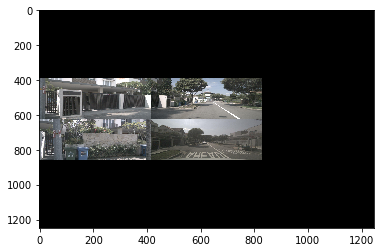

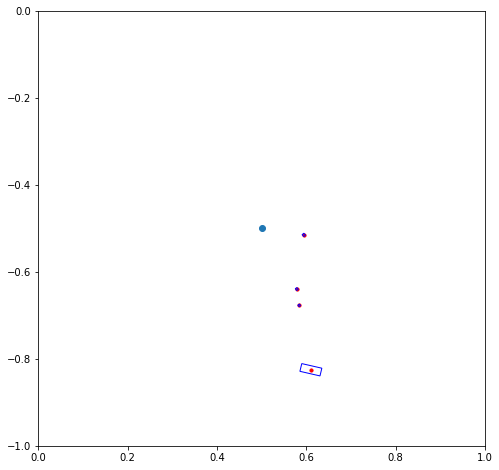

threshold : 0.3
Step : 114469  --  2751 Batch 11.278655 Targets =  25 Ratio = 0.45114620208740236 Threshold (0.2): 3
Step : 114469  --  2752 Batch 6.249076 Targets =  2 Ratio = 3.124537944793701 Threshold (0.2): 6
-> 0.0008
Step : 114470  --  2753 Batch 11.457091 Targets =  34 Ratio = 0.33697327445535097 Threshold (0.2): 7
Step : 114470  --  2754 Batch 10.254682 Targets =  15 Ratio = 0.6836454391479492 Threshold (0.2): 4
Step : 114470  --  2755 Batch 10.137978 Targets =  37 Ratio = 0.27399939459723394 Threshold (0.2): 4
Step : 114470  --  2756 Batch 8.66983 Targets =  33 Ratio = 0.2627221309777462 Threshold (0.2): 6
Step : 114470  --  2757 Batch 9.625307 Targets =  72 Ratio = 0.13368482059902614 Threshold (0.2): 5
Step : 114470  --  2758 Batch 6.3719196 Targets =  15 Ratio = 0.42479464213053386 Threshold (0.2): 9
Step : 114470  --  2759 Batch 7.1664014 Targets =  13 Ratio = 0.5512616450969989 Threshold (0.2): 7
Step : 114470  --  2760 Batch 7.887208 Targets =  18 Ratio = 0.438178221384

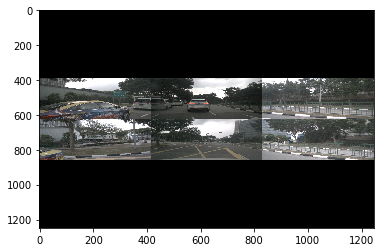

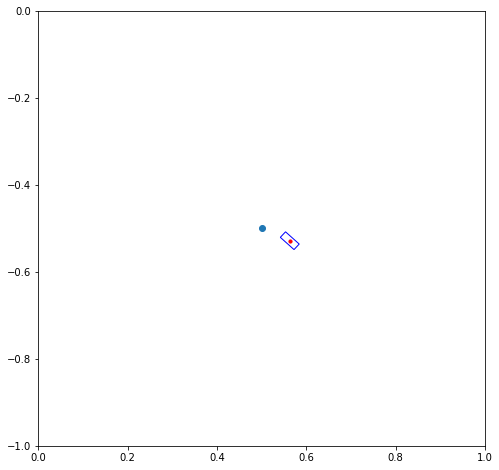

threshold : 0.3
Step : 114476  --  2801 Batch 9.708469 Targets =  29 Ratio = 0.3347748065816945 Threshold (0.2): 6
Step : 114476  --  2802 Batch 9.355785 Targets =  57 Ratio = 0.16413658543636925 Threshold (0.2): 2
Step : 114476  --  2803 Batch 8.999911 Targets =  24 Ratio = 0.3749963045120239 Threshold (0.2): 4
Step : 114476  --  2804 Batch 9.543042 Targets =  47 Ratio = 0.2030434507004758 Threshold (0.2): 1
Step : 114476  --  2805 Batch 10.62609 Targets =  26 Ratio = 0.40869577114398664 Threshold (0.2): 5
Step : 114476  --  2806 Batch 10.50655 Targets =  35 Ratio = 0.3001871381487165 Threshold (0.2): 7
Step : 114476  --  2807 Batch 9.011042 Targets =  45 Ratio = 0.20024536980523003 Threshold (0.2): 6
Step : 114476  --  2808 Batch 12.417221 Targets =  29 Ratio = 0.428180036873653 Threshold (0.2): 4
-> 0.0008
Step : 114477  --  2809 Batch 10.8699045 Targets =  16 Ratio = 0.6793690323829651 Threshold (0.2): 4
Step : 114477  --  2810 Batch 12.177193 Targets =  16 Ratio = 0.76107454299926

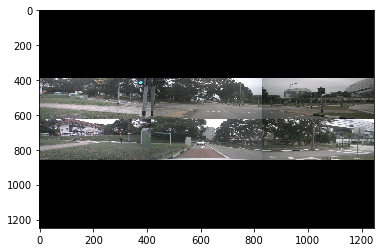

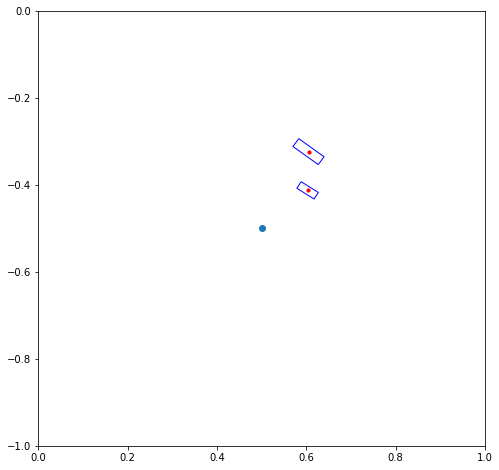

threshold : 0.3
Step : 114482  --  2851 Batch 7.4528723 Targets =  41 Ratio = 0.181777372592833 Threshold (0.2): 5
Step : 114482  --  2852 Batch 10.180554 Targets =  26 Ratio = 0.39155978422898513 Threshold (0.2): 7
Step : 114482  --  2853 Batch 9.084946 Targets =  49 Ratio = 0.18540705466757015 Threshold (0.2): 1
Step : 114482  --  2854 Batch 9.193619 Targets =  21 Ratio = 0.43779137021019343 Threshold (0.2): 2
Step : 114482  --  2855 Batch 10.373238 Targets =  53 Ratio = 0.19572146433704304 Threshold (0.2): 7
Step : 114482  --  2856 Batch 11.250793 Targets =  47 Ratio = 0.23937858419215424 Threshold (0.2): 3
-> 0.0008
Step : 114483  --  2857 Batch 8.411479 Targets =  23 Ratio = 0.3657164780989937 Threshold (0.2): 6
Step : 114483  --  2858 Batch 8.667751 Targets =  29 Ratio = 0.29888797628468483 Threshold (0.2): 6
Step : 114483  --  2859 Batch 15.446709 Targets =  26 Ratio = 0.5941041799692007 Threshold (0.2): 2
Step : 114483  --  2860 Batch 9.360885 Targets =  33 Ratio = 0.2836631717

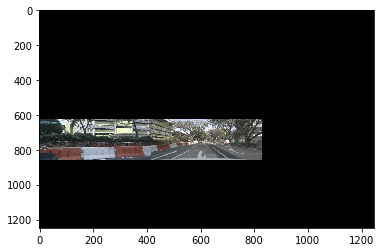

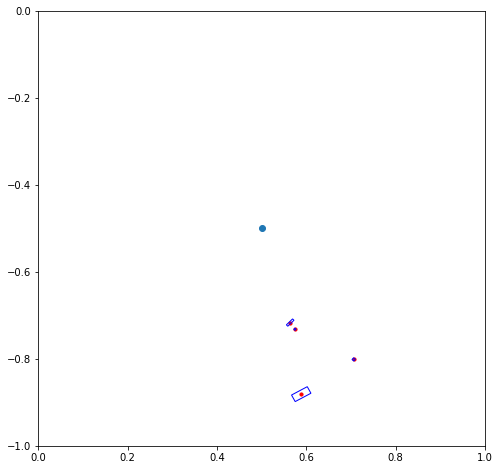

threshold : 0.3
Step : 114488  --  2901 Batch 9.983826 Targets =  33 Ratio = 0.30254017223011365 Threshold (0.2): 5
Step : 114488  --  2902 Batch 10.71351 Targets =  42 Ratio = 0.2550835609436035 Threshold (0.2): 5
Step : 114488  --  2903 Batch 8.66537 Targets =  16 Ratio = 0.5415856242179871 Threshold (0.2): 3
Step : 114488  --  2904 Batch 10.181394 Targets =  40 Ratio = 0.25453484058380127 Threshold (0.2): 4
-> 0.0008
Step : 114489  --  2905 Batch 7.527666 Targets =  27 Ratio = 0.27880244784884983 Threshold (0.2): 7
Step : 114489  --  2906 Batch 9.017171 Targets =  32 Ratio = 0.28178659081459045 Threshold (0.2): 9
Step : 114489  --  2907 Batch 12.684425 Targets =  47 Ratio = 0.2698813905107214 Threshold (0.2): 2
Step : 114489  --  2908 Batch 12.775064 Targets =  32 Ratio = 0.3992207646369934 Threshold (0.2): 2
Step : 114489  --  2909 Batch 10.6678295 Targets =  26 Ratio = 0.41030113513653094 Threshold (0.2): 2
Step : 114489  --  2910 Batch 8.089069 Targets =  25 Ratio = 0.32356277465

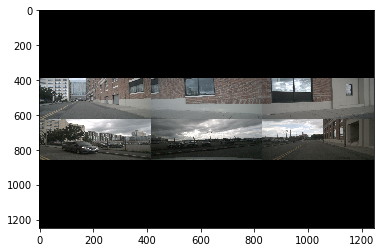

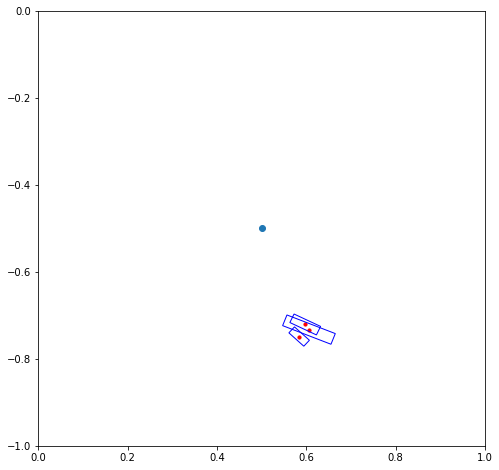

threshold : 0.3
Step : 114494  --  2951 Batch 7.8677177 Targets =  26 Ratio = 0.3026045285738431 Threshold (0.2): 5
Step : 114494  --  2952 Batch 8.052647 Targets =  26 Ratio = 0.30971717834472656 Threshold (0.2): 2
-> 0.0008
Step : 114495  --  2953 Batch 11.800547 Targets =  18 Ratio = 0.6555859247843424 Threshold (0.2): 5
Step : 114495  --  2954 Batch 11.567604 Targets =  55 Ratio = 0.21032007390802557 Threshold (0.2): 4
Step : 114495  --  2955 Batch 10.0869 Targets =  57 Ratio = 0.17696315363833778 Threshold (0.2): 5
Step : 114495  --  2956 Batch 11.351988 Targets =  71 Ratio = 0.15988715265838194 Threshold (0.2): 4
Step : 114495  --  2957 Batch 12.712589 Targets =  21 Ratio = 0.6053613935198102 Threshold (0.2): 4
Step : 114495  --  2958 Batch 6.4455194 Targets =  23 Ratio = 0.28023997597072436 Threshold (0.2): 5
Step : 114495  --  2959 Batch 16.281864 Targets =  44 Ratio = 0.3700423674149947 Threshold (0.2): 5
Step : 114495  --  2960 Batch 13.494804 Targets =  50 Ratio = 0.26989608

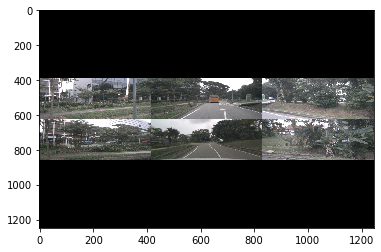

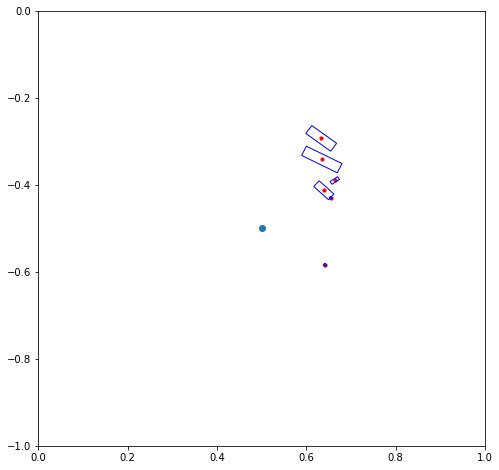

threshold : 0.3
Step : 114501  --  3001 Batch 12.258932 Targets =  37 Ratio = 0.3313224895580395 Threshold (0.2): 2
Step : 114501  --  3002 Batch 9.118878 Targets =  36 Ratio = 0.2533021767934163 Threshold (0.2): 2
Step : 114501  --  3003 Batch 8.573015 Targets =  23 Ratio = 0.3727397918701172 Threshold (0.2): 3
Step : 114501  --  3004 Batch 7.4061394 Targets =  12 Ratio = 0.6171782811482748
Step : 114501  --  3005 Batch 10.231248 Targets =  40 Ratio = 0.2557811975479126 Threshold (0.2): 3
Step : 114501  --  3006 Batch 7.854434 Targets =  17 Ratio = 0.46202553019804116 Threshold (0.2): 8
Step : 114501  --  3007 Batch 9.952778 Targets =  43 Ratio = 0.23145995029183322 Threshold (0.2): 7
Step : 114501  --  3008 Batch 8.789829 Targets =  12 Ratio = 0.7324857711791992 Threshold (0.2): 8
-> 0.0008
Step : 114502  --  3009 Batch 8.931854 Targets =  9 Ratio = 0.9924282497829862 Threshold (0.2): 5
Step : 114502  --  3010 Batch 10.468994 Targets =  70 Ratio = 0.14955705915178572 Threshold (0.2):

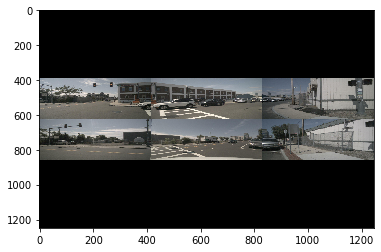

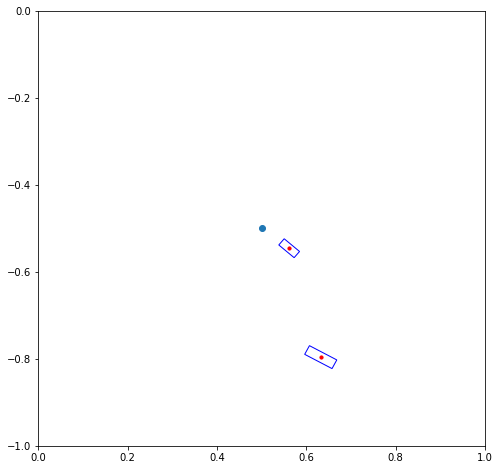

threshold : 0.3


KeyboardInterrupt: ignored

In [20]:
import tqdm
import json

#
if os.path.exists("checkpoints/step.json"):
  with open('checkpoints/step.json') as f:
    data = json.load(f)
  step = data['step']
else:
  step = 0
for epoch in tqdm.notebook.tqdm(range(opt.epochs),unit='epoch'):
    model.train()
    for batch_i, (imgs, targets) in enumerate(dataloader):
        batches_done = len(dataloader) * epoch + batch_i
        
        imgs = Variable(imgs.to(device))
        targets = Variable(targets.to(device), requires_grad=False)

        loss, outputs = model(imgs, targets)
        loss.backward()
        loss = loss.cpu().detach().numpy()

        try:
          print("Step :",step," -- ",batch_i,"Batch",loss,"Targets = ",targets.shape[0],"Ratio =",loss/targets.shape[0],"Threshold (0.2):", len(non_max_suppression(outputs,conf_thres = 0.2,nms_thres=0.5)[0]))
        except:
          print("Step :",step," -- ",batch_i,"Batch",loss,"Targets = ",targets.shape[0],"Ratio =",loss/targets.shape[0])
          
        if batches_done % opt.gradient_accumulations == 0 and batches_done != 0:
            # Accumulates gradient before each step
            optimizer.step()
            optimizer.zero_grad()
            print("->",optimizer.param_groups[0]['lr'])
            step += 1
            steps ={'step':step}
            if step == 400000:
              optimizer.param_groups[0]['lr'] = 0.0001
            elif step ==  450000 :
              optimizer.param_groups[0]['lr'] = 0.00001

        
        if batch_i % opt.checkpoint_interval == 0 and batch_i != 0:
            torch.save(model.state_dict(), "checkpoints/aws-2.pth")
            with open("checkpoints/step.json",'w+') as f:
              json.dump(steps,f)
            print("Saved")
            plt.imshow(  imgs[0].cpu().permute(1, 2, 0) , aspect = 'auto' )
            try:
                out = non_max_suppression(outputs,conf_thres = 0.3,nms_thres=0.5)
                out[0][:,:2] /=1024
                out[0][:,3:5] /=1024
                draw(out[0])
                print("threshold :",0.3)
            except:
                try:
                    out = non_max_suppression(outputs,conf_thres = 0.2,nms_thres=0.5)
                    out[0][:,:2] /=1024
                    out[0][:,3:5] /=1024
                    draw(out[0])
                    print("threshold :",0.2)
                except:
                  print("Nothing !!!!")

        del imgs,targets,outputs,loss
        torch.cuda.empty_cache()

        
    if epoch % opt.evaluation_interval == 0 and epoch != 0:
        print("\n---- Evaluating Model ----")
        # Evaluate the model on the validation set
        precision, recall, AP, f1, ap_class = evaluate(
            model,
            test_samples,
            iou_thres=0.5,
            conf_thres=0.5,
            nms_thres=0.5,
            img_size=opt.img_size,
            batch_size=2,
        )
        evaluation_metrics = [
            ("val_precision", precision.mean()),
            ("val_recall", recall.mean()),
            ("val_mAP", AP.mean()),
            ("val_f1", f1.mean()),
        ]
        #logger.list_of_scalars_summary(evaluation_metrics, epoch)

        # Print class APs and mAP
        ap_table = [["Index", "Class name", "AP"]]
        for i, c in enumerate(ap_class):
            ap_table += [[c, class_names[c], "%.5f" % AP[i]]]
        print(AsciiTable(ap_table).table)
        print(f"---- mAP {AP.mean()}")


In [21]:
x = torch.LongTensor(0)
print(x.shape)

torch.Size([0])


In [ ]:
precision, recall, AP, f1, ap_class = evaluate(
    model,
    test_samples,
    iou_thres=0.5,
    conf_thres=0.5,
    nms_thres=0.5, 
    img_size=opt.img_size,
    batch_size=2,
)
evaluation_metrics = [
    ("val_precision", precision.mean()),
    ("val_recall", recall.mean()),
    ("val_mAP", AP.mean()),
    ("val_f1", f1.mean()),
]
#logger.list_of_scalars_summary(evaluation_metrics, epoch)

# Print class APs and mAP
ap_table = [["Index", "Class name", "AP"]]
for i, c in enumerate(ap_class):
    ap_table += [[c, class_names[c], "%.5f" % AP[i]]]
print(AsciiTable(ap_table).table)
print(f"---- mAP {AP.mean()}")

In [ ]:
for param_group in optimizer.param_groups:
  print(param_group['lr'])

In [ ]:
torch.save(model.state_dict(), f"checkpoint/yolov3_sample-6.pth")

In [ ]:
model.load_state_dict(torch.load(f"checkpoint/yolov3_sample.pth"))

In [22]:
img, tragets = next(iter(dataloader))
img = Variable(img.to(device))
model.eval()
target = []
for t in tragets:
  print(t)
  if t[0] == 0:
    target.append(t[2:])
out = model(img)
out = non_max_suppression(out,conf_thres = 0.3,nms_thres = 0.5)
out[0][:,:2] /=1024
out[0][:,3:5] /=1024
#print(loss)
draw(target)
print(target)
print(out[0])

tensor([0.0000e+00, 8.0000e+00, 4.0740e-01, 6.7921e-01, 1.6060e-01, 1.3314e-02,
        3.2571e-02, 3.1160e-01, 4.9721e-01, 7.7733e-06])
tensor([0.0000e+00, 1.8000e+01, 5.7665e-01, 5.7776e-01, 1.5440e-01, 1.6714e-02,
        1.6214e-03, 2.0240e-01, 9.9997e-01, 5.0518e-01])
tensor([0.0000e+00, 1.8000e+01, 5.7690e-01, 7.5137e-01, 2.5320e-01, 1.6629e-02,
        1.7429e-03, 2.2780e-01, 9.9997e-01, 5.0518e-01])
tensor([0.0000e+00, 1.9000e+01, 5.6427e-01, 4.8481e-01, 5.1600e-02, 3.3143e-03,
        3.2214e-03, 2.5380e-01, 5.1344e-01, 9.9982e-01])
tensor([0.0000, 0.0000, 0.5723, 0.2089, 0.1822, 0.0048, 0.0049, 0.3388, 0.5950,
        0.0091])
tensor([0.0000e+00, 1.9000e+01, 5.7824e-01, 5.1492e-01, 1.5940e-01, 2.5071e-03,
        2.5357e-03, 2.5520e-01, 4.9870e-01, 1.0000e+00])
tensor([0.0000e+00, 1.9000e+01, 5.9389e-01, 5.1223e-01, 1.9300e-01, 2.7214e-03,
        2.7214e-03, 2.4720e-01, 1.6869e-03, 4.5896e-01])
tensor([0.0000e+00, 1.0000e+01, 3.5588e-01, 3.2704e-01, 1.1400e-02, 4.5714e-03,
 

RuntimeError: ignored

In [ ]:
print(tragets.size())

In [ ]:
plt.imshow(  img[0].cpu().permute(1, 2, 0)  )

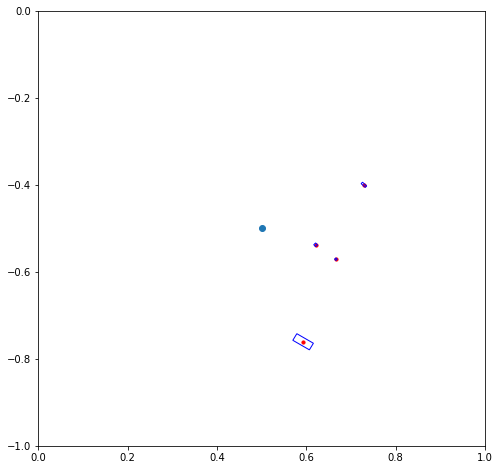

4


In [23]:
draw(out[0])
print(len(out[0]))

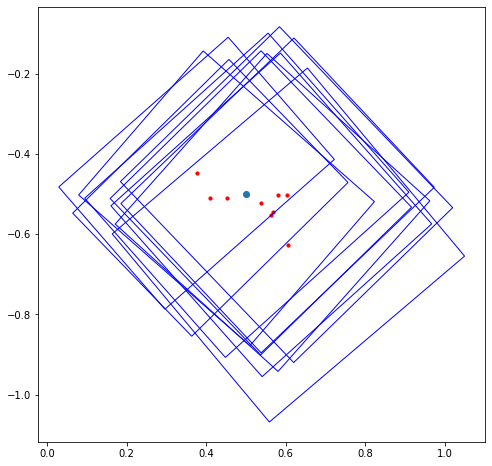

In [ ]:
draw(out[0])

In [26]:
!mv "singledepthyolo(leastnoparameters-starting).pth" checkpoints/

#Testing (Nuscene's Basics)

In [ ]:
classes = nusc.get('category',)

In [ ]:
model.eval()

Darknet(
  (module_list): ModuleList(
    (0): Sequential(
      (conv_0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batch_norm_0): BatchNorm2d(32, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
      (leaky_0): LeakyReLU(negative_slope=0.1)
    )
    (1): Sequential(
      (conv_1): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (batch_norm_1): BatchNorm2d(64, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
      (leaky_1): LeakyReLU(negative_slope=0.1)
    )
    (2): Sequential(
      (conv_2): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (batch_norm_2): BatchNorm2d(32, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
      (leaky_2): LeakyReLU(negative_slope=0.1)
    )
    (3): Sequential(
      (conv_3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batch_norm_3): BatchNorm2d(64, eps=1e-05, momen

In [ ]:
img, label = next(iter(dataloader))
print(img.shape)

torch.Size([2, 3, 1184, 1184])


In [ ]:
loss, out = model(img.to(device),label.to(device))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:217: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /pytorch/aten/src/ATen/native/IndexingUtils.h:25.)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:218: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /pytorch/aten/src/ATen/native/IndexingUtils.h:25.)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:219: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /pytorch/aten/src/ATen/native/IndexingUtils.h:25.)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:220: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /pytorch/aten/src/ATen/native/IndexingUtils.h:25.)
/usr/local/lib/p

In [ ]:
print(non_max_suppression(out.to(device))[1].shape)

torch.Size([8, 11])


In [ ]:
print(out.shape)

torch.Size([2, 86247, 32])


In [ ]:
del imgs,targets,out,loss
torch.cuda.empty_cache()

In [ ]:
print(label[:,2].max())

tensor(0.8393)


In [ ]:
print(label[:,2].max())

tensor(1982.4609)


In [ ]:
%matplotlib inline
from nuscenes.nuscenes import NuScenes 

nusc = NuScenes(version='v1.0-mini', dataroot='drive/My Drive/data', verbose=True)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 1.387 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


In [ ]:
scene = nusc.scene[0]
scene

{'description': 'Parked truck, construction, intersection, turn left, following a van',
 'first_sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'last_sample_token': 'ed5fc18c31904f96a8f0dbb99ff069c0',
 'log_token': '7e25a2c8ea1f41c5b0da1e69ecfa71a2',
 'name': 'scene-0061',
 'nbr_samples': 39,
 'token': 'cc8c0bf57f984915a77078b10eb33198'}

In [ ]:
sample_token = scene['first_sample_token']
sample = nusc.get('sample',sample_token)
sample

{'anns': ['ef63a697930c4b20a6b9791f423351da',
  '6b89da9bf1f84fd6a5fbe1c3b236f809',
  '924ee6ac1fed440a9d9e3720aac635a0',
  '91e3608f55174a319246f361690906ba',
  'cd051723ed9c40f692b9266359f547af',
  '36d52dfedd764b27863375543c965376',
  '70af124fceeb433ea73a79537e4bea9e',
  '63b89fe17f3e41ecbe28337e0e35db8e',
  'e4a3582721c34f528e3367f0bda9485d',
  'fcb2332977ed4203aa4b7e04a538e309',
  'a0cac1c12246451684116067ae2611f6',
  '02248ff567e3497c957c369dc9a1bd5c',
  '9db977e264964c2887db1e37113cddaa',
  'ca9c5dd6cf374aa980fdd81022f016fd',
  '179b8b54ee74425893387ebc09ee133d',
  '5b990ac640bf498ca7fd55eaf85d3e12',
  '16140fbf143d4e26a4a7613cbd3aa0e8',
  '54939f11a73d4398b14aeef500bf0c23',
  '83d881a6b3d94ef3a3bc3b585cc514f8',
  '74986f1604f047b6925d409915265bf7',
  'e86330c5538c4858b8d3ffe874556cc5',
  'a7bd5bb89e27455bbb3dba89a576b6a1',
  'fbd9d8c939b24f0eb6496243a41e8c41',
  '198023a1fb5343a5b6fad033ab8b7057',
  'ffeafb90ecd5429cba23d0be9a5b54ee',
  'cc636a58e27e446cbdd030c14f3718fd',
  '0

In [ ]:
for first_anno in sample['anns'] :
  anno = nusc.get('sample_annotation',first_anno)
  vis = nusc.get('visibility',anno['visibility_token'])
  print(vis)

{'description': 'visibility of whole object is between 0 and 40%', 'token': '1', 'level': 'v0-40'}
{'description': 'visibility of whole object is between 40 and 60%', 'token': '2', 'level': 'v40-60'}
{'description': 'visibility of whole object is between 60 and 80%', 'token': '3', 'level': 'v60-80'}
{'description': 'visibility of whole object is between 80 and 100%', 'token': '4', 'level': 'v80-100'}
{'description': 'visibility of whole object is between 80 and 100%', 'token': '4', 'level': 'v80-100'}
{'description': 'visibility of whole object is between 0 and 40%', 'token': '1', 'level': 'v0-40'}
{'description': 'visibility of whole object is between 40 and 60%', 'token': '2', 'level': 'v40-60'}
{'description': 'visibility of whole object is between 80 and 100%', 'token': '4', 'level': 'v80-100'}
{'description': 'visibility of whole object is between 80 and 100%', 'token': '4', 'level': 'v80-100'}
{'description': 'visibility of whole object is between 80 and 100%', 'token': '4', 'lev

In [ ]:
vis = nusc.get('visibility',anno['visibility_token'])
vis

{'description': 'visibility of whole object is between 0 and 40%',
 'level': 'v0-40',
 'token': '1'}

In [ ]:
import json


with open('/content/drive/My Drive/data/v1.0-mini/category.json') as f:
  data = json.load(f)
for d in data:
  print(d['name'])

human.pedestrian.adult
human.pedestrian.child
human.pedestrian.wheelchair
human.pedestrian.stroller
human.pedestrian.personal_mobility
human.pedestrian.police_officer
human.pedestrian.construction_worker
animal
vehicle.car
vehicle.motorcycle
vehicle.bicycle
vehicle.bus.bendy
vehicle.bus.rigid
vehicle.truck
vehicle.construction
vehicle.emergency.ambulance
vehicle.emergency.police
vehicle.trailer
movable_object.barrier
movable_object.trafficcone
movable_object.pushable_pullable
movable_object.debris
static_object.bicycle_rack


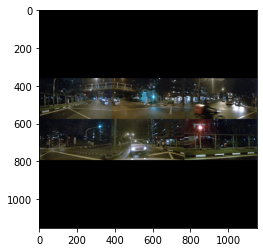

In [ ]:
img,targets = iter(dataloader).next()
plt.imshow(  img[0].permute(1, 2, 0)  )

In [ ]:
output = model(img.to(device))
print(output[...,8].max())

tensor(0.9947)


In [ ]:
output = non_max_suppression(output,conf_thres=0.9)
print(output[0].shape)

torch.Size([10, 11])


In [ ]:
print(targets)

tensor([[0.0000e+00, 0.0000e+00, 4.7458e-01,  ..., 3.2640e-01, 1.1154e-03,
         4.6662e-01],
        [0.0000e+00, 0.0000e+00, 5.0075e-01,  ..., 3.5600e-01, 5.4577e-01,
         9.9790e-01],
        [0.0000e+00, 8.0000e+00, 7.4861e-01,  ..., 3.0260e-01, 3.0156e-01,
         4.1066e-02],
        ...,
        [1.0000e+00, 1.8000e+01, 4.8719e-01,  ..., 2.3620e-01, 3.9791e-01,
         1.0534e-02],
        [1.0000e+00, 1.9000e+01, 7.3987e-01,  ..., 1.5480e-01, 9.9424e-01,
         5.7565e-01],
        [1.0000e+00, 1.9000e+01, 3.6606e-01,  ..., 1.3800e-01, 7.7270e-02,
         7.6702e-01]])


In [ ]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib as mpl
import matplotlib.patches as patches
from IPython.display import clear_output
import time

In [ ]:

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
for annotation in targets:
  annotation = nusc.get('sample_annotation',annotation)
  cordinate = [annotation['translation'][i] - ego_pose['translation'][i] for i in range(3)]
  cordinate[0], cordinate[1] = rotate_around_point_lowperf(cordinate[:2], ego_yaw, origin=(0, 0))
  rotation_yaw = quaternion_yaw(annotation['rotation']) - math.pi/2
  print("rotation_yaw = ", quaternion_yaw(annotation['rotation']) + math.pi )
  object_rotation = rotation_yaw - ego_yaw
  height = annotation['size'][0]
  width = annotation['size'][1]
  x_temp, y_temp = rotate_around_point_lowperf((cordinate[0],cordinate[1]),2*math.pi -  (object_rotation+math.pi/2), origin=(cordinate[0]-width/2, cordinate[1] - height/2))
  x_offset, y_offset = x_temp - cordinate[0], y_temp - cordinate[1]
  rectas = patches.Rectangle(xy=((cordinate[0]-width/2) - x_offset, (cordinate[1] - height/2) - y_offset) ,width=width, angle = (object_rotation+math.pi/2)*180/math.pi, height=height, linewidth=1, color='blue', fill=False)
  ax.add_patch(rectas)
  ax.scatter(cordinate[0], cordinate[1], color = 'red', s=10)
  break
ax.scatter(0, 0)
plt.xlim(-80,80)
plt.ylim(-80,80)
plt.show()

In [ ]:
dataset.categories[18]

'movable_object.barrier'

#Angle testing

In [ ]:
#30degree
rotation_yaw = 0
r1 = (1 + math.sin(rotation_yaw))/2
r2 = (1 + math.cos(rotation_yaw))/2
print(r1,r2)
teta1 = math.asin(2*r1 - 1)
teta2 = math.acos(2*r2 - 1)
print(teta1,teta2)
print(angle_decoder([r1,r2])*180/math.pi)

0.5 1.0
0.0 0.0
0.0


In [ ]:
#120degree
rotation_yaw = math.pi/2 
r1 = (1 + math.sin(rotation_yaw))/2
r2 = (1 + math.cos(rotation_yaw))/2
print(r1,r2)
teta1 = math.asin(2*r1 - 1)
teta2 = math.acos(2*r2 - 1)
print(teta1,teta2)
print(angle_decoder([r1,r2])*180/math.pi)

1.0 0.5
1.5707963267948966 1.5707963267948966
90.0


In [ ]:
#210degree
rotation_yaw = math.pi
r1 = (1 + math.sin(rotation_yaw))/2
r2 = (1 + math.cos(rotation_yaw))/2
print(r1,r2)
teta1 = math.asin(2*r1 - 1)
teta2 = math.acos(2*r2 - 1)
print(teta1,teta2)
print(angle_decoder([r1,r2])*180/math.pi)

0.5000000000000001 0.0
2.220446049250313e-16 3.141592653589793
180.0


In [ ]:
#300degree
rotation_yaw = 3*math.pi/2
r1 = (1 + math.sin(rotation_yaw))/2
r2 = (1 + math.cos(rotation_yaw))/2
print(r1,r2)
teta1 = math.asin(2*r1 - 1)
teta2 = math.acos(2*r2 - 1)
print(teta1,teta2)
print(angle_decoder([r1,r2])*180/math.pi)

0.0 0.4999999999999999
-1.5707963267948966 1.5707963267948968
270.0


#Intersection Area Testing

In [ ]:
from turfpy.transformation import intersect
from turfpy.measurement import area
from geojson import Feature
f = Feature(geometry={"coordinates": [
[[-122.801742, 45.48565], [-122.801742, 45.60491],
[-122.584762, 45.60491], [-122.584762, 45.48565],
[-122.801742, 45.48565]]], "type": "Polygon"})
b = Feature(geometry={"coordinates": [
[[-122.520217, 45.535693], [-122.64038, 45.553967],
[-122.720031, 45.526554], [-122.669906, 45.507309],
[-122.723464, 45.446643], [-122.532577, 45.408574],
[-122.487258, 45.477466], [-122.520217, 45.535693]
]], "type": "Polygon"})
inter = intersect([f, b])
area(inter)

56901155.05995309

In [ ]:
!pip install turfpy

  Created wheel for turfpy: filename=turfpy-0.0.4-cp36-none-any.whl size=32317 sha256=76b9dc9f683d5b6eae6f404c1b15fd5ee26c92a78086a865e43952be574641aa
  Stored in directory: /root/.cache/pip/wheels/e8/5a/1f/216423b705f113c02e3c287b8c5ce31df9a8c6a5526c4da56c
Successfully built turfpy
